In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import t
from scipy.stats import uniform
from scipy.stats import ttest_1samp # library for p-value estimation
import ruptures as rpt # library for change point detection
%matplotlib inline
%run ./master_experminet-functions.ipynb
# load functions for the creation of the different distributions

In [173]:
# define arms
def quick_sort(df):
    sorted_df = df.sort_values(kind="quicksort")
    return sorted_df
def merge_sort(df):
    sorted_df = df.sort_values(kind="mergesort")
    return sorted_df
def heap_sort(df):
    sorted_df = df.sort_values(kind="heapsort")
    return sorted_df

In [284]:
n_samples = 100000
choices = [quick_sort,merge_sort,heap_sort]
choices_names = ["quick_sort","merge_sort","heap_sort"]
dist_types = ["Uniform","Normal","Uniform_Sorted","Uniform_Reverse_Sorted","Uniform_Nearly_Sorted","Zipf"]

In [278]:
#list_distributions = 1000*["Uniform_Sorted"] + 1000*["Normal"] # at first quick sort -> then merge sort 
list_distributions = 500*["Uniform"] +  500*["Uniform_Sorted"] + 500*["Normal"] + 500*["Uniform_Reverse_Sorted"]
list_distributions_1 = 1000*["Uniform"] + 1000*["Normal"] # quick sort should be faster 
list_distributions_2 = 1000*["Uniform_Sorted"]+1000*["Uniform_Reverse_Sorted"] # merge sort should be faster

In [262]:
def plot_history(rewards,cum_rewards,chosen_arms ):

    fig = plt.figure(figsize=[30,8])
    ax2 = fig.add_subplot(121)
    ax2.plot(cum_rewards, label="avg rewards")
    ax2.set_title("Cummulative Rewards")
    labels = list(chosen_arms.keys())
    ax3 = fig.add_subplot(122)
    ax3.bar([i for i in range(len(chosen_arms.values()))], chosen_arms.values(), label=[i for i in ((list(chosen_arms.keys())))])
    ax3.set_title("Chosen Actions")
    plt.show() 

## Thompson Sampling

# Probabs sampled from t Student distribution

### Quick sort should be the fastest

In [255]:
# initialize
total_reward = 0
num_choices = len(choices)
sample_count = [0 for i in range(num_choices)]
sample_rewards = [0 for i in range(num_choices)]
sample_mean = [0.0 for i in range(num_choices)]
sample_var = [0.0 for i in range(num_choices)]
arm_rewards = {0: [], 1:[], 2:[]}
rewards = []
cum_rewards = []
var_multiplier = 10


for n, elem in enumerate(list_distributions_1):
    dist_type = elem
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    print("\n")
    print("Iteration:", n)
    theta = {}
    for i in range(len(choices)):
        if sample_count[i] >= 2:
            theta[i] = t.rvs(df=sample_count[i]-1,loc=sample_mean[i],scale=np.sqrt(sample_var[i]/sample_count[i])*var_multiplier)
            print(choices_names[i],"Theta", theta[i])

        else:
            print("Less than two values for",choices_names[i])
            theta[i] = uniform.rvs(loc=0, scale=1)
            print(choices_names[i],"Theta", theta[i])
    
    choice = np.argmin([theta[i] for i in range(len(choices))])
    alg = choices[choice]
    alg_name = choices_names[choice]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = ((time.time() - start_time))*(1)
    print("Chosen algorithm is: ", alg_name, "with reward:", reward)
    arm_rewards[choice].append(reward)
    sample_count[choice] += 1
    sample_rewards[choice] += reward
    #sample_mean[choice]  += (1/sample_count[choice])*(reward-sample_mean[choice]) #this is alternative variation for non-stationary but does not work right now
    #sample_mean[choice] = sample_rewards[choice]/sample_count[choice]
    sample_mean[choice] = np.mean(arm_rewards[choice])
    #sample_var[choice] = sum([(sample_mean[choice]-i)**2 for i in arm_rewards[choice]])*var_multiplier
    sample_var[choice] = np.var(arm_rewards[choice])
    if sample_count[choice] >= 2:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice])
    else:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice])
    total_reward += reward
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
    
    
q_values = {"quick_sort": sample_mean[0], "merge_sort": sample_mean[1], "heap_sort":sample_mean[2]} ## 
arm_counts = {"quick_sort": sample_count[0], "merge_sort": sample_count[1], "heap_sort":sample_count[2]} ## 

print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)



Iteration: 0
Less than two values for quick_sort
quick_sort Theta 0.7896465133310804
Less than two values for merge_sort
merge_sort Theta 0.8844504361039055
Less than two values for heap_sort
heap_sort Theta 0.23312470739875824
Chosen algorithm is:  heap_sort with reward: 0.028921842575073242
Sample mean is:  0.028921842575073242 Sample variance is: 0.0


Iteration: 1
Less than two values for quick_sort
quick_sort Theta 0.3941280429711961
Less than two values for merge_sort
merge_sort Theta 0.07745157508160705
Less than two values for heap_sort
heap_sort Theta 0.2087349027657064
Chosen algorithm is:  merge_sort with reward: 0.015956640243530273
Sample mean is:  0.015956640243530273 Sample variance is: 0.0


Iteration: 2
Less than two values for quick_sort
quick_sort Theta 0.4940962615442347
Less than two values for merge_sort
merge_sort Theta 0.11945597982845046
Less than two values for heap_sort
heap_sort Theta 0.5407326313165939
Chosen algorithm is:  merge_sort with reward: 0.01496



Iteration: 27
Less than two values for quick_sort
quick_sort Theta 0.9196100756174512
merge_sort Theta 0.01675455715623539
Less than two values for heap_sort
heap_sort Theta 0.6393203032527567
Chosen algorithm is:  merge_sort with reward: 0.018948078155517578
Sample mean is:  0.015445479640254268 Sample variance is: 1.198572971494057e-06


Iteration: 28
Less than two values for quick_sort
quick_sort Theta 0.2668426781621953
merge_sort Theta 0.015500523703210766
Less than two values for heap_sort
heap_sort Theta 0.3582238787495873
Chosen algorithm is:  merge_sort with reward: 0.014960289001464844
Sample mean is:  0.015428151403154646 Sample variance is: 1.163874024567177e-06


Iteration: 29
Less than two values for quick_sort
quick_sort Theta 0.6094737540009387
merge_sort Theta 0.014173840297354398
Less than two values for heap_sort
heap_sort Theta 0.43843323966198455
Chosen algorithm is:  merge_sort with reward: 0.014960527420043945
Sample mean is:  0.015412026438219794 Sample varian


Iteration: 54
Less than two values for quick_sort
quick_sort Theta 0.5990534954629724
merge_sort Theta 0.015580916014826992
heap_sort Theta 0.004244103129856059
Chosen algorithm is:  heap_sort with reward: 0.025965213775634766
Sample mean is:  0.025115569432576496 Sample variance is: 4.7670199907972555e-06


Iteration: 55
Less than two values for quick_sort
quick_sort Theta 0.22851206401350677
merge_sort Theta 0.01726816462696607
heap_sort Theta -0.007982653847511758
Chosen algorithm is:  heap_sort with reward: 0.022938251495361328
Sample mean is:  0.02480452401297433 Sample variance is: 4.666512653302005e-06


Iteration: 56
Less than two values for quick_sort
quick_sort Theta 0.5229858967850894
merge_sort Theta 0.016586106668200658
heap_sort Theta 0.03036152047838128
Chosen algorithm is:  merge_sort with reward: 0.014993429183959961
Sample mean is:  0.015498000748303473 Sample variance is: 1.2186799554923854e-06


Iteration: 57
Less than two values for quick_sort
quick_sort Theta 0.1



Iteration: 83
quick_sort Theta 0.015583945510739002
merge_sort Theta 0.01661389442250336
heap_sort Theta 0.025122792702039726
Chosen algorithm is:  quick_sort with reward: 0.014961004257202148
Sample mean is:  0.014799356460571289 Sample variance is: 4.5888109904505353e-07


Iteration: 84
quick_sort Theta 0.005114377026047804
merge_sort Theta 0.016751211485881247
heap_sort Theta 0.03929332878302741
Chosen algorithm is:  quick_sort with reward: 0.012966394424438477
Sample mean is:  0.014537504741123744 Sample variance is: 8.047245941901454e-07


Iteration: 85
quick_sort Theta 0.015704868715610075
merge_sort Theta 0.014386378835387764
heap_sort Theta 0.03860748111985018
Chosen algorithm is:  merge_sort with reward: 0.01396489143371582
Sample mean is:  0.015394415653927225 Sample variance is: 1.0043251720581633e-06


Iteration: 86
quick_sort Theta 0.012329774526251877
merge_sort Theta 0.016271635881874174
heap_sort Theta 0.03490768199824501
Chosen algorithm is:  quick_sort with reward: 

Sample mean is:  0.013541825612386068 Sample variance is: 6.944425829007945e-07


Iteration: 115
quick_sort Theta 0.014658530852099446
merge_sort Theta 0.014712809460328874
heap_sort Theta 0.03260582176702668
Chosen algorithm is:  quick_sort with reward: 0.013961553573608398
Sample mean is:  0.0135553652240384 Sample variance is: 6.775408417697132e-07


Iteration: 116
quick_sort Theta 0.016612011854299214
merge_sort Theta 0.01303939238211282
heap_sort Theta 0.02074629227949195
Chosen algorithm is:  merge_sort with reward: 0.01499319076538086
Sample mean is:  0.015367103250403153 Sample variance is: 9.750202677814636e-07


Iteration: 117
quick_sort Theta 0.015122650730306513
merge_sort Theta 0.017079210417925664
heap_sort Theta 0.020577320675683568
Chosen algorithm is:  quick_sort with reward: 0.012999534606933594
Sample mean is:  0.013537995517253876 Sample variance is: 6.657205985916015e-07


Iteration: 118
quick_sort Theta 0.01272498755073247
merge_sort Theta 0.014906930829624696
hea



Iteration: 147
quick_sort Theta 0.01238316643188256
merge_sort Theta 0.015891875726799176
heap_sort Theta 0.01787870045345183
Chosen algorithm is:  quick_sort with reward: 0.013964176177978516
Sample mean is:  0.01343067487080892 Sample variance is: 5.876938944018877e-07


Iteration: 148
quick_sort Theta 0.013035809210147603
merge_sort Theta 0.014936865030199453
heap_sort Theta 0.029164484066248636
Chosen algorithm is:  quick_sort with reward: 0.012968301773071289
Sample mean is:  0.013422702920847926 Sample variance is: 5.811837042624246e-07


Iteration: 149
quick_sort Theta 0.012637776784646365
merge_sort Theta 0.013677098687485414
heap_sort Theta 0.025425007307954696
Chosen algorithm is:  quick_sort with reward: 0.012966394424438477
Sample mean is:  0.013414968878535901 Sample variance is: 5.748024268118222e-07


Iteration: 150
quick_sort Theta 0.014947821494122746
merge_sort Theta 0.0161433787033245
heap_sort Theta 0.03199437611978815
Chosen algorithm is:  quick_sort with reward:

Chosen algorithm is:  quick_sort with reward: 0.013962745666503906
Sample mean is:  0.013510420743156882 Sample variance is: 5.422083290717178e-07


Iteration: 179
quick_sort Theta 0.013881088441693626
merge_sort Theta 0.016893818661855523
heap_sort Theta 0.023843499644568462
Chosen algorithm is:  quick_sort with reward: 0.016955137252807617
Sample mean is:  0.013550475586292356 Sample variance is: 6.722767700408851e-07


Iteration: 180
quick_sort Theta 0.015226547139335297
merge_sort Theta 0.014769678552609187
heap_sort Theta 0.021065073390662024
Chosen algorithm is:  merge_sort with reward: 0.015959739685058594
Sample mean is:  0.015347203612327576 Sample variance is: 9.586720529508598e-07


Iteration: 181
quick_sort Theta 0.01435666034861548
merge_sort Theta 0.01561072227981586
heap_sort Theta 0.022616811724630953
Chosen algorithm is:  quick_sort with reward: 0.012995243072509766
Sample mean is:  0.013544093603375315 Sample variance is: 6.680522055570058e-07


Iteration: 182
quick_s



Iteration: 209
quick_sort Theta 0.015569014424944655
merge_sort Theta 0.016931107670871106
heap_sort Theta 0.02648562300256804
Chosen algorithm is:  quick_sort with reward: 0.013965129852294922
Sample mean is:  0.013552491153989519 Sample variance is: 7.88018042927562e-07


Iteration: 210
quick_sort Theta 0.014362795358890625
merge_sort Theta 0.01494703568930275
heap_sort Theta 0.021000846851885684
Chosen algorithm is:  quick_sort with reward: 0.013968467712402344
Sample mean is:  0.013556172362471048 Sample variance is: 7.825621770672653e-07


Iteration: 211
quick_sort Theta 0.012597687643243061
merge_sort Theta 0.014829660681529327
heap_sort Theta 0.01989994701542214
Chosen algorithm is:  quick_sort with reward: 0.012967586517333984
Sample mean is:  0.013551009328741776 Sample variance is: 7.787098282204008e-07


Iteration: 212
quick_sort Theta 0.013505269952810688
merge_sort Theta 0.016687292285222213
heap_sort Theta 0.022082644380562937
Chosen algorithm is:  quick_sort with rewar

Chosen algorithm is:  quick_sort with reward: 0.014935970306396484
Sample mean is:  0.013543576853615897 Sample variance is: 7.50023012762554e-07


Iteration: 241
quick_sort Theta 0.013167789610707097
merge_sort Theta 0.014844840212253425
heap_sort Theta 0.028677620171352274
Chosen algorithm is:  quick_sort with reward: 0.012969017028808594
Sample mean is:  0.013539501961241377 Sample variance is: 7.470283653162505e-07


Iteration: 242
quick_sort Theta 0.01388138794846375
merge_sort Theta 0.013658880091168236
heap_sort Theta 0.023938461421586676
Chosen algorithm is:  merge_sort with reward: 0.013966798782348633
Sample mean is:  0.015289752623614143 Sample variance is: 9.69517728540315e-07


Iteration: 243
quick_sort Theta 0.014334951348295141
merge_sort Theta 0.015187004007725935
heap_sort Theta 0.027640150584617475
Chosen algorithm is:  quick_sort with reward: 0.013964653015136719
Sample mean is:  0.013542495982747682 Sample variance is: 7.430315494142314e-07


Iteration: 244
quick_so

Chosen algorithm is:  quick_sort with reward: 0.014953374862670898
Sample mean is:  0.013634522293889246 Sample variance is: 8.407632512629538e-07


Iteration: 279
quick_sort Theta 0.013779009843161076
merge_sort Theta 0.014410869600339141
heap_sort Theta 0.023830462321401458
Chosen algorithm is:  quick_sort with reward: 0.014994621276855469
Sample mean is:  0.01364238413772142 Sample variance is: 8.465344252884014e-07


Iteration: 280
quick_sort Theta 0.01306594428696303
merge_sort Theta 0.012804955217749466
heap_sort Theta 0.025778614384239253
Chosen algorithm is:  merge_sort with reward: 0.014961719512939453
Sample mean is:  0.015272241168551975 Sample variance is: 1.075211628148405e-06


Iteration: 281
quick_sort Theta 0.013598264006106376
merge_sort Theta 0.01518358651192413
heap_sort Theta 0.019187398935099298
Chosen algorithm is:  quick_sort with reward: 0.012965917587280273
Sample mean is:  0.013638496398925781 Sample variance is: 8.442840956523396e-07


Iteration: 282
quick_so


Iteration: 310
quick_sort Theta 0.013341548164444286
merge_sort Theta 0.014673473019479522
heap_sort Theta 0.03494837693756199
Chosen algorithm is:  quick_sort with reward: 0.015957355499267578
Sample mean is:  0.0136614990234375 Sample variance is: 9.053538252373983e-07


Iteration: 311
quick_sort Theta 0.01219061786549224
merge_sort Theta 0.015017911704893399
heap_sort Theta 0.017698324839309106
Chosen algorithm is:  quick_sort with reward: 0.013934850692749023
Sample mean is:  0.013662858981991289 Sample variance is: 9.012194748042496e-07


Iteration: 312
quick_sort Theta 0.01425109636476047
merge_sort Theta 0.01527384020048867
heap_sort Theta 0.018664532937550493
Chosen algorithm is:  quick_sort with reward: 0.013964176177978516
Sample mean is:  0.013664350651278355 Sample variance is: 8.972052327853705e-07


Iteration: 313
quick_sort Theta 0.013073449112183274
merge_sort Theta 0.015298812586808772
heap_sort Theta 0.03898418102446517
Chosen algorithm is:  quick_sort with reward: 0

Chosen algorithm is:  quick_sort with reward: 0.015963077545166016
Sample mean is:  0.013642099168565538 Sample variance is: 9.152399975447887e-07


Iteration: 342
quick_sort Theta 0.014330253339195399
merge_sort Theta 0.0135064359102278
heap_sort Theta 0.022947513250822917
Chosen algorithm is:  merge_sort with reward: 0.014961481094360352
Sample mean is:  0.015270284770690288 Sample variance is: 1.0123208533162554e-06


Iteration: 343
quick_sort Theta 0.012715188412134482
merge_sort Theta 0.015681624749384185
heap_sort Theta 0.022157672589757135
Chosen algorithm is:  quick_sort with reward: 0.011970281600952148
Sample mean is:  0.013634701745699992 Sample variance is: 9.235026826790111e-07


Iteration: 344
quick_sort Theta 0.012879595101248904
merge_sort Theta 0.014256183076087349
heap_sort Theta 0.021174990743227894
Chosen algorithm is:  quick_sort with reward: 0.012967348098754883
Sample mean is:  0.013631761861792746 Sample variance is: 9.213876882524245e-07


Iteration: 345
quick_



Iteration: 373
quick_sort Theta 0.013029706580182168
merge_sort Theta 0.014485862186039885
heap_sort Theta 0.028847261568864253
Chosen algorithm is:  quick_sort with reward: 0.014000177383422852
Sample mean is:  0.013665327371335497 Sample variance is: 9.512360599505968e-07


Iteration: 374
quick_sort Theta 0.01312808938332274
merge_sort Theta 0.016127620899630175
heap_sort Theta 0.021797463797000507
Chosen algorithm is:  quick_sort with reward: 0.01396489143371582
Sample mean is:  0.01366649754345417 Sample variance is: 9.478694663021814e-07


Iteration: 375
quick_sort Theta 0.013782003788126237
merge_sort Theta 0.01601397019413594
heap_sort Theta 0.02775640238042446
Chosen algorithm is:  quick_sort with reward: 0.013964414596557617
Sample mean is:  0.01366765675377753 Sample variance is: 9.445252630169837e-07


Iteration: 376
quick_sort Theta 0.0133163618356526
merge_sort Theta 0.01454125355136574
heap_sort Theta 0.01402302264421994
Chosen algorithm is:  quick_sort with reward: 0.0



Iteration: 406
quick_sort Theta 0.013953746172995406
merge_sort Theta 0.014028953592857846
heap_sort Theta 0.02901661434150226
Chosen algorithm is:  quick_sort with reward: 0.014960050582885742
Sample mean is:  0.013645105194627192 Sample variance is: 9.292423439371041e-07


Iteration: 407
quick_sort Theta 0.013257547539013101
merge_sort Theta 0.014918630385167893
heap_sort Theta 0.020599509306334335
Chosen algorithm is:  quick_sort with reward: 0.013001441955566406
Sample mean is:  0.013642854623861247 Sample variance is: 9.274367894326012e-07


Iteration: 408
quick_sort Theta 0.013952986007674133
merge_sort Theta 0.014966454440693631
heap_sort Theta 0.0197961422146997
Chosen algorithm is:  quick_sort with reward: 0.014988422393798828
Sample mean is:  0.013647543013303537 Sample variance is: 9.304918670923076e-07


Iteration: 409
quick_sort Theta 0.013169237379511712
merge_sort Theta 0.015547881532080332
heap_sort Theta 0.01927846543570875
Chosen algorithm is:  quick_sort with rewar



Iteration: 438
quick_sort Theta 0.013426970225289731
merge_sort Theta 0.01653528833032894
heap_sort Theta 0.020927477819498073
Chosen algorithm is:  quick_sort with reward: 0.015958070755004883
Sample mean is:  0.013647731902107359 Sample variance is: 9.357435491644086e-07


Iteration: 439
quick_sort Theta 0.012606400596220165
merge_sort Theta 0.015066667808030178
heap_sort Theta 0.027799965615024534
Chosen algorithm is:  quick_sort with reward: 0.012968063354492188
Sample mean is:  0.013645581052273134 Sample variance is: 9.342395742291872e-07


Iteration: 440
quick_sort Theta 0.014960164390437188
merge_sort Theta 0.01700416268128919
heap_sort Theta 0.01856796108444034
Chosen algorithm is:  quick_sort with reward: 0.012969255447387695
Sample mean is:  0.013643447533014821 Sample variance is: 9.327308480332613e-07


Iteration: 441
quick_sort Theta 0.013563863319328514
merge_sort Theta 0.015959091721578257
heap_sort Theta 0.018254465598145735
Chosen algorithm is:  quick_sort with rewa



Iteration: 470
quick_sort Theta 0.01229222592216211
merge_sort Theta 0.015491910110770566
heap_sort Theta 0.015530878082642589
Chosen algorithm is:  quick_sort with reward: 0.013998985290527344
Sample mean is:  0.013655818026998768 Sample variance is: 9.461607217096118e-07


Iteration: 471
quick_sort Theta 0.012931940780265126
merge_sort Theta 0.013524111520003773
heap_sort Theta 0.023652705743878115
Chosen algorithm is:  quick_sort with reward: 0.013990402221679688
Sample mean is:  0.013656785033341777 Sample variance is: 9.437487630870168e-07


Iteration: 472
quick_sort Theta 0.014004336707623606
merge_sort Theta 0.015382977721614672
heap_sort Theta 0.026241747876207526
Chosen algorithm is:  quick_sort with reward: 0.012964487075805664
Sample mean is:  0.013654789938363287 Sample variance is: 9.424062457923281e-07


Iteration: 473
quick_sort Theta 0.013707105159520347
merge_sort Theta 0.0172688462118598
heap_sort Theta 0.03046553506753688
Chosen algorithm is:  quick_sort with rewar



Iteration: 502
quick_sort Theta 0.013843939992062905
merge_sort Theta 0.014559209099744097
heap_sort Theta 0.028026843109434752
Chosen algorithm is:  quick_sort with reward: 0.013965368270874023
Sample mean is:  0.013624479293823242 Sample variance is: 9.044271106443679e-07


Iteration: 503
quick_sort Theta 0.013179859817400302
merge_sort Theta 0.015023615557398432
heap_sort Theta 0.02445486152386773
Chosen algorithm is:  quick_sort with reward: 0.012994050979614258
Sample mean is:  0.013622802622774814 Sample variance is: 9.03075929069393e-07


Iteration: 504
quick_sort Theta 0.014172900397173241
merge_sort Theta 0.01550357895225378
heap_sort Theta 0.020886523762829
Chosen algorithm is:  quick_sort with reward: 0.013964414596557617
Sample mean is:  0.013623708755331266 Sample variance is: 9.00989226856744e-07


Iteration: 505
quick_sort Theta 0.013951774954541534
merge_sort Theta 0.01617143976036849
heap_sort Theta 0.020177025792702273
Chosen algorithm is:  quick_sort with reward: 0

Chosen algorithm is:  quick_sort with reward: 0.013963699340820312
Sample mean is:  0.013613829837543497 Sample variance is: 8.94479833440563e-07


Iteration: 534
quick_sort Theta 0.014043703580294631
merge_sort Theta 0.015294989718826299
heap_sort Theta 0.015243891617114216
Chosen algorithm is:  quick_sort with reward: 0.013967275619506836
Sample mean is:  0.013614704703340436 Sample variance is: 8.925742266824476e-07


Iteration: 535
quick_sort Theta 0.013679976743355733
merge_sort Theta 0.015155715985647805
heap_sort Theta 0.024063246917501536
Chosen algorithm is:  quick_sort with reward: 0.013991832733154297
Sample mean is:  0.013615635883660965 Sample variance is: 8.907206468058777e-07


Iteration: 536
quick_sort Theta 0.01368346635263114
merge_sort Theta 0.015524555030275227
heap_sort Theta 0.020580137891767745
Chosen algorithm is:  quick_sort with reward: 0.012964963912963867
Sample mean is:  0.01361403324333905 Sample variance is: 8.89566978267721e-07


Iteration: 537
quick_sor

Chosen algorithm is:  quick_sort with reward: 0.016956090927124023
Sample mean is:  0.013699243808614796 Sample variance is: 1.1138562627406816e-06


Iteration: 570
quick_sort Theta 0.013722877140639663
merge_sort Theta 0.015997089192894828
heap_sort Theta 0.020104731542947077
Chosen algorithm is:  quick_sort with reward: 0.013962745666503906
Sample mean is:  0.013699848170674175 Sample variance is: 1.11146043181372e-06


Iteration: 571
quick_sort Theta 0.013242909877362574
merge_sort Theta 0.015210187315566103
heap_sort Theta 0.02560275676037617
Chosen algorithm is:  quick_sort with reward: 0.012965679168701172
Sample mean is:  0.013698168150074694 Sample variance is: 1.1101476406754992e-06


Iteration: 572
quick_sort Theta 0.013157528527974225
merge_sort Theta 0.013831355591789406
heap_sort Theta 0.025972446309204103
Chosen algorithm is:  quick_sort with reward: 0.012967586517333984
Sample mean is:  0.013696500155479397 Sample variance is: 1.1088288810298549e-06


Iteration: 573
quic


Iteration: 602
quick_sort Theta 0.013572495714389975
merge_sort Theta 0.015257222703248885
heap_sort Theta 0.02121848556294891
Chosen algorithm is:  quick_sort with reward: 0.01695537567138672
Sample mean is:  0.013698218466127711 Sample variance is: 1.1026861241592e-06


Iteration: 603
quick_sort Theta 0.012444310541436935
merge_sort Theta 0.015794781695169412
heap_sort Theta 0.028651039054902305
Chosen algorithm is:  quick_sort with reward: 0.016954660415649414
Sample mean is:  0.01370517667542156 Sample variance is: 1.122940545188703e-06


Iteration: 604
quick_sort Theta 0.014104604777100125
merge_sort Theta 0.01603486188448595
heap_sort Theta 0.025312385765422767
Chosen algorithm is:  quick_sort with reward: 0.016956090927124023
Sample mean is:  0.013712108262312183 Sample variance is: 1.1430321633808648e-06


Iteration: 605
quick_sort Theta 0.01437014614629238
merge_sort Theta 0.014805013560601576
heap_sort Theta 0.022392662197331274
Chosen algorithm is:  quick_sort with reward: 

Chosen algorithm is:  quick_sort with reward: 0.01494455337524414
Sample mean is:  0.013757350473751423 Sample variance is: 1.2836203932304316e-06


Iteration: 637
quick_sort Theta 0.01357486978442839
merge_sort Theta 0.015076220408292122
heap_sort Theta 0.029448086812726426
Chosen algorithm is:  quick_sort with reward: 0.012962579727172852
Sample mean is:  0.013755744876283588 Sample variance is: 1.2823007246738427e-06


Iteration: 638
quick_sort Theta 0.014153375513544241
merge_sort Theta 0.015480456984501822
heap_sort Theta 0.021639130601186492
Chosen algorithm is:  quick_sort with reward: 0.013996124267578125
Sample mean is:  0.013756229512153132 Sample variance is: 1.279831702558137e-06


Iteration: 639
quick_sort Theta 0.013561168933298392
merge_sort Theta 0.015964414051030978
heap_sort Theta 0.01839591149493717
Chosen algorithm is:  quick_sort with reward: 0.013965606689453125
Sample mean is:  0.013756650794200015 Sample variance is: 1.2773446178357428e-06


Iteration: 640
quick



Iteration: 674
quick_sort Theta 0.013381506639878613
merge_sort Theta 0.016069401764117718
heap_sort Theta 0.02689373651427826
Chosen algorithm is:  quick_sort with reward: 0.012965202331542969
Sample mean is:  0.013805380841058684 Sample variance is: 1.42407498751614e-06


Iteration: 675
quick_sort Theta 0.01358523820219082
merge_sort Theta 0.016036698729348518
heap_sort Theta 0.020315932297556485
Chosen algorithm is:  quick_sort with reward: 0.013991594314575195
Sample mean is:  0.013805732187235131 Sample variance is: 1.4214533555252173e-06


Iteration: 676
quick_sort Theta 0.013707098138882177
merge_sort Theta 0.01723570838249757
heap_sort Theta 0.028933329249209775
Chosen algorithm is:  quick_sort with reward: 0.012965202331542969
Sample mean is:  0.013804149268486181 Sample variance is: 1.4201044037216714e-06


Iteration: 677
quick_sort Theta 0.013262432867690447
merge_sort Theta 0.015110928399591664
heap_sort Theta 0.025075181777621608
Chosen algorithm is:  quick_sort with rew

Chosen algorithm is:  quick_sort with reward: 0.016957759857177734
Sample mean is:  0.013914730574680149 Sample variance is: 1.992133632836263e-06


Iteration: 706
quick_sort Theta 0.01329172313903071
merge_sort Theta 0.014734451310914025
heap_sort Theta 0.020978748763226356
Chosen algorithm is:  quick_sort with reward: 0.016955137252807617
Sample mean is:  0.01392020878491101 Sample variance is: 2.005170179049949e-06


Iteration: 707
quick_sort Theta 0.01327106211925841
merge_sort Theta 0.015344948448986387
heap_sort Theta 0.022769000924074648
Chosen algorithm is:  quick_sort with reward: 0.01299285888671875
Sample mean is:  0.013918540889410663 Sample variance is: 2.0031076987116484e-06


Iteration: 708
quick_sort Theta 0.013750881654899055
merge_sort Theta 0.015408969383150506
heap_sort Theta 0.02077477921775274
Chosen algorithm is:  quick_sort with reward: 0.012994050979614258
Sample mean is:  0.013916881122965788 Sample variance is: 2.001043137593646e-06


Iteration: 709
quick_sor

Chosen algorithm is:  merge_sort with reward: 0.01592540740966797
Sample mean is:  0.015422666445374489 Sample variance is: 1.6758854895736197e-06


Iteration: 740
quick_sort Theta 0.013469432568362825
merge_sort Theta 0.014676663504227704
heap_sort Theta 0.01960022661567095
Chosen algorithm is:  quick_sort with reward: 0.013997077941894531
Sample mean is:  0.013968921279254025 Sample variance is: 2.736695351059892e-06


Iteration: 741
quick_sort Theta 0.014112109641792126
merge_sort Theta 0.016145517276367427
heap_sort Theta 0.0196114168816503
Chosen algorithm is:  quick_sort with reward: 0.014997243881225586
Sample mean is:  0.013970679095667652 Sample variance is: 2.7338217517783833e-06


Iteration: 742
quick_sort Theta 0.013178643159439932
merge_sort Theta 0.015977777395153627
heap_sort Theta 0.02437105852328904
Chosen algorithm is:  quick_sort with reward: 0.012998819351196289
Sample mean is:  0.013969020631939884 Sample variance is: 2.7307655705787433e-06


Iteration: 743
quick_s

Chosen algorithm is:  quick_sort with reward: 0.013965606689453125
Sample mean is:  0.013977273565823914 Sample variance is: 2.6509096645404585e-06


Iteration: 770
quick_sort Theta 0.014347683641581222
merge_sort Theta 0.016665766001879797
heap_sort Theta 0.02474383587699732
Chosen algorithm is:  quick_sort with reward: 0.012963056564331055
Sample mean is:  0.013975613636197903 Sample variance is: 2.648251796999916e-06


Iteration: 771
quick_sort Theta 0.014674314517670027
merge_sort Theta 0.015121640454230395
heap_sort Theta 0.027070448860316766
Chosen algorithm is:  quick_sort with reward: 0.01499176025390625
Sample mean is:  0.013977274006488277 Sample variance is: 2.6456090110064932e-06


Iteration: 772
quick_sort Theta 0.01461305574907175
merge_sort Theta 0.015778191947824545
heap_sort Theta 0.022424810830755683
Chosen algorithm is:  quick_sort with reward: 0.014961004257202148
Sample mean is:  0.013978878786668886 Sample variance is: 2.642869267979338e-06


Iteration: 773
quick_



Iteration: 802
quick_sort Theta 0.01335821891650615
merge_sort Theta 0.016240681540583248
heap_sort Theta 0.024507309830746775
Chosen algorithm is:  quick_sort with reward: 0.013962745666503906
Sample mean is:  0.013954826202272808 Sample variance is: 2.576198812185535e-06


Iteration: 803
quick_sort Theta 0.012311607689128097
merge_sort Theta 0.015501799344586287
heap_sort Theta 0.020269233127887983
Chosen algorithm is:  quick_sort with reward: 0.012964963912963867
Sample mean is:  0.013953274693982354 Sample variance is: 2.573694255383125e-06


Iteration: 804
quick_sort Theta 0.014005845132954027
merge_sort Theta 0.015913684584184795
heap_sort Theta 0.02896065710882316
Chosen algorithm is:  quick_sort with reward: 0.012967109680175781
Sample mean is:  0.013951731399751045 Sample variance is: 2.5711861258624604e-06


Iteration: 805
quick_sort Theta 0.014855995401881315
merge_sort Theta 0.016696645738492014
heap_sort Theta 0.030198932478213626
Chosen algorithm is:  quick_sort with re

Chosen algorithm is:  quick_sort with reward: 0.012992382049560547
Sample mean is:  0.013912399728854974 Sample variance is: 2.508275359405531e-06


Iteration: 835
quick_sort Theta 0.01394544392616008
merge_sort Theta 0.014960823147200902
heap_sort Theta 0.02062400779874332
Chosen algorithm is:  quick_sort with reward: 0.012965679168701172
Sample mean is:  0.013910984600962366 Sample variance is: 2.5058637969674763e-06


Iteration: 836
quick_sort Theta 0.01369500271780813
merge_sort Theta 0.015233637617612773
heap_sort Theta 0.024683190442396127
Chosen algorithm is:  quick_sort with reward: 0.012984752655029297
Sample mean is:  0.013909602165222168 Sample variance is: 2.503402246765317e-06


Iteration: 837
quick_sort Theta 0.014022383573789628
merge_sort Theta 0.015339408251378327
heap_sort Theta 0.018566521367532285
Chosen algorithm is:  quick_sort with reward: 0.012998342514038086
Sample mean is:  0.013908244103148868 Sample variance is: 2.5009070967771506e-06


Iteration: 838
quick_

Chosen algorithm is:  quick_sort with reward: 0.012964725494384766
Sample mean is:  0.013896463255002264 Sample variance is: 2.4247359263519053e-06


Iteration: 868
quick_sort Theta 0.014357524605770512
merge_sort Theta 0.01633884868068497
heap_sort Theta 0.024205619621989343
Chosen algorithm is:  quick_sort with reward: 0.013968229293823242
Sample mean is:  0.013896565777914864 Sample variance is: 2.4212793650380665e-06


Iteration: 869
quick_sort Theta 0.013760227016321479
merge_sort Theta 0.013956760245200575
heap_sort Theta 0.024433731782098195
Chosen algorithm is:  quick_sort with reward: 0.012967348098754883
Sample mean is:  0.013895240217744879 Sample variance is: 2.419055305688966e-06


Iteration: 870
quick_sort Theta 0.013607533807632417
merge_sort Theta 0.015450378318552276
heap_sort Theta 0.02617130336334699
Chosen algorithm is:  quick_sort with reward: 0.016956567764282227
Sample mean is:  0.013899601083195786 Sample variance is: 2.4289403783441904e-06


Iteration: 871
quic



Iteration: 901
quick_sort Theta 0.014240547955182519
merge_sort Theta 0.01568014465429026
heap_sort Theta 0.024754707289973477
Chosen algorithm is:  quick_sort with reward: 0.015959739685058594
Sample mean is:  0.013981360957455733 Sample variance is: 2.6809044951201e-06


Iteration: 902
quick_sort Theta 0.013744101340960824
merge_sort Theta 0.015047819737841464
heap_sort Theta 0.023206098648688656
Chosen algorithm is:  quick_sort with reward: 0.012965917587280273
Sample mean is:  0.013979969939140423 Sample variance is: 2.6786425886030955e-06


Iteration: 903
quick_sort Theta 0.014201772960500465
merge_sort Theta 0.01509708100750202
heap_sort Theta 0.018026833838777068
Chosen algorithm is:  quick_sort with reward: 0.01396322250366211
Sample mean is:  0.013979947028831973 Sample variance is: 2.674978618020747e-06


Iteration: 904
quick_sort Theta 0.013799023352406105
merge_sort Theta 0.014997902146360341
heap_sort Theta 0.022826203320065616
Chosen algorithm is:  quick_sort with rewar



Iteration: 934
quick_sort Theta 0.014280992399801594
merge_sort Theta 0.015275795786308883
heap_sort Theta 0.025515488659877374
Chosen algorithm is:  quick_sort with reward: 0.013962268829345703
Sample mean is:  0.013955451567758043 Sample variance is: 2.6077436192584877e-06


Iteration: 935
quick_sort Theta 0.013727714531700283
merge_sort Theta 0.013309279555338026
heap_sort Theta 0.03506380514806771
Chosen algorithm is:  merge_sort with reward: 0.014961004257202148
Sample mean is:  0.015476730845918591 Sample variance is: 1.956909634151889e-06


Iteration: 936
quick_sort Theta 0.013642483657475977
merge_sort Theta 0.014629547541538772
heap_sort Theta 0.02597339395614843
Chosen algorithm is:  quick_sort with reward: 0.01396489143371582
Sample mean is:  0.013955464004999092 Sample variance is: 2.6043079741654773e-06


Iteration: 937
quick_sort Theta 0.013982574739302875
merge_sort Theta 0.01657491471181336
heap_sort Theta 0.018097278332576815
Chosen algorithm is:  quick_sort with rew



Iteration: 964
quick_sort Theta 0.012978955191645856
merge_sort Theta 0.01526121068484983
heap_sort Theta 0.0166578925751021
Chosen algorithm is:  quick_sort with reward: 0.013997316360473633
Sample mean is:  0.013964752153474458 Sample variance is: 2.6108428839970174e-06


Iteration: 965
quick_sort Theta 0.013853005142162974
merge_sort Theta 0.013749161901953147
heap_sort Theta 0.021497217753872564
Chosen algorithm is:  merge_sort with reward: 0.014992952346801758
Sample mean is:  0.015476711538453765 Sample variance is: 1.9340715653145287e-06


Iteration: 966
quick_sort Theta 0.013684522593121373
merge_sort Theta 0.018139728851355154
heap_sort Theta 0.025262515812148414
Chosen algorithm is:  quick_sort with reward: 0.012994766235351562
Sample mean is:  0.013963516502623346 Sample variance is: 2.6087140065873795e-06


Iteration: 967
quick_sort Theta 0.014071608448331647
merge_sort Theta 0.015196948449785325
heap_sort Theta 0.02025983387669406
Chosen algorithm is:  quick_sort with re



Iteration: 999
quick_sort Theta 0.01341246625542094
merge_sort Theta 0.013839179920194018
heap_sort Theta 0.020876836547059952
Chosen algorithm is:  quick_sort with reward: 0.013965606689453125
Sample mean is:  0.014023891087681019 Sample variance is: 2.8216265776829423e-06


Iteration: 1000
quick_sort Theta 0.015315832758244111
merge_sort Theta 0.014111704755936323
heap_sort Theta 0.013357498378586982
Chosen algorithm is:  heap_sort with reward: 0.020947694778442383
Sample mean is:  0.02331136212204442 Sample variance is: 4.5014616514897484e-06


Iteration: 1001
quick_sort Theta 0.014419491841496516
merge_sort Theta 0.015394764982595312
heap_sort Theta 0.034794084457081494
Chosen algorithm is:  quick_sort with reward: 0.012245893478393555
Sample mean is:  0.014021706815433736 Sample variance is: 2.822039065754337e-06


Iteration: 1002
quick_sort Theta 0.013157769608683782
merge_sort Theta 0.014391256169940705
heap_sort Theta 0.018898252784748746
Chosen algorithm is:  quick_sort with



Iteration: 1030
quick_sort Theta 0.0141376785989382
merge_sort Theta 0.016521710157296497
heap_sort Theta 0.023269443758562366
Chosen algorithm is:  quick_sort with reward: 0.0139312744140625
Sample mean is:  0.01400002277945113 Sample variance is: 2.7521166870359984e-06


Iteration: 1031
quick_sort Theta 0.012376431759490568
merge_sort Theta 0.017909432609258598
heap_sort Theta 0.025052863660999136
Chosen algorithm is:  quick_sort with reward: 0.01496577262878418
Sample mean is:  0.014001168390185807 Sample variance is: 2.749957078152317e-06


Iteration: 1032
quick_sort Theta 0.014082967301459026
merge_sort Theta 0.01338492771156791
heap_sort Theta 0.01877372045102907
Chosen algorithm is:  merge_sort with reward: 0.013995885848999023
Sample mean is:  0.015438488334607167 Sample variance is: 1.9308740478638876e-06


Iteration: 1033
quick_sort Theta 0.013082589047713172
merge_sort Theta 0.015307389535974724
heap_sort Theta 0.022714306221096058
Chosen algorithm is:  quick_sort with rew



Iteration: 1067
quick_sort Theta 0.01467623546236962
merge_sort Theta 0.013754574860761355
heap_sort Theta 0.023711777513065517
Chosen algorithm is:  merge_sort with reward: 0.014960050582885742
Sample mean is:  0.015432476247631529 Sample variance is: 1.9094237242509394e-06


Iteration: 1068
quick_sort Theta 0.01440713935358834
merge_sort Theta 0.01470178460739444
heap_sort Theta 0.021258420170158894
Chosen algorithm is:  quick_sort with reward: 0.012964963912963867
Sample mean is:  0.013969447242614886 Sample variance is: 2.7158910587342082e-06


Iteration: 1069
quick_sort Theta 0.013734190843749576
merge_sort Theta 0.016204559296552273
heap_sort Theta 0.027968519792078646
Chosen algorithm is:  quick_sort with reward: 0.014959096908569336
Sample mean is:  0.013970575691492827 Sample variance is: 2.71390975729012e-06


Iteration: 1070
quick_sort Theta 0.013830528129453902
merge_sort Theta 0.01480830986555642
heap_sort Theta 0.020905979839489296
Chosen algorithm is:  quick_sort with 

Sample mean is:  0.01394836502622558 Sample variance is: 2.65532361907413e-06


Iteration: 1104
quick_sort Theta 0.014598160258465186
merge_sort Theta 0.013971939128388091
heap_sort Theta 0.021418209361960906
Chosen algorithm is:  merge_sort with reward: 0.01399087905883789
Sample mean is:  0.015391364242091324 Sample variance is: 1.8926934476970115e-06


Iteration: 1105
quick_sort Theta 0.014212413757233828
merge_sort Theta 0.016048966331725287
heap_sort Theta 0.029076909148261547
Chosen algorithm is:  quick_sort with reward: 0.011996746063232422
Sample mean is:  0.013946213296387662 Sample variance is: 2.656590756451071e-06


Iteration: 1106
quick_sort Theta 0.013643852821700851
merge_sort Theta 0.016697889877381075
heap_sort Theta 0.020178198337807204
Chosen algorithm is:  quick_sort with reward: 0.012970447540283203
Sample mean is:  0.013945138664497678 Sample variance is: 2.6547124298710445e-06


Iteration: 1107
quick_sort Theta 0.01426300441889528
merge_sort Theta 0.0157469073713

quick_sort Theta 0.013367265592590431
merge_sort Theta 0.015199419229347618
heap_sort Theta 0.022969432412591157
Chosen algorithm is:  quick_sort with reward: 0.01496267318725586
Sample mean is:  0.013975942941536581 Sample variance is: 2.746388248570576e-06


Iteration: 1136
quick_sort Theta 0.014747541550445753
merge_sort Theta 0.014762182903361985
heap_sort Theta 0.023019669715054005
Chosen algorithm is:  quick_sort with reward: 0.01393580436706543
Sample mean is:  0.01397589987439659 Sample variance is: 2.743443206862353e-06


Iteration: 1137
quick_sort Theta 0.013590568983254262
merge_sort Theta 0.014902809556764417
heap_sort Theta 0.018491325726903703
Chosen algorithm is:  quick_sort with reward: 0.01296544075012207
Sample mean is:  0.013974816852827164 Sample variance is: 2.741595929355323e-06


Iteration: 1138
quick_sort Theta 0.014255396188556273
merge_sort Theta 0.01564366992283057
heap_sort Theta 0.024039869423247963
Chosen algorithm is:  quick_sort with reward: 0.0129673480



Iteration: 1170
quick_sort Theta 0.014414628530459314
merge_sort Theta 0.015429156708741123
heap_sort Theta 0.02412257990686161
Chosen algorithm is:  quick_sort with reward: 0.013000965118408203
Sample mean is:  0.013958168823686773 Sample variance is: 2.6946529904076136e-06


Iteration: 1171
quick_sort Theta 0.013442517137720034
merge_sort Theta 0.015330259283577955
heap_sort Theta 0.01764641268625356
Chosen algorithm is:  quick_sort with reward: 0.012994050979614258
Sample mean is:  0.013957166622185657 Sample variance is: 2.6928171317657223e-06


Iteration: 1172
quick_sort Theta 0.014380167145471327
merge_sort Theta 0.015650006944095653
heap_sort Theta 0.028502897149667427
Chosen algorithm is:  quick_sort with reward: 0.012968301773071289
Sample mean is:  0.013956139763567677 Sample variance is: 2.6910352222471924e-06


Iteration: 1173
quick_sort Theta 0.014402893247126309
merge_sort Theta 0.014545069458430503
heap_sort Theta 0.027138883257671862
Chosen algorithm is:  quick_sort w

Chosen algorithm is:  quick_sort with reward: 0.01695704460144043
Sample mean is:  0.013954611131602849 Sample variance is: 2.654971301379343e-06


Iteration: 1207
quick_sort Theta 0.014098272255901021
merge_sort Theta 0.014868726980401663
heap_sort Theta 0.026082836670112214
Chosen algorithm is:  quick_sort with reward: 0.013962507247924805
Sample mean is:  0.013954619067398148 Sample variance is: 2.6523030511126204e-06


Iteration: 1208
quick_sort Theta 0.014086232064723198
merge_sort Theta 0.014237858435880026
heap_sort Theta 0.024504188725502384
Chosen algorithm is:  quick_sort with reward: 0.011968612670898438
Sample mean is:  0.013952625085072345 Sample variance is: 2.6535961819300616e-06


Iteration: 1209
quick_sort Theta 0.014463571090387527
merge_sort Theta 0.014964040399587906
heap_sort Theta 0.023096662427004942
Chosen algorithm is:  quick_sort with reward: 0.013967514038085938
Sample mean is:  0.013952640018826621 Sample variance is: 2.650934823130306e-06


Iteration: 1210




Iteration: 1236
quick_sort Theta 0.014291647285148819
merge_sort Theta 0.015192116061623713
heap_sort Theta 0.02670217215847823
Chosen algorithm is:  quick_sort with reward: 0.013993501663208008
Sample mean is:  0.013938362584422012 Sample variance is: 2.6097640869561976e-06


Iteration: 1237
quick_sort Theta 0.013530363624345676
merge_sort Theta 0.014655924913790065
heap_sort Theta 0.020346968987593254
Chosen algorithm is:  quick_sort with reward: 0.012969732284545898
Sample mean is:  0.013937415731733961 Sample variance is: 2.608129251590292e-06


Iteration: 1238
quick_sort Theta 0.013969719264046747
merge_sort Theta 0.015871401995513467
heap_sort Theta 0.017919944415913176
Chosen algorithm is:  quick_sort with reward: 0.012967109680175781
Sample mean is:  0.013936468167230487 Sample variance is: 2.606500780061511e-06


Iteration: 1239
quick_sort Theta 0.013281204368997315
merge_sort Theta 0.01461821520693102
heap_sort Theta 0.02433308478914086
Chosen algorithm is:  quick_sort with

Sample mean is:  0.013928817428705347 Sample variance is: 2.5564378796817168e-06


Iteration: 1266
quick_sort Theta 0.014196832291018481
merge_sort Theta 0.017058447610706615
heap_sort Theta 0.019717589633814002
Chosen algorithm is:  quick_sort with reward: 0.014956951141357422
Sample mean is:  0.01392979753710635 Sample variance is: 2.5550075778408407e-06


Iteration: 1267
quick_sort Theta 0.013948633269144323
merge_sort Theta 0.013757660865300312
heap_sort Theta 0.022168430713842478
Chosen algorithm is:  merge_sort with reward: 0.01496434211730957
Sample mean is:  0.01538545541141344 Sample variance is: 1.948287942374721e-06


Iteration: 1268
quick_sort Theta 0.013763470664708816
merge_sort Theta 0.014809631059266557
heap_sort Theta 0.027663436441802563
Chosen algorithm is:  quick_sort with reward: 0.013992547988891602
Sample mean is:  0.013929857299441383 Sample variance is: 2.5525779838325023e-06


Iteration: 1269
quick_sort Theta 0.0141616530581627
merge_sort Theta 0.0160130087916

Chosen algorithm is:  merge_sort with reward: 0.01595783233642578
Sample mean is:  0.01541620779802455 Sample variance is: 1.9999561058003807e-06


Iteration: 1299
quick_sort Theta 0.014122306464434424
merge_sort Theta 0.014174766453175773
heap_sort Theta 0.02167826707134071
Chosen algorithm is:  quick_sort with reward: 0.01795363426208496
Sample mean is:  0.013950822968208723 Sample variance is: 2.5630567515212467e-06


Iteration: 1300
quick_sort Theta 0.014257352610521131
merge_sort Theta 0.014058975641086126
heap_sort Theta 0.030604156006921953
Chosen algorithm is:  merge_sort with reward: 0.016954421997070312
Sample mean is:  0.015424389788445006 Sample variance is: 2.001836750281787e-06


Iteration: 1301
quick_sort Theta 0.013406191476853827
merge_sort Theta 0.016240395177761654
heap_sort Theta 0.020846394758889733
Chosen algorithm is:  quick_sort with reward: 0.01596236228942871
Sample mean is:  0.013952687230786314 Sample variance is: 2.5644279133857633e-06


Iteration: 1302
qui

Sample mean is:  0.015429992424814324 Sample variance is: 1.9941650406866796e-06


Iteration: 1334
quick_sort Theta 0.013473910941871585
merge_sort Theta 0.016360544045998595
heap_sort Theta 0.02795424154142015
Chosen algorithm is:  quick_sort with reward: 0.013964176177978516
Sample mean is:  0.013948686917622884 Sample variance is: 2.5149854654385417e-06


Iteration: 1335
quick_sort Theta 0.013855497379201583
merge_sort Theta 0.016736604470213898
heap_sort Theta 0.0248456191269947
Chosen algorithm is:  quick_sort with reward: 0.014988899230957031
Sample mean is:  0.013949623202333356 Sample variance is: 2.513694810403878e-06


Iteration: 1336
quick_sort Theta 0.014519653110228757
merge_sort Theta 0.01473524021063165
heap_sort Theta 0.03006135377685762
Chosen algorithm is:  quick_sort with reward: 0.013931751251220703
Sample mean is:  0.013949607130434874 Sample variance is: 2.5114345804659256e-06


Iteration: 1337
quick_sort Theta 0.012352377026565846
merge_sort Theta 0.0162347109287

Chosen algorithm is:  quick_sort with reward: 0.01695561408996582
Sample mean is:  0.01394216191674451 Sample variance is: 2.4821218751028664e-06


Iteration: 1371
quick_sort Theta 0.013528715901721416
merge_sort Theta 0.013894419336336075
heap_sort Theta 0.020946696717354028
Chosen algorithm is:  quick_sort with reward: 0.013962507247924805
Sample mean is:  0.013942179763526246 Sample variance is: 2.4799449379926024e-06


Iteration: 1372
quick_sort Theta 0.013853206465060034
merge_sort Theta 0.014588182629174083
heap_sort Theta 0.022727417069316875
Chosen algorithm is:  quick_sort with reward: 0.013963937759399414
Sample mean is:  0.013942198832760141 Sample variance is: 2.4777718688054714e-06


Iteration: 1373
quick_sort Theta 0.013980495316366769
merge_sort Theta 0.016167339674230532
heap_sort Theta 0.031176387916399404
Chosen algorithm is:  quick_sort with reward: 0.012967586517333984
Sample mean is:  0.01394134540691476 Sample variance is: 2.4764332221655726e-06


Iteration: 1374


merge_sort Theta 0.015130211617627976
heap_sort Theta 0.024136347788497825
Chosen algorithm is:  quick_sort with reward: 0.014995574951171875
Sample mean is:  0.01392905783755585 Sample variance is: 2.446322540533646e-06


Iteration: 1402
quick_sort Theta 0.013344124373608376
merge_sort Theta 0.01737325862360323
heap_sort Theta 0.01978615463425861
Chosen algorithm is:  quick_sort with reward: 0.012930870056152344
Sample mean is:  0.013928201758841094 Sample variance is: 2.445078288200109e-06


Iteration: 1403
quick_sort Theta 0.013856726252969404
merge_sort Theta 0.0161610118029806
heap_sort Theta 0.02089716595772269
Chosen algorithm is:  quick_sort with reward: 0.012966394424438477
Sample mean is:  0.013927377588031838 Sample variance is: 2.443775119705492e-06


Iteration: 1404
quick_sort Theta 0.015196527451739834
merge_sort Theta 0.014709466978386971
heap_sort Theta 0.023339005139550045
Chosen algorithm is:  merge_sort with reward: 0.013989925384521484
Sample mean is:  0.01541562033

merge_sort Theta 0.015730098033070485
heap_sort Theta 0.0226857714721616
Chosen algorithm is:  quick_sort with reward: 0.014962434768676758
Sample mean is:  0.013936865489219743 Sample variance is: 2.439915633331987e-06


Iteration: 1436
quick_sort Theta 0.014015591043183936
merge_sort Theta 0.015091967534827786
heap_sort Theta 0.023521726023302193
Chosen algorithm is:  quick_sort with reward: 0.016956329345703125
Sample mean is:  0.013939388015415635 Sample variance is: 2.4454875879440187e-06


Iteration: 1437
quick_sort Theta 0.014190371354948494
merge_sort Theta 0.01602485871059815
heap_sort Theta 0.020666643059277044
Chosen algorithm is:  quick_sort with reward: 0.013962984085083008
Sample mean is:  0.013939407711634055 Sample variance is: 2.443446743805293e-06


Iteration: 1438
quick_sort Theta 0.013234092227359434
merge_sort Theta 0.0151858143973038
heap_sort Theta 0.02301921170509545
Chosen algorithm is:  quick_sort with reward: 0.012966632843017578
Sample mean is:  0.0139385963



Iteration: 1472
quick_sort Theta 0.013616031507059303
merge_sort Theta 0.015422945441032817
heap_sort Theta 0.021163113474819095
Chosen algorithm is:  quick_sort with reward: 0.01296377182006836
Sample mean is:  0.013920583569906591 Sample variance is: 2.4028491434423614e-06


Iteration: 1473
quick_sort Theta 0.013924374787373397
merge_sort Theta 0.014903301140683226
heap_sort Theta 0.027473261933826747
Chosen algorithm is:  quick_sort with reward: 0.012969970703125
Sample mean is:  0.013919811341745112 Sample variance is: 2.4016306881938002e-06


Iteration: 1474
quick_sort Theta 0.013335689864476337
merge_sort Theta 0.015612162124873395
heap_sort Theta 0.02187069486298998
Chosen algorithm is:  quick_sort with reward: 0.012965202331542969
Sample mean is:  0.013919036496769299 Sample variance is: 2.4004203862458864e-06


Iteration: 1475
quick_sort Theta 0.01417765645484673
merge_sort Theta 0.01619312154834024
heap_sort Theta 0.016153431726419965
Chosen algorithm is:  quick_sort with r



Iteration: 1502
quick_sort Theta 0.014293121015800995
merge_sort Theta 0.016499418782102142
heap_sort Theta 0.020782350540879922
Chosen algorithm is:  quick_sort with reward: 0.012966632843017578
Sample mean is:  0.01390559772017655 Sample variance is: 2.3753063376621265e-06


Iteration: 1503
quick_sort Theta 0.014267450019541477
merge_sort Theta 0.014605997715431255
heap_sort Theta 0.01940596156692251
Chosen algorithm is:  quick_sort with reward: 0.013967037200927734
Sample mean is:  0.013905646598045088 Sample variance is: 2.3734196753463762e-06


Iteration: 1504
quick_sort Theta 0.012827769385630967
merge_sort Theta 0.015696387520641477
heap_sort Theta 0.019207264625989887
Chosen algorithm is:  quick_sort with reward: 0.01296377182006836
Sample mean is:  0.013904897889954486 Sample variance is: 2.372237642939998e-06


Iteration: 1505
quick_sort Theta 0.014466191799070714
merge_sort Theta 0.015324044966385748
heap_sort Theta 0.02188365705296819
Chosen algorithm is:  quick_sort with



Iteration: 1536
quick_sort Theta 0.013857434657411651
merge_sort Theta 0.01640609621551436
heap_sort Theta 0.02147120172192507
Chosen algorithm is:  quick_sort with reward: 0.013959407806396484
Sample mean is:  0.013924286232231567 Sample variance is: 2.4033849091381925e-06


Iteration: 1537
quick_sort Theta 0.014138815092648695
merge_sort Theta 0.015454229660617535
heap_sort Theta 0.02394540688774581
Chosen algorithm is:  quick_sort with reward: 0.012994527816772461
Sample mean is:  0.013923564930124926 Sample variance is: 2.402190491112805e-06


Iteration: 1538
quick_sort Theta 0.014174644989037082
merge_sort Theta 0.016028275022777014
heap_sort Theta 0.021454373860399167
Chosen algorithm is:  quick_sort with reward: 0.012967109680175781
Sample mean is:  0.013922823491946672 Sample variance is: 2.4010369306489326e-06


Iteration: 1539
quick_sort Theta 0.013707036953757629
merge_sort Theta 0.016277413139867893
heap_sort Theta 0.024987949891438835
Chosen algorithm is:  quick_sort wit



Iteration: 1566
quick_sort Theta 0.014752224406116801
merge_sort Theta 0.01488616523937369
heap_sort Theta 0.024097879604571607
Chosen algorithm is:  quick_sort with reward: 0.013969182968139648
Sample mean is:  0.01391151983563493 Sample variance is: 2.3745257218509195e-06


Iteration: 1567
quick_sort Theta 0.014747031293983397
merge_sort Theta 0.014334937438424119
heap_sort Theta 0.017338536560312756
Chosen algorithm is:  merge_sort with reward: 0.013988971710205078
Sample mean is:  0.015356323837694539 Sample variance is: 1.9536882619164288e-06


Iteration: 1568
quick_sort Theta 0.014107109491090185
merge_sort Theta 0.015354833036278008
heap_sort Theta 0.025340298212992007
Chosen algorithm is:  quick_sort with reward: 0.012992382049560547
Sample mean is:  0.013910819806856503 Sample variance is: 2.373360181199767e-06


Iteration: 1569
quick_sort Theta 0.013999484740571158
merge_sort Theta 0.015683954362711063
heap_sort Theta 0.024495308137934067
Chosen algorithm is:  quick_sort wi

Chosen algorithm is:  quick_sort with reward: 0.012992382049560547
Sample mean is:  0.013895008991013712 Sample variance is: 2.343146010828358e-06


Iteration: 1597
quick_sort Theta 0.013981511185827957
merge_sort Theta 0.017136228955751176
heap_sort Theta 0.028822541245751482
Chosen algorithm is:  quick_sort with reward: 0.013962507247924805
Sample mean is:  0.013895059325284339 Sample variance is: 2.3414020933088816e-06


Iteration: 1598
quick_sort Theta 0.01429044944360921
merge_sort Theta 0.014185290780182765
heap_sort Theta 0.017176118964250038
Chosen algorithm is:  merge_sort with reward: 0.014961719512939453
Sample mean is:  0.015354546340736182 Sample variance is: 1.945586112831798e-06


Iteration: 1599
quick_sort Theta 0.013364783175195395
merge_sort Theta 0.016567566067342176
heap_sort Theta 0.0229421670539132
Chosen algorithm is:  quick_sort with reward: 0.012967824935913086
Sample mean is:  0.013894368390567968 Sample variance is: 2.340297563399115e-06


Iteration: 1600
qui

Chosen algorithm is:  quick_sort with reward: 0.014933109283447266
Sample mean is:  0.013899641898908698 Sample variance is: 2.3366117679092795e-06


Iteration: 1632
quick_sort Theta 0.01375965082053304
merge_sort Theta 0.015609630120397958
heap_sort Theta 0.020582889833552716
Chosen algorithm is:  quick_sort with reward: 0.0209805965423584
Sample mean is:  0.013904799185611867 Sample variance is: 2.371401854130295e-06


Iteration: 1633
quick_sort Theta 0.014529475820473507
merge_sort Theta 0.013453323134858516
heap_sort Theta 0.03180130076413257
Chosen algorithm is:  merge_sort with reward: 0.016992807388305664
Sample mean is:  0.015349476072523328 Sample variance is: 1.9487104500468025e-06


Iteration: 1634
quick_sort Theta 0.013640418769023025
merge_sort Theta 0.016586555071222614
heap_sort Theta 0.028352391110166734
Chosen algorithm is:  quick_sort with reward: 0.014961481094360352
Sample mean is:  0.013905568240858408 Sample variance is: 2.3704879983481846e-06


Iteration: 1635
qu


Iteration: 1664
quick_sort Theta 0.014411248092297987
merge_sort Theta 0.01670757496077451
heap_sort Theta 0.021535772250046634
Chosen algorithm is:  quick_sort with reward: 0.013966083526611328
Sample mean is:  0.013925255280248449 Sample variance is: 2.383320286556031e-06


Iteration: 1665
quick_sort Theta 0.014167200742983313
merge_sort Theta 0.015219688227213694
heap_sort Theta 0.021305496724345823
Chosen algorithm is:  quick_sort with reward: 0.013961553573608398
Sample mean is:  0.013925281152161037 Sample variance is: 2.38162249349861e-06


Iteration: 1666
quick_sort Theta 0.014070216728002486
merge_sort Theta 0.014507979153083083
heap_sort Theta 0.019718529793495337
Chosen algorithm is:  quick_sort with reward: 0.012965202331542969
Sample mean is:  0.013924597335337234 Sample variance is: 2.3805822316255696e-06


Iteration: 1667
quick_sort Theta 0.013450501591665984
merge_sort Theta 0.014857848091204062
heap_sort Theta 0.021601746824796753
Chosen algorithm is:  quick_sort with

Chosen algorithm is:  quick_sort with reward: 0.015947341918945312
Sample mean is:  0.013928204857871393 Sample variance is: 2.351401691096754e-06


Iteration: 1700
quick_sort Theta 0.01413098873067767
merge_sort Theta 0.015554287705232733
heap_sort Theta 0.025238693412811312
Chosen algorithm is:  quick_sort with reward: 0.014958858489990234
Sample mean is:  0.01392892208378101 Sample variance is: 2.3505040613172236e-06


Iteration: 1701
quick_sort Theta 0.013988975318548444
merge_sort Theta 0.015606257657166259
heap_sort Theta 0.022548437578513388
Chosen algorithm is:  quick_sort with reward: 0.01496124267578125
Sample mean is:  0.013929639970145404 Sample variance is: 2.3496100701172745e-06


Iteration: 1702
quick_sort Theta 0.014373839161448179
merge_sort Theta 0.01702448086186349
heap_sort Theta 0.018710199070530315
Chosen algorithm is:  quick_sort with reward: 0.013962030410766602
Sample mean is:  0.013929662479138192 Sample variance is: 2.347977991132876e-06


Iteration: 1703
qui



Iteration: 1735
quick_sort Theta 0.013365051247968052
merge_sort Theta 0.01690849671640711
heap_sort Theta 0.026639167990699552
Chosen algorithm is:  quick_sort with reward: 0.0139617919921875
Sample mean is:  0.013929911813794311 Sample variance is: 2.3283574623621744e-06


Iteration: 1736
quick_sort Theta 0.014473216299546444
merge_sort Theta 0.015204947779240027
heap_sort Theta 0.026169634427782373
Chosen algorithm is:  quick_sort with reward: 0.012999296188354492
Sample mean is:  0.013929279602092245 Sample variance is: 2.327363644178657e-06


Iteration: 1737
quick_sort Theta 0.013826780070607902
merge_sort Theta 0.015732934681945736
heap_sort Theta 0.026475531332719373
Chosen algorithm is:  quick_sort with reward: 0.012967348098754883
Sample mean is:  0.013928626559659565 Sample variance is: 2.3264113837515323e-06


Iteration: 1738
quick_sort Theta 0.014238467714033795
merge_sort Theta 0.014131473407724507
heap_sort Theta 0.02472792251235359
Chosen algorithm is:  merge_sort with

Sample mean is:  0.013921063532803785 Sample variance is: 2.304130409312401e-06


Iteration: 1765
quick_sort Theta 0.013956918594117063
merge_sort Theta 0.016223885616949135
heap_sort Theta 0.02335507110747246
Chosen algorithm is:  quick_sort with reward: 0.014961481094360352
Sample mean is:  0.013921758534514913 Sample variance is: 2.3033138530005093e-06


Iteration: 1766
quick_sort Theta 0.014528856170388344
merge_sort Theta 0.015096833935573943
heap_sort Theta 0.02048082764596044
Chosen algorithm is:  quick_sort with reward: 0.013962745666503906
Sample mean is:  0.01392178589575122 Sample variance is: 2.301777381018219e-06


Iteration: 1767
quick_sort Theta 0.014093000762313224
merge_sort Theta 0.016107792064932302
heap_sort Theta 0.0232360086971344
Chosen algorithm is:  quick_sort with reward: 0.013966083526611328
Sample mean is:  0.013921815447206096 Sample variance is: 2.3002431472557255e-06


Iteration: 1768
quick_sort Theta 0.014135238978383516
merge_sort Theta 0.01490546125931

Chosen algorithm is:  quick_sort with reward: 0.01492929458618164
Sample mean is:  0.013916303753073699 Sample variance is: 2.269582627889105e-06


Iteration: 1802
quick_sort Theta 0.013967216787270012
merge_sort Theta 0.01567909962960009
heap_sort Theta 0.015607845955212975
Chosen algorithm is:  quick_sort with reward: 0.012967824935913086
Sample mean is:  0.013915684237190511 Sample variance is: 2.2686874233437236e-06


Iteration: 1803
quick_sort Theta 0.013345739553802746
merge_sort Theta 0.015830365785752074
heap_sort Theta 0.020618740949483877
Chosen algorithm is:  quick_sort with reward: 0.012994050979614258
Sample mean is:  0.013915082648902276 Sample variance is: 2.2677606387447375e-06


Iteration: 1804
quick_sort Theta 0.01401924898610186
merge_sort Theta 0.015604792076029293
heap_sort Theta 0.022889577584646843
Chosen algorithm is:  quick_sort with reward: 0.01296687126159668
Sample mean is:  0.013914464115707686 Sample variance is: 2.2668674604642757e-06


Iteration: 1805
qu

merge_sort Theta 0.014038301943143273
heap_sort Theta 0.019424084379862525
Chosen algorithm is:  quick_sort with reward: 0.014969825744628906
Sample mean is:  0.013911455180160797 Sample variance is: 2.2456564008213727e-06


Iteration: 1832
quick_sort Theta 0.013939818533018209
merge_sort Theta 0.015587083943159991
heap_sort Theta 0.022053584105870702
Chosen algorithm is:  quick_sort with reward: 0.01299285888671875
Sample mean is:  0.013910865201809196 Sample variance is: 2.2447557076920065e-06


Iteration: 1833
quick_sort Theta 0.01429988002946451
merge_sort Theta 0.014495587628828492
heap_sort Theta 0.026337471496364808
Chosen algorithm is:  quick_sort with reward: 0.013003349304199219
Sample mean is:  0.013910282714070037 Sample variance is: 2.2438431921463326e-06


Iteration: 1834
quick_sort Theta 0.013991482536580986
merge_sort Theta 0.01548027056157852
heap_sort Theta 0.022446403955213724
Chosen algorithm is:  quick_sort with reward: 0.012964010238647461
Sample mean is:  0.01390

Chosen algorithm is:  quick_sort with reward: 0.013938665390014648
Sample mean is:  0.013895082203677198 Sample variance is: 2.219237172429897e-06


Iteration: 1868
quick_sort Theta 0.013669562279954845
merge_sort Theta 0.01570150675026311
heap_sort Theta 0.028862707684938326
Chosen algorithm is:  quick_sort with reward: 0.01396322250366211
Sample mean is:  0.013895125059211779 Sample variance is: 2.217844344132956e-06


Iteration: 1869
quick_sort Theta 0.013850170283010495
merge_sort Theta 0.01580843701228443
heap_sort Theta 0.020111857382369654
Chosen algorithm is:  quick_sort with reward: 0.013991594314575195
Sample mean is:  0.013895185693564616 Sample variance is: 2.2164561958763537e-06


Iteration: 1870
quick_sort Theta 0.013663082663836628
merge_sort Theta 0.0161328347730403
heap_sort Theta 0.022155393296987267
Chosen algorithm is:  quick_sort with reward: 0.012968778610229492
Sample mean is:  0.013894603779567546 Sample variance is: 2.2156027001470374e-06


Iteration: 1871
quic

Chosen algorithm is:  quick_sort with reward: 0.012964725494384766
Sample mean is:  0.013884298452839743 Sample variance is: 2.196923922764663e-06


Iteration: 1904
quick_sort Theta 0.01421071901263362
merge_sort Theta 0.01754940947884908
heap_sort Theta 0.02922668543965306
Chosen algorithm is:  quick_sort with reward: 0.013962030410766602
Sample mean is:  0.013884346376364974 Sample variance is: 2.1955731919442736e-06


Iteration: 1905
quick_sort Theta 0.01450487883837051
merge_sort Theta 0.016988979065430274
heap_sort Theta 0.021792586705109813
Chosen algorithm is:  quick_sort with reward: 0.01296687126159668
Sample mean is:  0.013883781080545648 Sample variance is: 2.1947387302988197e-06


Iteration: 1906
quick_sort Theta 0.013841338365076575
merge_sort Theta 0.01519616323473001
heap_sort Theta 0.01952563151462108
Chosen algorithm is:  quick_sort with reward: 0.01296854019165039
Sample mean is:  0.013883217508569726 Sample variance is: 2.193902776696782e-06


Iteration: 1907
quick_s



Iteration: 1940
quick_sort Theta 0.014051021973174102
merge_sort Theta 0.016166172409468722
heap_sort Theta 0.030452874097924635
Chosen algorithm is:  quick_sort with reward: 0.01299738883972168
Sample mean is:  0.01387109661447829 Sample variance is: 2.17240795726131e-06


Iteration: 1941
quick_sort Theta 0.014170702606282672
merge_sort Theta 0.015027196914182918
heap_sort Theta 0.019832420849606004
Chosen algorithm is:  quick_sort with reward: 0.012000322341918945
Sample mean is:  0.013869967601640295 Sample variance is: 2.1732077619043024e-06


Iteration: 1942
quick_sort Theta 0.013547907801015998
merge_sort Theta 0.015531316859504398
heap_sort Theta 0.0243923319788425
Chosen algorithm is:  quick_sort with reward: 0.012964487075805664
Sample mean is:  0.013869421473458248 Sample variance is: 2.172391231573981e-06


Iteration: 1943
quick_sort Theta 0.013711023769309858
merge_sort Theta 0.015384786452469601
heap_sort Theta 0.017485380555002435
Chosen algorithm is:  quick_sort with r

Chosen algorithm is:  quick_sort with reward: 0.014962434768676758
Sample mean is:  0.013861972576481996 Sample variance is: 2.1561162839589805e-06


Iteration: 1977
quick_sort Theta 0.01387635999723879
merge_sort Theta 0.01523446646692093
heap_sort Theta 0.026618627938701872
Chosen algorithm is:  quick_sort with reward: 0.011971712112426758
Sample mean is:  0.013860855401266832 Sample variance is: 2.1569524876149328e-06


Iteration: 1978
quick_sort Theta 0.013970846135551726
merge_sort Theta 0.015369544431120558
heap_sort Theta 0.021921000252788814
Chosen algorithm is:  quick_sort with reward: 0.012963294982910156
Sample mean is:  0.01386032524153951 Sample variance is: 2.156154015297507e-06


Iteration: 1979
quick_sort Theta 0.013909567581959725
merge_sort Theta 0.015190297684494956
heap_sort Theta 0.027751881951732622
Chosen algorithm is:  quick_sort with reward: 0.011971235275268555
Sample mean is:  0.013859210076270166 Sample variance is: 2.156986601034135e-06


Iteration: 1980
qu

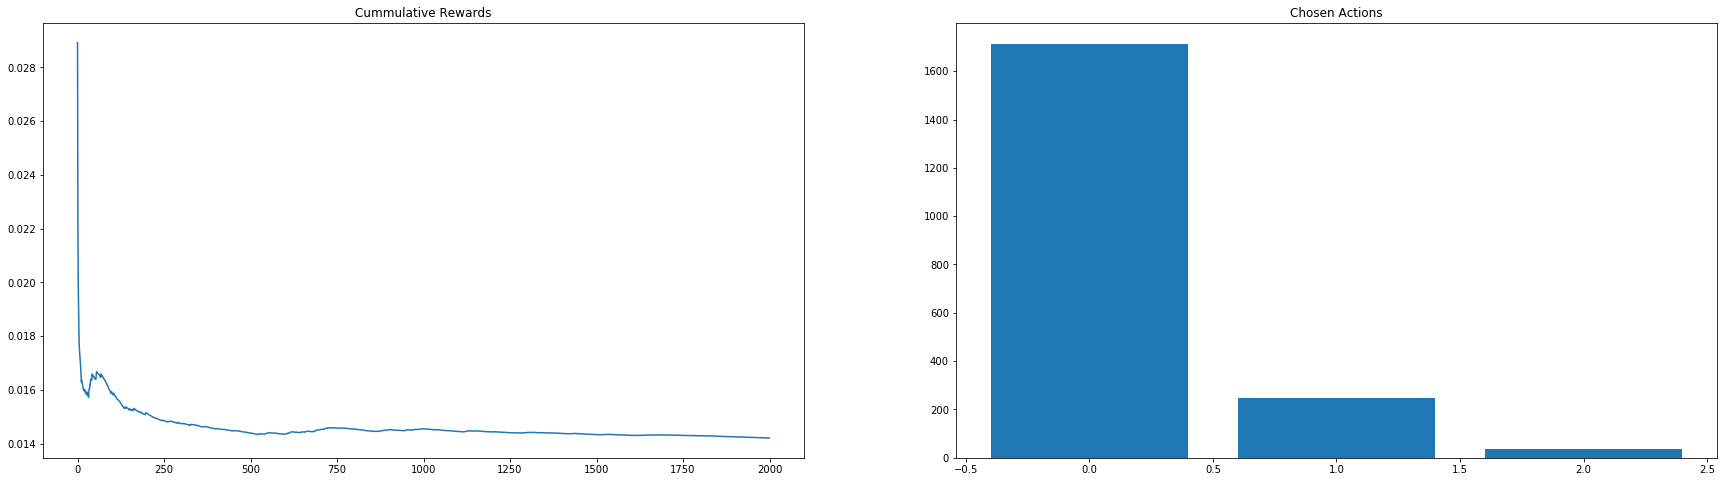

In [256]:
plot_history(rewards,cum_rewards, arm_counts)

### Merge sort should be the fastest

In [180]:
# initialize
total_reward = 0
num_choices = len(choices)
sample_count = [0 for i in range(num_choices)]
sample_rewards = [0 for i in range(num_choices)]
sample_mean = [0.0 for i in range(num_choices)]
sample_var = [0.0 for i in range(num_choices)]
arm_rewards = {0: [], 1:[], 2:[]}
rewards = []
cum_rewards = []
var_multiplier = 1000


for n, elem in enumerate(list_distributions_2):
    dist_type = elem
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    print("\n")
    print("Iteration:", n)
    theta = {}
    for i in range(len(choices)):
        if sample_count[i] >= 2:
            theta[i] = t.rvs(df=sample_count[i]-1,loc=sample_mean[i],scale=sample_var[i]/(sample_count[i]*(sample_count[i]-1)))
            print(choices_names[i],"Theta", theta[i])

        else:
            print("Less than two values for",choices_names[i])
            theta[i] = uniform.rvs(loc=0, scale=1)
            print(choices_names[i],"Theta", theta[i])
    choice = np.argmin([theta[i] for i in range(len(choices))])
    alg = choices[choice]
    alg_name = choices_names[choice]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = ((time.time() - start_time))*(1)
    print("\n")
    print("Chosen algorithm is: ", alg_name, "with reward:", reward)
    arm_rewards[choice].append(reward)
    sample_count[choice] += 1
    sample_rewards[choice] += reward
    #sample_mean[choice]  += (1/sample_count[choice])*(reward-sample_mean[choice]) #this is alternative variation for non-stationary but does not work right now
    sample_mean[choice] = sample_rewards[choice]/sample_count[choice]
    sample_var[choice] = sum([(sample_mean[choice]-i)**2 for i in arm_rewards[choice]])*var_multiplier
    if sample_count[choice] >= 2:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice]/(sample_count[choice]-1))
    else:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice])
    total_reward += reward
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
    
    
q_values = {"quick_sort": sample_mean[0], "merge_sort": sample_mean[1], "heap_sort":sample_mean[2]} ## 
arm_counts = {"quick_sort": sample_count[0], "merge_sort": sample_count[1], "heap_sort":sample_count[2]} ## 

print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)



Iteration: 0
Less than two values for quick_sort
quick_sort Theta 0.4041872107528063
Less than two values for merge_sort
merge_sort Theta 0.6911540906981121
Less than two values for heap_sort
heap_sort Theta 0.4151544073803797


Chosen algorithm is:  quick_sort with reward: 0.006983518600463867
Sample mean is:  0.006983518600463867 Sample variance is: 0.0


Iteration: 1
Less than two values for quick_sort
quick_sort Theta 0.5007297310317637
Less than two values for merge_sort
merge_sort Theta 0.9734351134173095
Less than two values for heap_sort
heap_sort Theta 0.4991393686650808


Chosen algorithm is:  heap_sort with reward: 0.010972023010253906
Sample mean is:  0.010972023010253906 Sample variance is: 0.0


Iteration: 2
Less than two values for quick_sort
quick_sort Theta 0.9472452699850503
Less than two values for merge_sort
merge_sort Theta 0.9656179363216744
Less than two values for heap_sort
heap_sort Theta 0.7622828647018026


Chosen algorithm is:  heap_sort with reward: 0.011



Iteration: 26
Less than two values for quick_sort
quick_sort Theta 0.4683759676806942
Less than two values for merge_sort
merge_sort Theta 0.6357615251129225
heap_sort Theta 0.01147803497319865


Chosen algorithm is:  heap_sort with reward: 0.011996030807495117
Sample mean is:  0.011548546644357534 Sample variance is: 0.0010063164942354119


Iteration: 27
Less than two values for quick_sort
quick_sort Theta 0.7591252352808922
Less than two values for merge_sort
merge_sort Theta 0.8741924206277436
heap_sort Theta 0.011538102888608395


Chosen algorithm is:  heap_sort with reward: 0.010969400405883789
Sample mean is:  0.011527096783673321 Sample variance is: 0.0009800346198189434


Iteration: 28
Less than two values for quick_sort
quick_sort Theta 0.5842507216923583
Less than two values for merge_sort
merge_sort Theta 0.29717391389958403
heap_sort Theta 0.011488654519785455


Chosen algorithm is:  heap_sort with reward: 0.010998010635375977
Sample mean is:  0.011508200849805559 Sample 



Chosen algorithm is:  heap_sort with reward: 0.011970281600952148
Sample mean is:  0.011472619496859036 Sample variance is: 0.0008143200823060385


Iteration: 53
Less than two values for quick_sort
quick_sort Theta 0.03322972815770797
Less than two values for merge_sort
merge_sort Theta 0.8576456095413616
heap_sort Theta 0.011463424431507637


Chosen algorithm is:  heap_sort with reward: 0.011003494262695312
Sample mean is:  0.011463768077346514 Sample variance is: 0.0008028125049747239


Iteration: 54
Less than two values for quick_sort
quick_sort Theta 0.8519983206461218
Less than two values for merge_sort
merge_sort Theta 0.7368780802386797
heap_sort Theta 0.011442886123989573


Chosen algorithm is:  heap_sort with reward: 0.011968374252319336
Sample mean is:  0.011473112636142306 Sample variance is: 0.0007923804212912371


Iteration: 55
Less than two values for quick_sort
quick_sort Theta 0.7625459122461424
Less than two values for merge_sort
merge_sort Theta 0.058122774372497577


Iteration: 79
Less than two values for quick_sort
quick_sort Theta 0.026922857290873292
Less than two values for merge_sort
merge_sort Theta 0.2195131015786087
heap_sort Theta 0.011522308361033632


Chosen algorithm is:  heap_sort with reward: 0.01296544075012207
Sample mean is:  0.011529599563984931 Sample variance is: 0.0008396162139660734


Iteration: 80
Less than two values for quick_sort
quick_sort Theta 0.6178250463921489
Less than two values for merge_sort
merge_sort Theta 0.9221450253457613
heap_sort Theta 0.011529094643648003


Chosen algorithm is:  heap_sort with reward: 0.010977983474731445
Sample mean is:  0.011522704362869262 Sample variance is: 0.0008327916644987714


Iteration: 81
Less than two values for quick_sort
quick_sort Theta 0.6489778789042258
Less than two values for merge_sort
merge_sort Theta 0.8307968049953792
heap_sort Theta 0.011512503858648014


Chosen algorithm is:  heap_sort with reward: 0.01099705696105957
Sample mean is:  0.011516214888772847 Sample v



Iteration: 108
quick_sort Theta 0.005162376746424302
Less than two values for merge_sort
merge_sort Theta 0.35031805914973413
heap_sort Theta 0.011478743543640259


Chosen algorithm is:  quick_sort with reward: 0.006014823913574219
Sample mean is:  0.005179113811916775 Sample variance is: 0.0005650982861315321


Iteration: 109
quick_sort Theta 0.005153495367346164
Less than two values for merge_sort
merge_sort Theta 0.9147052579407775
heap_sort Theta 0.011489287860081503


Chosen algorithm is:  quick_sort with reward: 0.0050122737884521484
Sample mean is:  0.005170332758050216 Sample variance is: 0.0005351689681351433


Iteration: 110
quick_sort Theta 0.005231513685195281
Less than two values for merge_sort
merge_sort Theta 0.17199448917467042
heap_sort Theta 0.011495714656640432


Chosen algorithm is:  quick_sort with reward: 0.005952358245849609
Sample mean is:  0.005209434032440186 Sample variance is: 0.000537580373516951


Iteration: 111
quick_sort Theta 0.005173215211177404
Less



Chosen algorithm is:  quick_sort with reward: 0.004960060119628906
Sample mean is:  0.005142654691423688 Sample variance is: 0.00043521086467990244


Iteration: 141
quick_sort Theta 0.005139380316097003
Less than two values for merge_sort
merge_sort Theta 0.5070265744594025
heap_sort Theta 0.011468288002485385


Chosen algorithm is:  quick_sort with reward: 0.0049893856048583984
Sample mean is:  0.005139589309692383 Sample variance is: 0.00042679883855661113


Iteration: 142
quick_sort Theta 0.005144487031780571
Less than two values for merge_sort
merge_sort Theta 0.7158226405670439
heap_sort Theta 0.01147733635692875


Chosen algorithm is:  quick_sort with reward: 0.0049896240234375
Sample mean is:  0.005136648813883464 Sample variance is: 0.0004187038340811947


Iteration: 143
quick_sort Theta 0.005115841618413386
Less than two values for merge_sort
merge_sort Theta 0.013255400184203903
heap_sort Theta 0.011477793571824945


Chosen algorithm is:  quick_sort with reward: 0.004988670

quick_sort Theta 0.005114547141003046
merge_sort Theta 0.0042162401559687
heap_sort Theta 0.011477615206777276


Chosen algorithm is:  merge_sort with reward: 0.003993034362792969
Sample mean is:  0.004184409976005554 Sample variance is: 0.0002889156251721185


Iteration: 174
quick_sort Theta 0.005123337044731852
merge_sort Theta 0.004140852218503297
heap_sort Theta 0.011478044826510088


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004172984291525448 Sample variance is: 0.00027307768511812303


Iteration: 175
quick_sort Theta 0.005138495199404711
merge_sort Theta 0.004163847912346682
heap_sort Theta 0.01149268328957147


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004162828127543132 Sample variance is: 0.0002588709498789232


Iteration: 176
quick_sort Theta 0.005130760512070409
merge_sort Theta 0.004156720158065556
heap_sort Theta 0.011480224910429333


Chosen algorithm is:  merge_sort with reward: 0.0039



Chosen algorithm is:  merge_sort with reward: 0.0049898624420166016
Sample mean is:  0.004014337764066809 Sample variance is: 0.0004161415877741306


Iteration: 209
quick_sort Theta 0.005131964025431822
merge_sort Theta 0.003999651547894583
heap_sort Theta 0.011478334721384273


Chosen algorithm is:  merge_sort with reward: 0.003987789154052734
Sample mean is:  0.00401382721387423 Sample variance is: 0.0004079955031961227


Iteration: 210
quick_sort Theta 0.005118690346201527
merge_sort Theta 0.0040223296380023105
heap_sort Theta 0.01148601996268957


Chosen algorithm is:  merge_sort with reward: 0.0039899349212646484
Sample mean is:  0.004013376415900464 Sample variance is: 0.0004001602064240633


Iteration: 211
quick_sort Theta 0.005131564167104806
merge_sort Theta 0.004006411170403688
heap_sort Theta 0.011499112082940691


Chosen algorithm is:  merge_sort with reward: 0.00400233268737793
Sample mean is:  0.004013171902409306 Sample variance is: 0.0003926122724415001


Iteration: 2



Chosen algorithm is:  merge_sort with reward: 0.004986763000488281
Sample mean is:  0.004038932711579079 Sample variance is: 0.0003474107934168789


Iteration: 244
quick_sort Theta 0.005121673244908477
merge_sort Theta 0.004032106802709575
heap_sort Theta 0.011466059662443013


Chosen algorithm is:  merge_sort with reward: 0.002991914749145508
Sample mean is:  0.004026898022355704 Sample variance is: 0.0003559716688174893


Iteration: 245
quick_sort Theta 0.005136647966582725
merge_sort Theta 0.00402636706792957
heap_sort Theta 0.011486739922143442


Chosen algorithm is:  merge_sort with reward: 0.0039615631103515625
Sample mean is:  0.0040261555801738395 Sample variance is: 0.000351928547834897


Iteration: 246
quick_sort Theta 0.005137528837368425
merge_sort Theta 0.0040313749167236864
heap_sort Theta 0.01148525455289295


Chosen algorithm is:  merge_sort with reward: 0.004015445709228516
Sample mean is:  0.00402603524454524 Sample variance is: 0.00034793064857037106


Iteration: 2



Chosen algorithm is:  merge_sort with reward: 0.0049893856048583984
Sample mean is:  0.004001109326472048 Sample variance is: 0.0003354359921190957


Iteration: 280
quick_sort Theta 0.005119455623527564
merge_sort Theta 0.004004935674168315
heap_sort Theta 0.011478195379981498


Chosen algorithm is:  merge_sort with reward: 0.002992868423461914
Sample mean is:  0.00399291224595977 Sample variance is: 0.0003409511486316029


Iteration: 281
quick_sort Theta 0.005138824172443805
merge_sort Theta 0.003994966028601025
heap_sort Theta 0.011495749292765988


Chosen algorithm is:  merge_sort with reward: 0.005983829498291016
Sample mean is:  0.004008968030252765 Sample variance is: 0.0003701449260222526


Iteration: 282
quick_sort Theta 0.00512961117108334
merge_sort Theta 0.004011677492429396
heap_sort Theta 0.011477972122638186


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004008817672729492 Sample variance is: 0.0003671627122193676


Iteration: 283


Iteration: 311
quick_sort Theta 0.005127683228146854
merge_sort Theta 0.004050705959630039
heap_sort Theta 0.011477418942782


Chosen algorithm is:  merge_sort with reward: 0.003989696502685547
Sample mean is:  0.004052861944421545 Sample variance is: 0.0003826217621573306


Iteration: 312
quick_sort Theta 0.00512248850206665
merge_sort Theta 0.004057507830516195
heap_sort Theta 0.011478591631486061


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004052449810889459 Sample variance is: 0.0003801635326376865


Iteration: 313
quick_sort Theta 0.0051338784093837445
merge_sort Theta 0.0040559200771426
heap_sort Theta 0.011490062939099996


Chosen algorithm is:  merge_sort with reward: 0.003990888595581055
Sample mean is:  0.004052055187714405 Sample variance is: 0.0003777351581674306


Iteration: 314
quick_sort Theta 0.005135602492928969
merge_sort Theta 0.004047985743955075
heap_sort Theta 0.011479167800004669


Chosen algorithm is:  merge_sort with



Iteration: 345
quick_sort Theta 0.0051254041343656255
merge_sort Theta 0.004045238652929171
heap_sort Theta 0.011490633289838082


Chosen algorithm is:  merge_sort with reward: 0.003993988037109375
Sample mean is:  0.004043921511223975 Sample variance is: 0.00034559347373849195


Iteration: 346
quick_sort Theta 0.005118520402095983
merge_sort Theta 0.0040390885190774006
heap_sort Theta 0.011490665173928195


Chosen algorithm is:  merge_sort with reward: 0.004992485046386719
Sample mean is:  0.0040489403659073765 Sample variance is: 0.0003485159131212629


Iteration: 347
quick_sort Theta 0.00512754427608983
merge_sort Theta 0.004049008241105199
heap_sort Theta 0.011474089938043112


Chosen algorithm is:  merge_sort with reward: 0.003991842269897461
Sample mean is:  0.0040486398496125875 Sample variance is: 0.00034668907248919137


Iteration: 348
quick_sort Theta 0.005134436942343001
merge_sort Theta 0.004045977929288678
heap_sort Theta 0.01147516587687492


Chosen algorithm is:  merge



Iteration: 381
quick_sort Theta 0.005132836821001603
merge_sort Theta 0.004057229305303761
heap_sort Theta 0.01148671291203333


Chosen algorithm is:  merge_sort with reward: 0.003957986831665039
Sample mean is:  0.004053196736744472 Sample variance is: 0.00033268136351255207


Iteration: 382
quick_sort Theta 0.005130111866536508
merge_sort Theta 0.004054639324552442
heap_sort Theta 0.01149271315288719


Chosen algorithm is:  merge_sort with reward: 0.005956888198852539
Sample mean is:  0.004061657587687175 Sample variance is: 0.00034730302855580565


Iteration: 383
quick_sort Theta 0.005136607285347644
merge_sort Theta 0.004062289830996295
heap_sort Theta 0.01147360251885778


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004061342340655032 Sample variance is: 0.0003457819195762304


Iteration: 384
quick_sort Theta 0.005136264958136862
merge_sort Theta 0.00405971945954982
heap_sort Theta 0.011487373972992062


Chosen algorithm is:  merge_sort

quick_sort Theta 0.005133202484619206
merge_sort Theta 0.004058682659305678
heap_sort Theta 0.011484148513524492


Chosen algorithm is:  merge_sort with reward: 0.0049855709075927734
Sample mean is:  0.004060297973396242 Sample variance is: 0.00035551047430942145


Iteration: 416
quick_sort Theta 0.0051304815782132925
merge_sort Theta 0.004060929551882759
heap_sort Theta 0.011485402730592923


Chosen algorithm is:  merge_sort with reward: 0.0040242671966552734
Sample mean is:  0.00406015885842813 Sample variance is: 0.0003541375391549359


Iteration: 417
quick_sort Theta 0.0051193126071824606
merge_sort Theta 0.004063590087442359
heap_sort Theta 0.01148597742814344


Chosen algorithm is:  merge_sort with reward: 0.0039861202239990234
Sample mean is:  0.0040598740944495565 Sample variance is: 0.0003527912962850405


Iteration: 418
quick_sort Theta 0.00513176050113341
merge_sort Theta 0.004058989228977617
heap_sort Theta 0.011477232859554744


Chosen algorithm is:  merge_sort with reward



Chosen algorithm is:  merge_sort with reward: 0.005986452102661133
Sample mean is:  0.004052175189854749 Sample variance is: 0.0003549254350149937


Iteration: 451
quick_sort Theta 0.005127574158228936
merge_sort Theta 0.00405179681713253
heap_sort Theta 0.011465890771405035


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004051960244470713 Sample variance is: 0.0003537276686537607


Iteration: 452
quick_sort Theta 0.005124962156923603
merge_sort Theta 0.004050897617034365
heap_sort Theta 0.01147997344527059


Chosen algorithm is:  merge_sort with reward: 0.003017902374267578
Sample mean is:  0.004048454963554771 Sample variance is: 0.0003561491766366067


Iteration: 453
quick_sort Theta 0.005135856963837779
merge_sort Theta 0.004049046879714086
heap_sort Theta 0.011482020630951566


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004048262093518232 Sample variance is: 0.0003549529021519703


Iteration: 454



Chosen algorithm is:  merge_sort with reward: 0.005984783172607422
Sample mean is:  0.004048343125085338 Sample variance is: 0.0003674166848950145


Iteration: 487
quick_sort Theta 0.005133787618225994
merge_sort Theta 0.004048555955873205
heap_sort Theta 0.011473687244099319


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004048170465411562 Sample variance is: 0.00036630975460559296


Iteration: 488
quick_sort Theta 0.005134764311954871
merge_sort Theta 0.004047945305708116
heap_sort Theta 0.011479608712296233


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004047990925722612 Sample variance is: 0.00036521039466565154


Iteration: 489
quick_sort Theta 0.0051333255949994605
merge_sort Theta 0.0040478423972762296
heap_sort Theta 0.011472048223411555


Chosen algorithm is:  merge_sort with reward: 0.004212141036987305
Sample mean is:  0.00404848535376859 Sample variance is: 0.0003641882004177476


Iteration



Chosen algorithm is:  merge_sort with reward: 0.0219419002532959
Sample mean is:  0.004092043393278775 Sample variance is: 0.001236252800560586


Iteration: 523
quick_sort Theta 0.005127552670327996
merge_sort Theta 0.004091928048248373
heap_sort Theta 0.011479810231012733


Chosen algorithm is:  merge_sort with reward: 0.0030014514923095703
Sample mean is:  0.0040890636339865095 Sample variance is: 0.0012361155079374303


Iteration: 524
quick_sort Theta 0.00512056053929604
merge_sort Theta 0.004088225855643279
heap_sort Theta 0.011492698185576066


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004088794178144159 Sample variance is: 0.0012327647897291533


Iteration: 525
quick_sort Theta 0.005129215319432658
merge_sort Theta 0.004089824820387142
heap_sort Theta 0.011481456726703924


Chosen algorithm is:  merge_sort with reward: 0.0030257701873779297
Sample mean is:  0.0040859055259953375 Sample variance is: 0.0012324764641397261


Iteration: 52


Iteration: 557
quick_sort Theta 0.0051328783839045935
merge_sort Theta 0.004080897512506143
heap_sort Theta 0.011497532832466895


Chosen algorithm is:  merge_sort with reward: 0.004987478256225586
Sample mean is:  0.004085419774055481 Sample variance is: 0.0011655061651468198


Iteration: 558
quick_sort Theta 0.005131975237432015
merge_sort Theta 0.004085648974495291
heap_sort Theta 0.011472260824248189


Chosen algorithm is:  merge_sort with reward: 0.004021167755126953
Sample mean is:  0.004085259544581844 Sample variance is: 0.0011626026948011257


Iteration: 559
quick_sort Theta 0.005127625604905558
merge_sort Theta 0.004086033817971113
heap_sort Theta 0.01149817377411213


Chosen algorithm is:  merge_sort with reward: 0.004954814910888672
Sample mean is:  0.004087422617632358 Sample variance is: 0.001161584347989388


Iteration: 560
quick_sort Theta 0.0051255348258429515
merge_sort Theta 0.004085230417044873
heap_sort Theta 0.011478426166469722


Chosen algorithm is:  merge_sort

Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004080215357415687 Sample variance is: 0.0010991688701775756


Iteration: 592
quick_sort Theta 0.005133958667214222
merge_sort Theta 0.004081096691431523
heap_sort Theta 0.011476377197435774


Chosen algorithm is:  merge_sort with reward: 0.004954814910888672
Sample mean is:  0.004082225931101832 Sample variance is: 0.0010983946698593947


Iteration: 593
quick_sort Theta 0.00512650918874556
merge_sort Theta 0.00408402151034599
heap_sort Theta 0.01146113218240846


Chosen algorithm is:  merge_sort with reward: 0.00402522087097168
Sample mean is:  0.0040820951855510745 Sample variance is: 0.0010958770777993092


Iteration: 594
quick_sort Theta 0.005137170394214627
merge_sort Theta 0.004080809684819973
heap_sort Theta 0.011469551595726367


Chosen algorithm is:  merge_sort with reward: 0.0040128231048583984
Sample mean is:  0.004081936668203952 Sample variance is: 0.0010933745790895337


Iteration: 595
qu

Iteration: 627
quick_sort Theta 0.005136612850634984
merge_sort Theta 0.004079700709316954
heap_sort Theta 0.011462479388984259


Chosen algorithm is:  merge_sort with reward: 0.00398564338684082
Sample mean is:  0.004075748362439744 Sample variance is: 0.0010419143862974915


Iteration: 628
quick_sort Theta 0.005125906250447237
merge_sort Theta 0.004077034959018073
heap_sort Theta 0.011488865127503854


Chosen algorithm is:  merge_sort with reward: 0.0039882659912109375
Sample mean is:  0.004075562624921212 Sample variance is: 0.0010397137959362566


Iteration: 629
quick_sort Theta 0.005143612164932386
merge_sort Theta 0.004074225795113112
heap_sort Theta 0.011461414539799456


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004075382220543037 Sample variance is: 0.0010375216972367666


Iteration: 630
quick_sort Theta 0.005131649205241197
merge_sort Theta 0.004074813315222163
heap_sort Theta 0.011493468440320374


Chosen algorithm is:  merge_sort



Chosen algorithm is:  merge_sort with reward: 0.006978750228881836
Sample mean is:  0.004068068702622215 Sample variance is: 0.0010074629916492887


Iteration: 663
quick_sort Theta 0.005138792418630282
merge_sort Theta 0.004067628468888147
heap_sort Theta 0.011485430120992398


Chosen algorithm is:  merge_sort with reward: 0.003989696502685547
Sample mean is:  0.004067913816851589 Sample variance is: 0.0010054801541667833


Iteration: 664
quick_sort Theta 0.005139814634226963
merge_sort Theta 0.00406588200959919
heap_sort Theta 0.01148725322196406


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.0040677576610557665 Sample variance is: 0.0010035054022463112


Iteration: 665
quick_sort Theta 0.005118474853762718
merge_sort Theta 0.004068527116347982
heap_sort Theta 0.011473392166243204


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004067602589374452 Sample variance is: 0.0010015383176411499


Iteration: 66

quick_sort Theta 0.0051299588665327
merge_sort Theta 0.0040653013600686315
heap_sort Theta 0.011486548490993185


Chosen algorithm is:  merge_sort with reward: 0.004988670349121094
Sample mean is:  0.00407065133216872 Sample variance is: 0.0009577598383948994


Iteration: 697
quick_sort Theta 0.0051216212345733154
merge_sort Theta 0.004074470206388484
heap_sort Theta 0.01148620461881782


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004070499649754277 Sample variance is: 0.0009559953425517071


Iteration: 698
quick_sort Theta 0.005138566062251526
merge_sort Theta 0.004073632098305163
heap_sort Theta 0.011492368944095166


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004070348528088131 Sample variance is: 0.000954237336033308


Iteration: 699
quick_sort Theta 0.0051274169116104175
merge_sort Theta 0.004071437993395278
heap_sort Theta 0.011477712283762601


Chosen algorithm is:  merge_sort with reward: 0.00

quick_sort Theta 0.005140263883046098
merge_sort Theta 0.00406347180867753
heap_sort Theta 0.011470672952318742


Chosen algorithm is:  merge_sort with reward: 0.004987955093383789
Sample mean is:  0.004065948080933468 Sample variance is: 0.0009237013220873954


Iteration: 732
quick_sort Theta 0.005123465042237042
merge_sort Theta 0.004065880933619213
heap_sort Theta 0.01148382467450904


Chosen algorithm is:  merge_sort with reward: 0.003991127014160156
Sample mean is:  0.00406581795733908 Sample variance is: 0.000922101822320774


Iteration: 733
quick_sort Theta 0.005142565104647392
merge_sort Theta 0.004064739947985974
heap_sort Theta 0.011479621226372817


Chosen algorithm is:  merge_sort with reward: 0.0030138492584228516
Sample mean is:  0.00406399162279235 Sample variance is: 0.0009224194137545181


Iteration: 734
quick_sort Theta 0.005140019300317764
merge_sort Theta 0.004067300621905333
heap_sort Theta 0.011472145359825905


Chosen algorithm is:  merge_sort with reward: 0.0049

Chosen algorithm is:  merge_sort with reward: 0.004019975662231445
Sample mean is:  0.004061086397421987 Sample variance is: 0.0009017512523727571


Iteration: 766
quick_sort Theta 0.00512311963358117
merge_sort Theta 0.0040602750105806764
heap_sort Theta 0.011471455763458632


Chosen algorithm is:  merge_sort with reward: 0.004023551940917969
Sample mean is:  0.004061024764488484 Sample variance is: 0.0009002704222242265


Iteration: 767
quick_sort Theta 0.005126014890438217
merge_sort Theta 0.004062924019215567
heap_sort Theta 0.011491242791872146


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004060909396312276 Sample variance is: 0.0008988002646566595


Iteration: 768
quick_sort Theta 0.0051281858285746225
merge_sort Theta 0.004060725362659648
heap_sort Theta 0.011480054698478459


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004060793625352425 Sample variance is: 0.0008973350107809998


Iteration: 769



Chosen algorithm is:  merge_sort with reward: 0.004987239837646484
Sample mean is:  0.004059353350107544 Sample variance is: 0.0008734058015313746


Iteration: 800
quick_sort Theta 0.005129423437829483
merge_sort Theta 0.004057203564369288
heap_sort Theta 0.011493710705358899


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004059243906712273 Sample variance is: 0.0008720530581195538


Iteration: 801
quick_sort Theta 0.0051304584940985035
merge_sort Theta 0.0040599320742643495
heap_sort Theta 0.011487166795626997


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004059137024494432 Sample variance is: 0.0008707041894563888


Iteration: 802
quick_sort Theta 0.005126169337017213
merge_sort Theta 0.004060851189972011
heap_sort Theta 0.011473000793805704


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004059031952259152 Sample variance is: 0.0008693592852301172


Iteration



Chosen algorithm is:  merge_sort with reward: 0.0059604644775390625
Sample mean is:  0.004067987999505742 Sample variance is: 0.0008597846002460256


Iteration: 832
quick_sort Theta 0.005125104555509496
merge_sort Theta 0.004064853074161747
heap_sort Theta 0.011482601417329163


Chosen algorithm is:  merge_sort with reward: 0.0039975643157958984
Sample mean is:  0.004067883668122468 Sample variance is: 0.0008585163028388758


Iteration: 833
quick_sort Theta 0.005142086348568482
merge_sort Theta 0.004068233274423562
heap_sort Theta 0.01147361734387007


Chosen algorithm is:  merge_sort with reward: 0.006979465484619141
Sample mean is:  0.004072190741815511 Sample variance is: 0.0008697848242816437


Iteration: 834
quick_sort Theta 0.005120117902819584
merge_sort Theta 0.0040722011317263765
heap_sort Theta 0.011486657768680285


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004072070297849759 Sample variance is: 0.000868507981409396


Iteration: 



Chosen algorithm is:  merge_sort with reward: 0.005986213684082031
Sample mean is:  0.004077117995353742 Sample variance is: 0.0008545583964972657


Iteration: 866
quick_sort Theta 0.0051303371081595035
merge_sort Theta 0.0040787243039028896
heap_sort Theta 0.011486563579877535


Chosen algorithm is:  merge_sort with reward: 0.0039899349212646484
Sample mean is:  0.004076995029099737 Sample variance is: 0.0008533621136884183


Iteration: 867
quick_sort Theta 0.0051300332575407335
merge_sort Theta 0.004078341957911038
heap_sort Theta 0.0114929062717943


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.0040768734166319945 Sample variance is: 0.0008521690005984111


Iteration: 868
quick_sort Theta 0.00514305471257015
merge_sort Theta 0.004077580689638301
heap_sort Theta 0.011475476506239085


Chosen algorithm is:  merge_sort with reward: 0.003987312316894531
Sample mean is:  0.004076747451653461 Sample variance is: 0.000850980044131405


Iteration: 

merge_sort Theta 0.004074656939713089
heap_sort Theta 0.01147737399032301


Chosen algorithm is:  merge_sort with reward: 0.004987478256225586
Sample mean is:  0.004073756997303296 Sample variance is: 0.0008332869335947028


Iteration: 902
quick_sort Theta 0.005131932870899874
merge_sort Theta 0.0040723350333553435
heap_sort Theta 0.011487709178854383


Chosen algorithm is:  merge_sort with reward: 0.003996372222900391
Sample mean is:  0.0040736531251228895 Sample variance is: 0.0008321749624006035


Iteration: 903
quick_sort Theta 0.005134442746927678
merge_sort Theta 0.00407204248508026
heap_sort Theta 0.011456811588789431


Chosen algorithm is:  merge_sort with reward: 0.0030214786529541016
Sample mean is:  0.0040722427035784275 Sample variance is: 0.0008325419585723339


Iteration: 904
quick_sort Theta 0.005130640667570209
merge_sort Theta 0.00407042121867386
heap_sort Theta 0.011484038856197615


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.00407158623624277 Sample variance is: 0.0008184504517291166


Iteration: 936
quick_sort Theta 0.0051350669146748434
merge_sort Theta 0.004071894574679343
heap_sort Theta 0.011493438727424471


Chosen algorithm is:  merge_sort with reward: 0.004977226257324219
Sample mean is:  0.004072748803663927 Sample variance is: 0.0008184513264443799


Iteration: 937
quick_sort Theta 0.005128774674196748
merge_sort Theta 0.0040722990122417915
heap_sort Theta 0.011470543766989262


Chosen algorithm is:  merge_sort with reward: 0.003988504409790039
Sample mean is:  0.004072640798030756 Sample variance is: 0.0008174097817622047


Iteration: 938
quick_sort Theta 0.00513672020402972
merge_sort Theta 0.004073649585341734
heap_sort Theta 0.011485017134232528


Chosen algorithm is:  merge_sort with reward: 0.003991603851318359
Sample mean is:  0.004072537037535605 Sample variance is: 0.0008163702289372523


Iteration: 93

Iteration: 971
quick_sort Theta 0.005142755606350193
merge_sort Theta 0.004069803757423132
heap_sort Theta 0.011490520061036432


Chosen algorithm is:  merge_sort with reward: 0.0049855709075927734
Sample mean is:  0.004070368387189486 Sample variance is: 0.0007942195234333263


Iteration: 972
quick_sort Theta 0.00514021513430178
merge_sort Theta 0.004071068188484299
heap_sort Theta 0.01149650435881828


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004070270573434654 Sample variance is: 0.0007932516213105555


Iteration: 973
quick_sort Theta 0.005141139375151341
merge_sort Theta 0.004071223396144693
heap_sort Theta 0.011483466392972489


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004070172999419418 Sample variance is: 0.0007922860753195562


Iteration: 974
quick_sort Theta 0.005134630276667563
merge_sort Theta 0.004069789365446869
heap_sort Theta 0.011483415355637402


Chosen algorithm is:  merge_sort w

merge_sort Theta 0.004064382170399787
heap_sort Theta 0.011469040201011903


Chosen algorithm is:  merge_sort with reward: 0.0049898624420166016
Sample mean is:  0.004067150770493274 Sample variance is: 0.0007813136197224076


Iteration: 1006
quick_sort Theta 0.005120188726465985
merge_sort Theta 0.004067428044820136
heap_sort Theta 0.011471441043991797


Chosen algorithm is:  merge_sort with reward: 0.003963470458984375
Sample mean is:  0.004067028649985018 Sample variance is: 0.0007804049208141302


Iteration: 1007
quick_sort Theta 0.005132862245312592
merge_sort Theta 0.004066109803227334
heap_sort Theta 0.011481203146148958


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004066938792957979 Sample variance is: 0.0007794925791029146


Iteration: 1008
quick_sort Theta 0.005124485419807878
merge_sort Theta 0.004067863669280739
heap_sort Theta 0.011477096081107935


Chosen algorithm is:  merge_sort with reward: 0.003995656967163086
Sample mean is:


Chosen algorithm is:  merge_sort with reward: 0.004026174545288086
Sample mean is:  0.004066627223158803 Sample variance is: 0.0007564173260952157


Iteration: 1039
quick_sort Theta 0.005127323323751711
merge_sort Theta 0.0040675988730608575
heap_sort Theta 0.01146601660314599


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004066539189172169 Sample variance is: 0.0007555655721066123


Iteration: 1040
quick_sort Theta 0.005139007112794927
merge_sort Theta 0.004065606381047062
heap_sort Theta 0.01148063949216302


Chosen algorithm is:  merge_sort with reward: 0.005014896392822266
Sample mean is:  0.004067613206390346 Sample variance is: 0.0007557274737638068


Iteration: 1041
quick_sort Theta 0.00513098011103571
merge_sort Theta 0.004067936712621788
heap_sort Theta 0.011475540181579773


Chosen algorithm is:  merge_sort with reward: 0.00399327278137207
Sample mean is:  0.004067529110886932 Sample variance is: 0.0007548778619555704


Iteration: 10



Iteration: 1073
quick_sort Theta 0.005131981610622565
merge_sort Theta 0.004065955534558668
heap_sort Theta 0.0114808592557759


Chosen algorithm is:  merge_sort with reward: 0.003989696502685547
Sample mean is:  0.004066178371812579 Sample variance is: 0.0007464258213722896


Iteration: 1074
quick_sort Theta 0.005132164357196884
merge_sort Theta 0.004065763076873028
heap_sort Theta 0.011477159927375653


Chosen algorithm is:  merge_sort with reward: 0.003996849060058594
Sample mean is:  0.004066102767328659 Sample variance is: 0.0007456161876282822


Iteration: 1075
quick_sort Theta 0.005137025971954509
merge_sort Theta 0.004065870712417308
heap_sort Theta 0.011482946594074568


Chosen algorithm is:  merge_sort with reward: 0.004018545150756836
Sample mean is:  0.004066050961646119 Sample variance is: 0.0007448055475797647


Iteration: 1076
quick_sort Theta 0.005124707356822251
merge_sort Theta 0.004065018069455119
heap_sort Theta 0.01147793843857402


Chosen algorithm is:  merge_so



Chosen algorithm is:  merge_sort with reward: 0.004987239837646484
Sample mean is:  0.00407722975078382 Sample variance is: 0.0007460470996668358


Iteration: 1108
quick_sort Theta 0.005123192095690292
merge_sort Theta 0.00407810369362463
heap_sort Theta 0.011482787489414035


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.00407713820881648 Sample variance is: 0.0007452697562454719


Iteration: 1109
quick_sort Theta 0.005127555572586266
merge_sort Theta 0.00407668607395307
heap_sort Theta 0.011471759106633412


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004077048111362618 Sample variance is: 0.0007444938145892827


Iteration: 1110
quick_sort Theta 0.0051239995250136495
merge_sort Theta 0.0040763416580431
heap_sort Theta 0.011467368671829844


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004076957202282933 Sample variance is: 0.0007437196593025496


Iteration: 111



Chosen algorithm is:  merge_sort with reward: 0.0049860477447509766
Sample mean is:  0.004083348146038483 Sample variance is: 0.0007497606234333215


Iteration: 1140
quick_sort Theta 0.005129673122437473
merge_sort Theta 0.004082149795696514
heap_sort Theta 0.011477007592919926


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004083253844950958 Sample variance is: 0.0007490058612627655


Iteration: 1141
quick_sort Theta 0.00513518727765599
merge_sort Theta 0.004084535509162083
heap_sort Theta 0.011471111915719966


Chosen algorithm is:  merge_sort with reward: 0.003989458084106445
Sample mean is:  0.004083158524055791 Sample variance is: 0.0007482528427915567


Iteration: 1142
quick_sort Theta 0.005139411380217488
merge_sort Theta 0.004083215894683625
heap_sort Theta 0.011481178053279592


Chosen algorithm is:  merge_sort with reward: 0.003996133804321289
Sample mean is:  0.004083070174086517 Sample variance is: 0.0007475001118671781


Iteration



Iteration: 1173
quick_sort Theta 0.005140058492174986
merge_sort Theta 0.004087233469142113
heap_sort Theta 0.011491590186023783


Chosen algorithm is:  merge_sort with reward: 0.003989696502685547
Sample mean is:  0.004086877886704573 Sample variance is: 0.0007443392525446268


Iteration: 1174
quick_sort Theta 0.005119654384121623
merge_sort Theta 0.004086653669578358
heap_sort Theta 0.01148116174571


Chosen algorithm is:  merge_sort with reward: 0.003962993621826172
Sample mean is:  0.004086756073268114 Sample variance is: 0.0007436217259381052


Iteration: 1175
quick_sort Theta 0.00513320472998773
merge_sort Theta 0.004087283517785029
heap_sort Theta 0.011473817623150884


Chosen algorithm is:  merge_sort with reward: 0.004019260406494141
Sample mean is:  0.00408668977104142 Sample variance is: 0.0007428950095801704


Iteration: 1176
quick_sort Theta 0.005127987847596931
merge_sort Theta 0.004086584470636224
heap_sort Theta 0.01148089664423424


Chosen algorithm is:  merge_sort w



Iteration: 1207
quick_sort Theta 0.005130951184375157
merge_sort Theta 0.00408064082525706
heap_sort Theta 0.011476402168009133


Chosen algorithm is:  merge_sort with reward: 0.0039899349212646484
Sample mean is:  0.0040809481484549385 Sample variance is: 0.0007295028606924289


Iteration: 1208
quick_sort Theta 0.005134268120001596
merge_sort Theta 0.004081009124531255
heap_sort Theta 0.011484435008015593


Chosen algorithm is:  merge_sort with reward: 0.003963947296142578
Sample mean is:  0.004080836825094032 Sample variance is: 0.0007288211209913176


Iteration: 1209
quick_sort Theta 0.005138314221318452
merge_sort Theta 0.0040807901366572375
heap_sort Theta 0.0114881240151324


Chosen algorithm is:  merge_sort with reward: 0.003986835479736328
Sample mean is:  0.004080747470203008 Sample variance is: 0.0007281360655512096


Iteration: 1210
quick_sort Theta 0.005131900970073021
merge_sort Theta 0.004080184586865074
heap_sort Theta 0.011484878393508653


Chosen algorithm is:  merge



Iteration: 1242
quick_sort Theta 0.005124742352557183
merge_sort Theta 0.004079076230989456
heap_sort Theta 0.01147730150072593


Chosen algorithm is:  merge_sort with reward: 0.0029916763305664062
Sample mean is:  0.0040770585635840064 Sample variance is: 0.0007127479884037623


Iteration: 1243
quick_sort Theta 0.00512944733084443
merge_sort Theta 0.004076495677325539
heap_sort Theta 0.011474259890211795


Chosen algorithm is:  merge_sort with reward: 0.0039942264556884766
Sample mean is:  0.004076982290924803 Sample variance is: 0.0007120973956405097


Iteration: 1244
quick_sort Theta 0.005129778055774348
merge_sort Theta 0.0040757997595492704
heap_sort Theta 0.011489235968735127


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004076901113866334 Sample variance is: 0.0007114488520347039


Iteration: 1245
quick_sort Theta 0.005129218299153363
merge_sort Theta 0.004076427655433706
heap_sort Theta 0.011480998008574321


Chosen algorithm is:  mer



Chosen algorithm is:  merge_sort with reward: 0.006954193115234375
Sample mean is:  0.004080066518979588 Sample variance is: 0.0007168596557317214


Iteration: 1277
quick_sort Theta 0.005127343421505642
merge_sort Theta 0.004080441565901389
heap_sort Theta 0.011496050068586628


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004079986257212503 Sample variance is: 0.0007162262454662469


Iteration: 1278
quick_sort Theta 0.005131756949743516
merge_sort Theta 0.004081102125123051
heap_sort Theta 0.011477149350121845


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004079905075222972 Sample variance is: 0.000715594145714873


Iteration: 1279
quick_sort Theta 0.005119718029759449
merge_sort Theta 0.004079151511965974
heap_sort Theta 0.011491237332412947


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.0040798240379428695 Sample variance is: 0.0007149631605486163


Iteration:



Iteration: 1311
quick_sort Theta 0.005124936628228894
merge_sort Theta 0.004077431636425591
heap_sort Theta 0.011473800601795118


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004077465943281944 Sample variance is: 0.0007071798603651107


Iteration: 1312
quick_sort Theta 0.005132335849771652
merge_sort Theta 0.004077058227501231
heap_sort Theta 0.011487686745720085


Chosen algorithm is:  merge_sort with reward: 0.004013776779174805
Sample mean is:  0.004077410801148518 Sample variance is: 0.0007065705648168349


Iteration: 1313
quick_sort Theta 0.005146748242509992
merge_sort Theta 0.004076845752388062
heap_sort Theta 0.011472853377516514


Chosen algorithm is:  merge_sort with reward: 0.003985404968261719
Sample mean is:  0.004077331211327681 Sample variance is: 0.0007059661381378211


Iteration: 1314
quick_sort Theta 0.0051285193127901625
merge_sort Theta 0.004078783802643706
heap_sort Theta 0.01147849738089275


Chosen algorithm is:  merge



Chosen algorithm is:  merge_sort with reward: 0.0049610137939453125
Sample mean is:  0.004076539967554617 Sample variance is: 0.0006956686614444472


Iteration: 1344
quick_sort Theta 0.005139452999007723
merge_sort Theta 0.004076618499131872
heap_sort Theta 0.01147590035107865


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004076467407985003 Sample variance is: 0.0006950883437020704


Iteration: 1345
quick_sort Theta 0.005131380590635828
merge_sort Theta 0.0040764773743382126
heap_sort Theta 0.01147235305977969


Chosen algorithm is:  merge_sort with reward: 0.003961324691772461
Sample mean is:  0.004076370486506709 Sample variance is: 0.0006945139193900158


Iteration: 1346
quick_sort Theta 0.005131696356845596
merge_sort Theta 0.004077356022196763
heap_sort Theta 0.011467459442436535


Chosen algorithm is:  merge_sort with reward: 0.0049784183502197266
Sample mean is:  0.0040771291474518 Sample variance is: 0.0006946136601985637


Iteration

Iteration: 1378
quick_sort Theta 0.005127134957480878
merge_sort Theta 0.004075048250156246
heap_sort Theta 0.011493503778663056


Chosen algorithm is:  merge_sort with reward: 0.0069806575775146484
Sample mean is:  0.004076541202367084 Sample variance is: 0.0006959096652199463


Iteration: 1379
quick_sort Theta 0.005132105231946109
merge_sort Theta 0.00407706910323764
heap_sort Theta 0.011494017942004267


Chosen algorithm is:  merge_sort with reward: 0.003024578094482422
Sample mean is:  0.004075680348759977 Sample variance is: 0.0006962453008701448


Iteration: 1380
quick_sort Theta 0.005125979996361978
merge_sort Theta 0.004075645555428344
heap_sort Theta 0.011472951832257964


Chosen algorithm is:  merge_sort with reward: 0.003986358642578125
Sample mean is:  0.004075607313840777 Sample variance is: 0.0006956820656350569


Iteration: 1381
quick_sort Theta 0.005126399413003243
merge_sort Theta 0.004075268828191439
heap_sort Theta 0.011490770278686353


Chosen algorithm is:  merge_s



Chosen algorithm is:  merge_sort with reward: 0.00498509407043457
Sample mean is:  0.004074250247068466 Sample variance is: 0.00068767609006241


Iteration: 1414
quick_sort Theta 0.005125133913044778
merge_sort Theta 0.004073480972752041
heap_sort Theta 0.011467013955221643


Chosen algorithm is:  merge_sort with reward: 0.0049550533294677734
Sample mean is:  0.004074950965511107 Sample variance is: 0.0006877457722160205


Iteration: 1415
quick_sort Theta 0.005123093982266458
merge_sort Theta 0.0040747298957526466
heap_sort Theta 0.011485102567573457


Chosen algorithm is:  merge_sort with reward: 0.003763914108276367
Sample mean is:  0.004074703718406786 Sample variance is: 0.0006872755425035118


Iteration: 1416
quick_sort Theta 0.00512170214581752
merge_sort Theta 0.00407407769734543
heap_sort Theta 0.011472744632062144


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004074637524375279 Sample variance is: 0.0006867347350399662


Iteration: 1



Iteration: 1448
quick_sort Theta 0.0051196802661565965
merge_sort Theta 0.004074551270740263
heap_sort Theta 0.011473847742828627


Chosen algorithm is:  merge_sort with reward: 0.003991127014160156
Sample mean is:  0.004074989595125111 Sample variance is: 0.0006763702036926966


Iteration: 1449
quick_sort Theta 0.005127525386550364
merge_sort Theta 0.0040750266236628755
heap_sort Theta 0.011490572401849085


Chosen algorithm is:  merge_sort with reward: 0.0029990673065185547
Sample mean is:  0.004074156837935787 Sample variance is: 0.0006767422738595476


Iteration: 1450
quick_sort Theta 0.005130475995002702
merge_sort Theta 0.004074661205645023
heap_sort Theta 0.011475387668526914


Chosen algorithm is:  merge_sort with reward: 0.003964424133300781
Sample mean is:  0.004074071971188196 Sample variance is: 0.0006762277921876816


Iteration: 1451
quick_sort Theta 0.005125099525724855
merge_sort Theta 0.004073974669084482
heap_sort Theta 0.011480971959499023


Chosen algorithm is:  me



Chosen algorithm is:  merge_sort with reward: 0.004985332489013672
Sample mean is:  0.004076597373651234 Sample variance is: 0.0006778347783990786


Iteration: 1482
quick_sort Theta 0.005137099909664857
merge_sort Theta 0.004076995275194795
heap_sort Theta 0.011470266170563992


Chosen algorithm is:  merge_sort with reward: 0.004983425140380859
Sample mean is:  0.004077281771965747 Sample variance is: 0.0006779434499917657


Iteration: 1483
quick_sort Theta 0.005135660508746093
merge_sort Theta 0.004077882263956346
heap_sort Theta 0.011487929635649496


Chosen algorithm is:  merge_sort with reward: 0.003995656967163086
Sample mean is:  0.004077220214797721 Sample variance is: 0.0006774368191496338


Iteration: 1484
quick_sort Theta 0.005129812124084595
merge_sort Theta 0.004077303181761873
heap_sort Theta 0.011480906685987552


Chosen algorithm is:  merge_sort with reward: 0.003996849060058594
Sample mean is:  0.004077159648742906 Sample variance is: 0.0006769307994178096


Iteration



Chosen algorithm is:  merge_sort with reward: 0.0049855709075927734
Sample mean is:  0.004076591566084412 Sample variance is: 0.0006680654849974786


Iteration: 1517
quick_sort Theta 0.005142147548894717
merge_sort Theta 0.00407689918886628
heap_sort Theta 0.011475599200701092


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004076528023271 Sample variance is: 0.0006675793901730285


Iteration: 1518
quick_sort Theta 0.005136082536333882
merge_sort Theta 0.004076468839360337
heap_sort Theta 0.011470682045524294


Chosen algorithm is:  merge_sort with reward: 0.003991842269897461
Sample mean is:  0.004076465800087037 Sample variance is: 0.0006670937923915839


Iteration: 1519
quick_sort Theta 0.005123851215642692
merge_sort Theta 0.004076798000641572
heap_sort Theta 0.011479999312067864


Chosen algorithm is:  merge_sort with reward: 0.004984617233276367
Sample mean is:  0.00407713257793813 Sample variance is: 0.0006672091779154273


Iteration: 152

Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004081023321754631 Sample variance is: 0.0006647072933879252


Iteration: 1550
quick_sort Theta 0.005125929712359511
merge_sort Theta 0.004079781363681211
heap_sort Theta 0.011481926200536693


Chosen algorithm is:  merge_sort with reward: 0.0039942264556884766
Sample mean is:  0.004080961012446615 Sample variance is: 0.0006642351820332712


Iteration: 1551
quick_sort Theta 0.00512145711474586
merge_sort Theta 0.004081905571697807
heap_sort Theta 0.011483779962916564


Chosen algorithm is:  merge_sort with reward: 0.003032207489013672
Sample mean is:  0.004080208678498671 Sample variance is: 0.0006645473570210714


Iteration: 1552
quick_sort Theta 0.005131871219682146
merge_sort Theta 0.004080846139093251
heap_sort Theta 0.01147817606063552


Chosen algorithm is:  merge_sort with reward: 0.003991127014160156
Sample mean is:  0.004080144820674773 Sample variance is: 0.0006640763258139959


Iteration: 



Chosen algorithm is:  merge_sort with reward: 0.004952192306518555
Sample mean is:  0.004077832573338559 Sample variance is: 0.000655360318934712


Iteration: 1583
quick_sort Theta 0.005117743440674081
merge_sort Theta 0.004077921010849802
heap_sort Theta 0.011476016491790718


Chosen algorithm is:  merge_sort with reward: 0.003993034362792969
Sample mean is:  0.0040777731075527625 Sample variance is: 0.0006549054595487374


Iteration: 1584
quick_sort Theta 0.00512564771082257
merge_sort Theta 0.004077552354204937
heap_sort Theta 0.011496880668593503


Chosen algorithm is:  merge_sort with reward: 0.003988504409790039
Sample mean is:  0.004077710550651738 Sample variance is: 0.0006544517834312629


Iteration: 1585
quick_sort Theta 0.005125516146525478
merge_sort Theta 0.004077522430244489
heap_sort Theta 0.011479880800846783


Chosen algorithm is:  merge_sort with reward: 0.002994537353515625
Sample mean is:  0.004076952026003883 Sample variance is: 0.0006548147762679827


Iteration:



Chosen algorithm is:  merge_sort with reward: 0.003991842269897461
Sample mean is:  0.00407875499934653 Sample variance is: 0.0006510007277642315


Iteration: 1616
quick_sort Theta 0.005132680157264854
merge_sort Theta 0.004078671379106816
heap_sort Theta 0.011477827272950266


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004078694285392107 Sample variance is: 0.0006505596033503044


Iteration: 1617
quick_sort Theta 0.005127764012385827
merge_sort Theta 0.004078717950231801
heap_sort Theta 0.01148847231406103


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.0040786344711094685 Sample variance is: 0.0006501189326865912


Iteration: 1618
quick_sort Theta 0.005120277252569805
merge_sort Theta 0.004077739386960414
heap_sort Theta 0.011486336394202589


Chosen algorithm is:  merge_sort with reward: 0.003993988037109375
Sample mean is:  0.00407857653378298 Sample variance is: 0.0006496785499344761


Iteration: 1



Iteration: 1650
quick_sort Theta 0.005132288084213837
merge_sort Theta 0.004075909472351124
heap_sort Theta 0.011477432399433824


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.00407508660384815 Sample variance is: 0.0006429635312763422


Iteration: 1651
quick_sort Theta 0.005134647639260234
merge_sort Theta 0.0040745585016102575
heap_sort Theta 0.01147134842415572


Chosen algorithm is:  merge_sort with reward: 0.003989696502685547
Sample mean is:  0.00407502944849262 Sample variance is: 0.0006425377597141212


Iteration: 1652
quick_sort Theta 0.005131764137148929
merge_sort Theta 0.004074838375567981
heap_sort Theta 0.011478190356535354


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004074971731689862 Sample variance is: 0.0006421126610801902


Iteration: 1653
quick_sort Theta 0.005142475890186313
merge_sort Theta 0.004074713812242411
heap_sort Theta 0.011472090428105436


Chosen algorithm is:  merge_

Sample mean is:  0.004076440894845739 Sample variance is: 0.0006314155329088156


Iteration: 1685
quick_sort Theta 0.0051208482050314865
merge_sort Theta 0.004077091439402242
heap_sort Theta 0.011465167092774379


Chosen algorithm is:  merge_sort with reward: 0.003989458084106445
Sample mean is:  0.00407638396892248 Sample variance is: 0.0006310069838091938


Iteration: 1686
quick_sort Theta 0.005135737023214275
merge_sort Theta 0.004076859544099188
heap_sort Theta 0.011478650026149947


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.00407632774118507 Sample variance is: 0.0006305988551463334


Iteration: 1687
quick_sort Theta 0.005135393171476173
merge_sort Theta 0.004076051058626283
heap_sort Theta 0.01148125782442742


Chosen algorithm is:  merge_sort with reward: 0.003990888595581055
Sample mean is:  0.004076271898606244 Sample variance is: 0.0006301912006148198


Iteration: 1688
quick_sort Theta 0.005132472915365899
merge_sort Theta 0.004076



Iteration: 1719
quick_sort Theta 0.005133700805740362
merge_sort Theta 0.0040776050510146315
heap_sort Theta 0.011462312803831353


Chosen algorithm is:  merge_sort with reward: 0.003998756408691406
Sample mean is:  0.004077289534897261 Sample variance is: 0.0006245729003497016


Iteration: 1720
quick_sort Theta 0.005139437630699831
merge_sort Theta 0.004076823647900849
heap_sort Theta 0.011475593869761406


Chosen algorithm is:  merge_sort with reward: 0.00398564338684082
Sample mean is:  0.004077230900125631 Sample variance is: 0.0006241784193909662


Iteration: 1721
quick_sort Theta 0.005132256446438641
merge_sort Theta 0.004076599540669429
heap_sort Theta 0.011487729597773453


Chosen algorithm is:  merge_sort with reward: 0.003988504409790039
Sample mean is:  0.00407717416963309 Sample variance is: 0.0006237841064909027


Iteration: 1722
quick_sort Theta 0.0051232223963032
merge_sort Theta 0.00407720898080444
heap_sort Theta 0.011487526382126884


Chosen algorithm is:  merge_sor



Iteration: 1754
quick_sort Theta 0.005128270306101344
merge_sort Theta 0.00407756239182418
heap_sort Theta 0.011471394567261126


Chosen algorithm is:  merge_sort with reward: 0.003990888595581055
Sample mean is:  0.0040779127205769275 Sample variance is: 0.0006143914006972953


Iteration: 1755
quick_sort Theta 0.005123794550344478
merge_sort Theta 0.0040783378672792185
heap_sort Theta 0.011484605008005811


Chosen algorithm is:  merge_sort with reward: 0.004021883010864258
Sample mean is:  0.004077877658180361 Sample variance is: 0.0006140086492653238


Iteration: 1756
quick_sort Theta 0.005144848418253737
merge_sort Theta 0.0040772874882169866
heap_sort Theta 0.011494540959537978


Chosen algorithm is:  merge_sort with reward: 0.0039637088775634766
Sample mean is:  0.004077806258067405 Sample variance is: 0.0006136325652287394


Iteration: 1757
quick_sort Theta 0.005132448579203301
merge_sort Theta 0.0040776498025745
heap_sort Theta 0.011487146838065326


Chosen algorithm is:  merg



Chosen algorithm is:  merge_sort with reward: 0.004959821701049805
Sample mean is:  0.004076719430147433 Sample variance is: 0.0006067466823003802


Iteration: 1790
quick_sort Theta 0.005127933275885997
merge_sort Theta 0.004076429368432424
heap_sort Theta 0.011478486793637267


Chosen algorithm is:  merge_sort with reward: 0.003993511199951172
Sample mean is:  0.004076668475934208 Sample variance is: 0.0006063791410549495


Iteration: 1791
quick_sort Theta 0.005134841508731804
merge_sort Theta 0.004076283280984818
heap_sort Theta 0.011477181159649883


Chosen algorithm is:  merge_sort with reward: 0.00398707389831543
Sample mean is:  0.004076613644491357 Sample variance is: 0.0006060127253382839


Iteration: 1792
quick_sort Theta 0.005138740012675059
merge_sort Theta 0.004076708661072777
heap_sort Theta 0.011480255733293513


Chosen algorithm is:  merge_sort with reward: 0.002993345260620117
Sample mean is:  0.004075951095021099 Sample variance is: 0.0006063595674112735


Iteration:



Chosen algorithm is:  merge_sort with reward: 0.005984783172607422
Sample mean is:  0.004075706900061072 Sample variance is: 0.0006048484460991048


Iteration: 1823
quick_sort Theta 0.0051264507708494575
merge_sort Theta 0.004075652580072272
heap_sort Theta 0.011479074169126031


Chosen algorithm is:  merge_sort with reward: 0.004013776779174805
Sample mean is:  0.0040756697271193635 Sample variance is: 0.0006044874758838779


Iteration: 1824
quick_sort Theta 0.005131190793909806
merge_sort Theta 0.004075486113505019
heap_sort Theta 0.011482867809037477


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.0040756177244317985 Sample variance is: 0.0006041291462972487


Iteration: 1825
quick_sort Theta 0.0051293452272366275
merge_sort Theta 0.004075805200398748
heap_sort Theta 0.01148142468003336


Chosen algorithm is:  merge_sort with reward: 0.003986835479736328
Sample mean is:  0.004075564497666394 Sample variance is: 0.000603771466882183


Iterati



Chosen algorithm is:  merge_sort with reward: 0.004989147186279297
Sample mean is:  0.004075870435331905 Sample variance is: 0.0006001220635261355


Iteration: 1857
quick_sort Theta 0.005147735116568646
merge_sort Theta 0.004075752440501663
heap_sort Theta 0.011479726781359379


Chosen algorithm is:  merge_sort with reward: 0.004986286163330078
Sample mean is:  0.004076405973995433 Sample variance is: 0.0006002564055929032


Iteration: 1858
quick_sort Theta 0.005129774371024198
merge_sort Theta 0.0040764463473743715
heap_sort Theta 0.01146865620995195


Chosen algorithm is:  merge_sort with reward: 0.004013776779174805
Sample mean is:  0.004076369154950859 Sample variance is: 0.0005999056195367297


Iteration: 1859
quick_sort Theta 0.005144691577094635
merge_sort Theta 0.004075977285870921
heap_sort Theta 0.01147877494442454


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004076317670622668 Sample variance is: 0.000599557452718499


Iteration: 



Chosen algorithm is:  merge_sort with reward: 0.004986286163330078
Sample mean is:  0.004077508503270934 Sample variance is: 0.0005979978362049527


Iteration: 1889
quick_sort Theta 0.0051363156871421295
merge_sort Theta 0.0040776575176722065
heap_sort Theta 0.011495950748296575


Chosen algorithm is:  merge_sort with reward: 0.003025054931640625
Sample mean is:  0.004076900851093319 Sample variance is: 0.0005982918981105156


Iteration: 1890
quick_sort Theta 0.005123634281995018
merge_sort Theta 0.004076525996821532
heap_sort Theta 0.011493017333351693


Chosen algorithm is:  merge_sort with reward: 0.004016876220703125
Sample mean is:  0.004076866214838044 Sample variance is: 0.0005979485430176224


Iteration: 1891
quick_sort Theta 0.0051349414047612675
merge_sort Theta 0.004076319766278652
heap_sort Theta 0.011473556482855184


Chosen algorithm is:  merge_sort with reward: 0.004011392593383789
Sample mean is:  0.0040768284561174825 Sample variance is: 0.0005976059785513164


Itera

Iteration: 1922
quick_sort Theta 0.005129068872496578
merge_sort Theta 0.0040768820025953775
heap_sort Theta 0.01148216852366976


Chosen algorithm is:  merge_sort with reward: 0.004991054534912109
Sample mean is:  0.004077568675573419 Sample variance is: 0.0005913980988418998


Iteration: 1923
quick_sort Theta 0.005127798174665151
merge_sort Theta 0.004078414031240741
heap_sort Theta 0.0114731906370082


Chosen algorithm is:  merge_sort with reward: 0.0039920806884765625
Sample mean is:  0.0040775202678797065 Sample variance is: 0.0005910671673738086


Iteration: 1924
quick_sort Theta 0.00513308776041966
merge_sort Theta 0.004077401922368277
heap_sort Theta 0.011481497887886586


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004077470025978455 Sample variance is: 0.0005907369351008986


Iteration: 1925
quick_sort Theta 0.005130211339969569
merge_sort Theta 0.004077591112335751
heap_sort Theta 0.011477920022017179


Chosen algorithm is:  merge_so



Chosen algorithm is:  merge_sort with reward: 0.004960298538208008
Sample mean is:  0.004080499750942937 Sample variance is: 0.0005944593844670424


Iteration: 1955
quick_sort Theta 0.005122282853636586
merge_sort Theta 0.004080400760530237
heap_sort Theta 0.011492317015866426


Chosen algorithm is:  merge_sort with reward: 0.004019021987915039
Sample mean is:  0.0040804655586386945 Sample variance is: 0.0005941306799755639


Iteration: 1956
quick_sort Theta 0.005123562438256821
merge_sort Theta 0.004080704668544918
heap_sort Theta 0.011482728305151194


Chosen algorithm is:  merge_sort with reward: 0.00399470329284668
Sample mean is:  0.0040804178864509285 Sample variance is: 0.0005938043286951329


Iteration: 1957
quick_sort Theta 0.005126533733325466
merge_sort Theta 0.004080390772041464
heap_sort Theta 0.01147564771006534


Chosen algorithm is:  merge_sort with reward: 0.004958152770996094
Sample mean is:  0.004080905516942342 Sample variance is: 0.0005939022643196782


Iteration

Iteration: 1987
quick_sort Theta 0.005133845864631138
merge_sort Theta 0.004082600222667225
heap_sort Theta 0.011495407291484573


Chosen algorithm is:  merge_sort with reward: 0.004985332489013672
Sample mean is:  0.0040834551951924305 Sample variance is: 0.000590090053058914


Iteration: 1988
quick_sort Theta 0.0051249701334617785
merge_sort Theta 0.004083684390379722
heap_sort Theta 0.011484021086561715


Chosen algorithm is:  merge_sort with reward: 0.0039882659912109375
Sample mean is:  0.0040834032076424685 Sample variance is: 0.0005897725481315073


Iteration: 1989
quick_sort Theta 0.005136054874035143
merge_sort Theta 0.0040834001969418865
heap_sort Theta 0.011485025089073677


Chosen algorithm is:  merge_sort with reward: 0.0029926300048828125
Sample mean is:  0.004082807807422621 Sample variance is: 0.0005900998906684387


Iteration: 1990
quick_sort Theta 0.005133553763398853
merge_sort Theta 0.0040829325489935946
heap_sort Theta 0.011502405628416486


Chosen algorithm is:  m

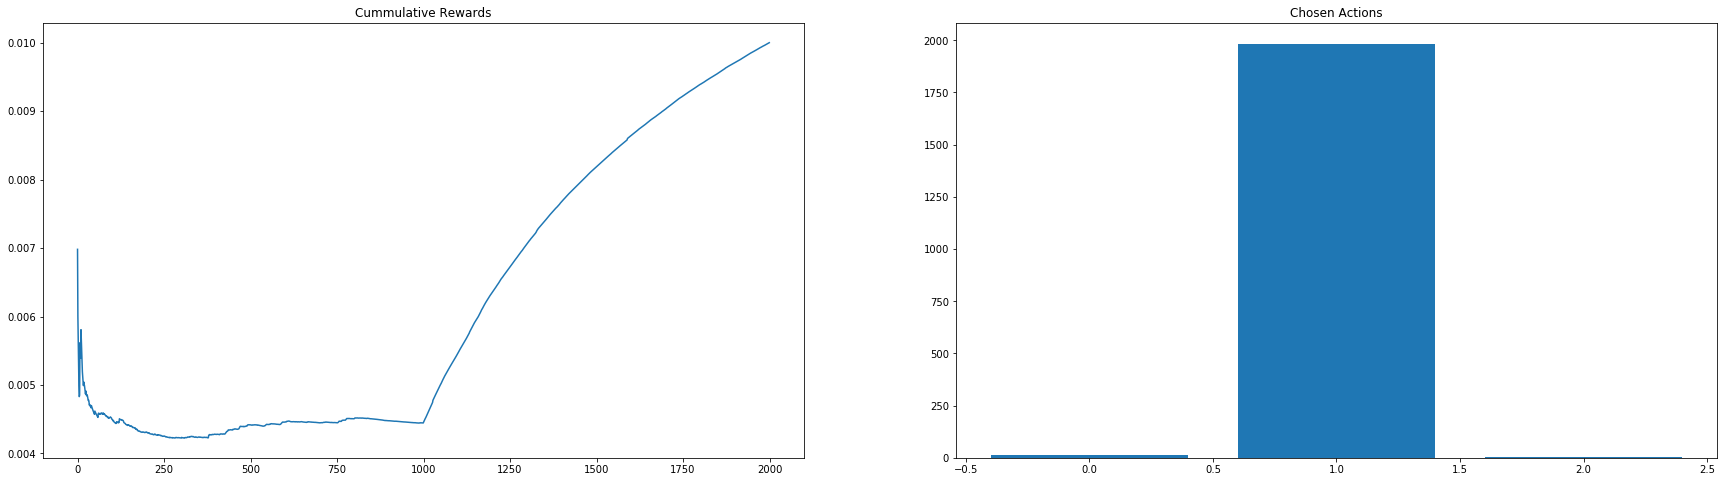

In [182]:
plot_history(rewards,cum_rewards, arm_counts)

In [300]:
def count_consec(listrand):
    count=1
    consec_list=[]
    for i in range(len(listrand[:-1])):
        if listrand[i]+1 == listrand[i+1]:
            count+=1
        else:
            consec_list.append(count)
            count=1

    # Account for the last iteration
    consec_list.append(count)     

    return consec_list

### Quick sort should be the fastest at first an then at iteration 1000 merge sort should be faster

In [315]:
# initialize
total_reward = 0
num_choices = len(choices)
sample_count = [0 for i in range(num_choices)]
sample_rewards = [0 for i in range(num_choices)]
sample_mean = [0.0 for i in range(num_choices)]
sample_var = [0.0 for i in range(num_choices)]
arm_rewards = {0: [], 1:[], 2:[]}
rewards = []
cum_rewards = []
var_multiplier = 5
n_consecutive_list = [] # this list is to check whether
list_iteration_results = []

for n, elem in enumerate(list_distributions):
    dist_type = elem
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    print("\n")
    print("Iteration:", n)
    theta = {}
    for i in range(len(choices)):
        if sample_count[i] >= 2:
            theta[i] = t.rvs(df=sample_count[i]-1,loc=sample_mean[i],scale=np.sqrt(sample_var[i]/sample_count[i])*var_multiplier)
            print(choices_names[i],"Theta", theta[i])

        else:
            print("Less than two values for",choices_names[i])
            theta[i] = uniform.rvs(loc=0, scale=1)
            print(choices_names[i],"Theta", theta[i])
    
    choice = np.argmin([theta[i] for i in range(len(choices))])
    alg = choices[choice]
    alg_name = choices_names[choice]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = ((time.time() - start_time))*(1)
    print("\n")
    print("Chosen algorithm is: ", alg_name, "with reward:", reward)
    
    tset, pval = ttest_1samp(arm_rewards[choice], reward)
    print("\n")#
    #print("Arm Rewards",arm_rewards[choice])
    print("Pval: ", pval)
    print("Grenze: ", (sample_var[choice]**20))
        
    arm_rewards[choice].append(reward)
    sample_count[choice] += 1
    sample_rewards[choice] += reward
    #sample_mean[choice]  += alpha*(reward-sample_mean[choice])
    #sample_mean[choice]  += (1/sample_count[choice])*(reward-sample_mean[choice]) #this is alternative variation for non-stationary but does not work right now
    sample_mean[choice] = np.mean(arm_rewards[choice])
    #sample_var[choice] = sum([(sample_mean[choice]-i)**2 for i in arm_rewards[choice]])*var_multiplier
    sample_var[choice] = np.var(arm_rewards[choice]).astype('float64')
    if sample_count[choice] >= 2:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice])
    else:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice])
    total_reward += reward
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
    
    if pval < sample_var[choice]**20:
        n_consecutive_list.append(n)
        if any(i >= 5 for i in count_consec(n_consecutive_list)):
                print("RESTART EXPERIMENT AT ITERATION:", n)
                q_values = {"quick_sort": sample_mean[0], "merge_sort": sample_mean[1], "heap_sort":sample_mean[2]} ## 
                arm_counts = {"quick_sort": sample_count[0], "merge_sort": sample_count[1], "heap_sort":sample_count[2]} ##
                list_iteration_results.append([q_values, arm_counts,rewards,cum_rewards,n])

                sample_count = [0 for i in range(num_choices)]
                sample_rewards = [0 for i in range(num_choices)]
                sample_mean = [0.0 for i in range(num_choices)]
                sample_var = [0.0 for i in range(num_choices)]
                arm_rewards = {0: [], 1:[], 2:[]}
                rewards = []
                cum_rewards = []
                n_consecutive_list = []


    
q_values = {"quick_sort": sample_mean[0], "merge_sort": sample_mean[1], "heap_sort":sample_mean[2]} ## 
arm_counts = {"quick_sort": sample_count[0], "merge_sort": sample_count[1], "heap_sort":sample_count[2]} ## 
list_iteration_results.append([q_values, arm_counts,rewards,cum_rewards,n])

#print("Total reward", np.round(total_reward,4))
#print("Average rewards per algo", q_values)
#print("Count per chosen algo", arm_counts)



Iteration: 0
Less than two values for quick_sort
quick_sort Theta 0.7604435824555057
Less than two values for merge_sort
merge_sort Theta 0.19738645443010627
Less than two values for heap_sort
heap_sort Theta 0.731844229613013


Chosen algorithm is:  merge_sort with reward: 0.016956806182861328


Pval:  nan
Grenze:  0.0
Sample mean is:  0.016956806182861328 Sample variance is: 0.0


Iteration: 1
Less than two values for quick_sort
quick_sort Theta 0.312889900717196
Less than two values for merge_sort
merge_sort Theta 0.4666821607394879
Less than two values for heap_sort
heap_sort Theta 0.11328906578182973


Chosen algorithm is:  heap_sort with reward: 0.02297353744506836


Pval:  nan
Grenze:  0.0
Sample mean is:  0.02297353744506836 Sample variance is: 0.0


Iteration: 2
Less than two values for quick_sort
quick_sort Theta 0.5243297363640828
Less than two values for merge_sort
merge_sort Theta 0.18220166541682525
Less than two values for heap_sort
heap_sort Theta 0.9321906573754265



C:\Users\iRacheva\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\iRacheva\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\iRacheva\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\iRacheva\Anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\iRacheva\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\iRacheva\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\iRacheva\An



Iteration: 7
Less than two values for quick_sort
quick_sort Theta 0.15494747514259133
merge_sort Theta 0.014001936201760315
heap_sort Theta 0.02228170188663815


Chosen algorithm is:  merge_sort with reward: 0.020945072174072266


Pval:  0.00029151241972800806
Grenze:  3.7382197444736395e-121
Sample mean is:  0.016132434209187824 Sample variance is: 5.425623397867537e-06


Iteration: 8
Less than two values for quick_sort
quick_sort Theta 0.537415236784015
merge_sort Theta 0.01645801745786676
heap_sort Theta 0.02391683994397535


Chosen algorithm is:  merge_sort with reward: 0.014960050582885742


Pval:  0.3114976477800729
Grenze:  4.88644377999605e-106
Sample mean is:  0.015964950834001814 Sample variance is: 4.818838426811508e-06


Iteration: 9
Less than two values for quick_sort
quick_sort Theta 0.41019635644479835
merge_sort Theta 0.007567568956454487
heap_sort Theta 0.01749014224224379


Chosen algorithm is:  merge_sort with reward: 0.014959096908569336


Pval:  0.304597767043347



Chosen algorithm is:  merge_sort with reward: 0.0189208984375


Pval:  9.193087214383769e-14
Grenze:  5.3558469032244485e-115
Sample mean is:  0.015002241841068974 Sample variance is: 2.452916147652245e-06


Iteration: 30
Less than two values for quick_sort
quick_sort Theta 0.6999031623158304
merge_sort Theta 0.015353035422956183
heap_sort Theta 0.02516956635690824


Chosen algorithm is:  merge_sort with reward: 0.014963150024414062


Pval:  0.899704741749459
Grenze:  6.21804762654681e-113
Sample mean is:  0.01500084570475987 Sample variance is: 2.3653646278298347e-06


Iteration: 31
Less than two values for quick_sort
quick_sort Theta 0.3374765213562284
merge_sort Theta 0.014110819606588516
heap_sort Theta 0.02129779136609547


Chosen algorithm is:  merge_sort with reward: 0.013991832733154297


Pval:  0.0020623228586649604
Grenze:  3.005813009630741e-113
Sample mean is:  0.01496605215401485 Sample variance is: 2.317696883174957e-06


Iteration: 32
Less than two values for quick_sor



Iteration: 58
Less than two values for quick_sort
quick_sort Theta 0.7377738748275969
merge_sort Theta 0.01487179423626928
heap_sort Theta 0.02117178748348343


Chosen algorithm is:  merge_sort with reward: 0.01498723030090332


Pval:  0.772283196312409
Grenze:  1.3221528649110978e-116
Sample mean is:  0.015036510569708688 Sample variance is: 1.5785229284599827e-06


Iteration: 59
Less than two values for quick_sort
quick_sort Theta 0.7311442876703824
merge_sort Theta 0.014709908295792936
heap_sort Theta 0.021843996698326113


Chosen algorithm is:  merge_sort with reward: 0.014995813369750977


Pval:  0.8110480205481575
Grenze:  9.226094323059117e-117
Sample mean is:  0.015035796583744517 Sample variance is: 1.5508580912037527e-06


Iteration: 60
Less than two values for quick_sort
quick_sort Theta 0.6391612718125718
merge_sort Theta 0.015222789090158756
heap_sort Theta 0.023035149865545588


Chosen algorithm is:  merge_sort with reward: 0.014961957931518555


Pval:  0.65896747973965



Iteration: 86
Less than two values for quick_sort
quick_sort Theta 0.09156466003056063
merge_sort Theta 0.014048815745653998
heap_sort Theta 0.02212352634550426


Chosen algorithm is:  merge_sort with reward: 0.01495814323425293


Pval:  0.06382063699839911
Grenze:  2.7183516271843023e-115
Sample mean is:  0.01523845252536592 Sample variance is: 1.848147381121226e-06


Iteration: 87
Less than two values for quick_sort
quick_sort Theta 0.8281401078541475
merge_sort Theta 0.015707168947090466
heap_sort Theta 0.02215332442767568


Chosen algorithm is:  merge_sort with reward: 0.014960765838623047


Pval:  0.06629742107232917
Grenze:  2.1613844589679446e-115
Sample mean is:  0.015235185623168945 Sample variance is: 1.8273009733521202e-06


Iteration: 88
Less than two values for quick_sort
quick_sort Theta 0.32105516927174704
merge_sort Theta 0.013897092321088206
heap_sort Theta 0.02174157649101208


Chosen algorithm is:  merge_sort with reward: 0.013965368270874023


Pval:  3.62612293540

Grenze:  1.7651068117671712e-116
Sample mean is:  0.01508044061206636 Sample variance is: 1.626993059615667e-06


Iteration: 109
Less than two values for quick_sort
quick_sort Theta 0.0878448660596216
merge_sort Theta 0.014167851102959086
heap_sort Theta 0.0234492771114784


Chosen algorithm is:  merge_sort with reward: 0.01498866081237793


Pval:  0.4647286485845088
Grenze:  1.689328102620499e-116
Sample mean is:  0.015079574764899488 Sample variance is: 1.6117227860754372e-06


Iteration: 110
Less than two values for quick_sort
quick_sort Theta 0.3779826579063442
merge_sort Theta 0.01472893036174336
heap_sort Theta 0.02255492489399985


Chosen algorithm is:  merge_sort with reward: 0.014968395233154297


Pval:  0.37157145412897685
Grenze:  1.3989652206564522e-116
Sample mean is:  0.01507853570385514 Sample variance is: 1.5967743989715428e-06


Iteration: 111
Less than two values for quick_sort
quick_sort Theta 0.8735242531416868
merge_sort Theta 0.015386001793890405
heap_sort Theta 0



Iteration: 132
Less than two values for quick_sort
quick_sort Theta 0.5608491316358206
merge_sort Theta 0.015632291065070882
heap_sort Theta 0.0243276592520361


Chosen algorithm is:  merge_sort with reward: 0.01495981216430664


Pval:  0.48336710480885614
Grenze:  4.043124785825652e-117
Sample mean is:  0.015036286786198616 Sample variance is: 1.5029444033719253e-06


Iteration: 133
Less than two values for quick_sort
quick_sort Theta 0.7889427715066504
merge_sort Theta 0.015080884825028064
heap_sort Theta 0.02440313022989066


Chosen algorithm is:  merge_sort with reward: 0.015958309173583984


Pval:  5.029925739879927e-14
Grenze:  3.458265331223084e-117
Sample mean is:  0.015043434246565944 Sample variance is: 1.4978327038447644e-06


Iteration: 134
Less than two values for quick_sort
quick_sort Theta 0.5110843913819904
merge_sort Theta 0.01467268084199244
heap_sort Theta 0.0233246766411001


Chosen algorithm is:  merge_sort with reward: 0.015958309173583984


Pval:  5.31854483821

Chosen algorithm is:  merge_sort with reward: 0.014994621276855469


Pval:  0.039260280654408654
Grenze:  2.473049053875426e-109
Sample mean is:  0.015318555769577524 Sample variance is: 3.6888846638397225e-06


Iteration: 158
Less than two values for quick_sort
quick_sort Theta 0.6007392046146244
merge_sort Theta 0.014753449555556047
heap_sort Theta 0.029016846402311787


Chosen algorithm is:  merge_sort with reward: 0.01598381996154785


Pval:  3.4239779954095106e-05
Grenze:  2.177216098942261e-109
Sample mean is:  0.015322875666927981 Sample variance is: 3.6677860788284105e-06


Iteration: 159
Less than two values for quick_sort
quick_sort Theta 0.976721782035461
merge_sort Theta 0.015698911079181012
heap_sort Theta 0.015982682721195903


Chosen algorithm is:  merge_sort with reward: 0.014963388442993164


Pval:  0.02156206273311439
Grenze:  1.941243238351825e-109
Sample mean is:  0.0153205563945155 Sample variance is: 3.6449513126125575e-06


Iteration: 160
Less than two values for



Iteration: 181
Less than two values for quick_sort
quick_sort Theta 0.04661699878977332
merge_sort Theta 0.015309711187998249
heap_sort Theta 0.02197496476795053


Chosen algorithm is:  merge_sort with reward: 0.018949508666992188


Pval:  1.3952769422152813e-64
Grenze:  2.8945651874260773e-110
Sample mean is:  0.015226276580896755 Sample variance is: 3.3947948563564637e-06


Iteration: 182
Less than two values for quick_sort
quick_sort Theta 0.04558741528498944
merge_sort Theta 0.014818926221319412
heap_sort Theta 0.022111466904936743


Chosen algorithm is:  merge_sort with reward: 0.013965129852294922


Pval:  2.1699470815251046e-16
Grenze:  4.133050479539159e-110
Sample mean is:  0.015219191486915846 Sample variance is: 3.3846081196801193e-06


Iteration: 183
Less than two values for quick_sort
quick_sort Theta 0.31577419819921415
merge_sort Theta 0.014805331697515725
heap_sort Theta 0.022534693193173694


Chosen algorithm is:  merge_sort with reward: 0.013963937759399414


Pval: 

Chosen algorithm is:  merge_sort with reward: 0.015965700149536133


Pval:  1.3717104226781904e-08
Grenze:  8.094239848738898e-111
Sample mean is:  0.015234598299352134 Sample variance is: 3.116379964016923e-06


Iteration: 210
Less than two values for quick_sort
quick_sort Theta 0.9676590842890155
merge_sort Theta 0.015268464628825801
heap_sort Theta 0.02037028680746303


Chosen algorithm is:  merge_sort with reward: 0.013963460922241211


Pval:  2.9657820675423624e-20
Grenze:  7.464626288948537e-111
Sample mean is:  0.015228427729560333 Sample variance is: 3.1090574719080443e-06


Iteration: 211
Less than two values for quick_sort
quick_sort Theta 0.09566269855410225
merge_sort Theta 0.016179401665497545
heap_sort Theta 0.021016273515966404


Chosen algorithm is:  merge_sort with reward: 0.013964176177978516


Pval:  3.2402853086242065e-20
Grenze:  7.121557804873554e-111
Sample mean is:  0.015222320234142064 Sample variance is: 3.1017219796530214e-06


Iteration: 212
Less than two va

Less than two values for quick_sort
quick_sort Theta 0.5548365943200804
merge_sort Theta 0.0144356370752605
heap_sort Theta 0.023505834812093434


Chosen algorithm is:  merge_sort with reward: 0.01595616340637207


Pval:  9.793531323913519e-10
Grenze:  2.574162534182712e-111
Sample mean is:  0.015239823577750443 Sample variance is: 2.9444000986537314e-06


Iteration: 239
Less than two values for quick_sort
quick_sort Theta 0.9635039885131705
merge_sort Theta 0.015047108335972694
heap_sort Theta 0.015968231011850305


Chosen algorithm is:  merge_sort with reward: 0.015959739685058594


Pval:  8.25822223110705e-10
Grenze:  2.3984820479010345e-111
Sample mean is:  0.015242887050547499 Sample variance is: 2.934066795077124e-06


Iteration: 240
Less than two values for quick_sort
quick_sort Theta 0.49300881749202663
merge_sort Theta 0.014944254453359961
heap_sort Theta 0.02529236138998938


Chosen algorithm is:  merge_sort with reward: 0.0159914493560791


Pval:  1.676429886219906e-10
Grenz



Iteration: 267
Less than two values for quick_sort
quick_sort Theta 0.7889093468100994
merge_sort Theta 0.01571647380958872
heap_sort Theta 0.020684542382208845


Chosen algorithm is:  merge_sort with reward: 0.01770925521850586


Pval:  1.1818797716494556e-66
Grenze:  6.241063104198216e-112
Sample mean is:  0.015295946099458993 Sample variance is: 2.7644882465558983e-06


Iteration: 268
Less than two values for quick_sort
quick_sort Theta 0.9003380188884832
merge_sort Theta 0.015099493956837696
heap_sort Theta 0.02284797289566127


Chosen algorithm is:  merge_sort with reward: 0.014993906021118164


Pval:  0.0035705699224387287
Grenze:  6.79665079387725e-112
Sample mean is:  0.015294802008253155 Sample variance is: 2.754360952620182e-06


Iteration: 269
Less than two values for quick_sort
quick_sort Theta 0.0320045471530902
merge_sort Theta 0.014475150551792798
heap_sort Theta 0.02380323352824091


Chosen algorithm is:  merge_sort with reward: 0.01596379280090332


Pval:  3.24131227



Iteration: 290
Less than two values for quick_sort
quick_sort Theta 0.359911790368884
merge_sort Theta 0.015838809615511297
heap_sort Theta 0.021970169882253837


Chosen algorithm is:  merge_sort with reward: 0.015958070755004883


Pval:  3.0269079367662154e-12
Grenze:  2.167080239861876e-112
Sample mean is:  0.015259894990084464 Sample variance is: 2.6034763541916274e-06


Iteration: 291
Less than two values for quick_sort
quick_sort Theta 0.722966151826046
merge_sort Theta 0.015151968206479675
heap_sort Theta 0.019564712529061952


Chosen algorithm is:  merge_sort with reward: 0.021946430206298828


Pval:  7.049992033418189e-181
Grenze:  2.0467874805415417e-112
Sample mean is:  0.015283274483847451 Sample variance is: 2.7501544976709966e-06


Iteration: 292
Less than two values for quick_sort
quick_sort Theta 0.02760200217257791
merge_sort Theta 0.015149964945137656
heap_sort Theta 0.025468447052227262


Chosen algorithm is:  merge_sort with reward: 0.01496434211730957


Pval:  0.0



Iteration: 318
Less than two values for quick_sort
quick_sort Theta 0.166971284806677
merge_sort Theta 0.015428628137502003
heap_sort Theta 0.02440281271265083


Chosen algorithm is:  merge_sort with reward: 0.015245199203491211


Pval:  0.6526435150215506
Grenze:  1.4501172022631475e-112
Sample mean is:  0.015285936026527478 Sample variance is: 2.5508288325722997e-06


Iteration: 319
Less than two values for quick_sort
quick_sort Theta 0.23495457028115418
merge_sort Theta 0.015206693741250226
heap_sort Theta 0.022107673415497766


Chosen algorithm is:  merge_sort with reward: 0.01598668098449707


Pval:  1.305889116718713e-13
Grenze:  1.3602738378619673e-112
Sample mean is:  0.015288167698368145 Sample variance is: 2.5442640263008264e-06


Iteration: 320
Less than two values for quick_sort
quick_sort Theta 0.22715774633143027
merge_sort Theta 0.015884192810644165
heap_sort Theta 0.02234989087756096


Chosen algorithm is:  merge_sort with reward: 0.013997793197631836


Pval:  4.30798

Chosen algorithm is:  merge_sort with reward: 0.01399683952331543


Pval:  7.951054750396404e-31
Grenze:  1.1973250808736465e-108
Sample mean is:  0.01542332640454813 Sample variance is: 4.011019927499812e-06


Iteration: 344
quick_sort Theta 0.014527474524167167
merge_sort Theta 0.015415417119178135
heap_sort Theta 0.02241594054454699


Chosen algorithm is:  quick_sort with reward: 0.013993501663208008


Pval:  0.01397929081267372
Grenze:  3.890200159602782e-96
Sample mean is:  0.01716669968196324 Sample variance is: 1.6525762464483496e-05


Iteration: 345
quick_sort Theta 0.013575999958373487
merge_sort Theta 0.01608400684574601
heap_sort Theta 0.02140236332032938


Chosen algorithm is:  quick_sort with reward: 0.015003681182861328


Pval:  0.07728122672513595
Grenze:  2.3079697980649654e-96
Sample mean is:  0.01702249844868978 Sample variance is: 1.5715160906337484e-05


Iteration: 346
quick_sort Theta 0.017646924667487483
merge_sort Theta 0.015903585866243165
heap_sort Theta 0.0211



Pval:  0.001929846770335242
Grenze:  1.0473470643410061e-98
Sample mean is:  0.01533631925229673 Sample variance is: 1.2367122963197716e-05


Iteration: 373
quick_sort Theta 0.014769185500530893
merge_sort Theta 0.015118634342535093
heap_sort Theta 0.021996171077645364


Chosen algorithm is:  quick_sort with reward: 0.016959428787231445


Pval:  0.026440944633926496
Grenze:  7.004442553775504e-99
Sample mean is:  0.01539428744997297 Sample variance is: 1.201616842265582e-05


Iteration: 374
quick_sort Theta 0.016530229839563166
merge_sort Theta 0.015437171631799942
heap_sort Theta 0.022874614369579088


Chosen algorithm is:  merge_sort with reward: 0.014993429183959961


Pval:  8.518869712763184e-05
Grenze:  5.777582768458953e-109
Sample mean is:  0.015416705120376677 Sample variance is: 3.862554858149349e-06


Iteration: 375
quick_sort Theta 0.013235876768212824
merge_sort Theta 0.01545929890801575
heap_sort Theta 0.020745251137826597


Chosen algorithm is:  quick_sort with reward: 



Chosen algorithm is:  quick_sort with reward: 0.01396632194519043


Pval:  0.08013944955364512
Grenze:  3.3194183093209676e-101
Sample mean is:  0.014841121435165406 Sample variance is: 9.2465628054228e-06


Iteration: 403
quick_sort Theta 0.01477012715977978
merge_sort Theta 0.015714264528871723
heap_sort Theta 0.020399554297361715


Chosen algorithm is:  quick_sort with reward: 0.013998031616210938


Pval:  0.09127200586580518
Grenze:  2.0874038366742273e-101
Sample mean is:  0.014820558268849442 Sample variance is: 9.037950635696833e-06


Iteration: 404
quick_sort Theta 0.018853419671390394
merge_sort Theta 0.01516747443389188
heap_sort Theta 0.022098151650641443


Chosen algorithm is:  merge_sort with reward: 0.014997005462646484


Pval:  6.792110399753926e-05
Grenze:  3.128331804267126e-109
Sample mean is:  0.015409340765482869 Sample variance is: 3.74635800524009e-06


Iteration: 405
quick_sort Theta 0.014836328496743833
merge_sort Theta 0.015282057141424447
heap_sort Theta 0.0



Chosen algorithm is:  quick_sort with reward: 0.013963937759399414


Pval:  0.11718383906810416
Grenze:  4.851578553547116e-104
Sample mean is:  0.014478841194739708 Sample variance is: 6.727106354651234e-06


Iteration: 434
quick_sort Theta 0.012424101827499558
merge_sort Theta 0.016477878359196903
heap_sort Theta 0.02405306100647749


Chosen algorithm is:  quick_sort with reward: 0.01396036148071289


Pval:  0.11469782203363652
Grenze:  3.602183872507373e-104
Sample mean is:  0.014470985441496878 Sample variance is: 6.629191836628678e-06


Iteration: 435
quick_sort Theta 0.012398733910218255
merge_sort Theta 0.01574251397636875
heap_sort Theta 0.021319009945972738


Chosen algorithm is:  quick_sort with reward: 0.012969970703125


Pval:  1.3957497479400716e-05
Grenze:  2.6866539884466947e-104
Sample mean is:  0.014448582236446551 Sample variance is: 6.563374312258731e-06


Iteration: 436
quick_sort Theta 0.012944703774224764
merge_sort Theta 0.015365676239533235
heap_sort Theta 0.0

heap_sort Theta 0.021377966005968748


Chosen algorithm is:  quick_sort with reward: 0.014962196350097656


Pval:  0.004394737622419974
Grenze:  3.1581490466104365e-106
Sample mean is:  0.01424357295036316 Sample variance is: 5.254109690756469e-06


Iteration: 465
quick_sort Theta 0.013527392060481487
merge_sort Theta 0.01529821740977127
heap_sort Theta 0.021139640162278376


Chosen algorithm is:  quick_sort with reward: 0.012975215911865234


Pval:  1.5311793786670713e-06
Grenze:  2.5702934375020975e-106
Sample mean is:  0.014229321747683408 Sample variance is: 5.212947266858995e-06


Iteration: 466
quick_sort Theta 0.01309669062995078
merge_sort Theta 0.015534177025928535
heap_sort Theta 0.021215394752168583


Chosen algorithm is:  quick_sort with reward: 0.013963699340820312


Pval:  0.27809761466760113
Grenze:  2.1961734362648177e-106
Sample mean is:  0.01422637038760715 Sample variance is: 5.155800867401237e-06


Iteration: 467
quick_sort Theta 0.013991314678090493
merge_sort Thet



Pval:  0.5031458883178985
Grenze:  4.107249584406152e-108
Sample mean is:  0.014092696231344471 Sample variance is: 4.235450826343881e-06


Iteration: 495
quick_sort Theta 0.01580209250156965
merge_sort Theta 0.016341381222332606
heap_sort Theta 0.021392700225658864


Chosen algorithm is:  quick_sort with reward: 0.012966394424438477


Pval:  4.944008950758789e-08
Grenze:  3.451380800043901e-108
Sample mean is:  0.014082986733009076 Sample variance is: 4.209779870381608e-06


Iteration: 496
quick_sort Theta 0.014274678430667005
merge_sort Theta 0.015676491621178634
heap_sort Theta 0.019589032240275632


Chosen algorithm is:  quick_sort with reward: 0.013964653015136719


Pval:  0.5374801169785568
Grenze:  3.0562420231060765e-108
Sample mean is:  0.01408197533371102 Sample variance is: 4.173917505559084e-06


Iteration: 497
quick_sort Theta 0.01391389686071792
merge_sort Theta 0.015063014099679558
heap_sort Theta 0.02097706203183769


Chosen algorithm is:  quick_sort with reward: 0.01



Chosen algorithm is:  quick_sort with reward: 0.004992485046386719


Pval:  2.3415812904502987e-51
Grenze:  1.1671553072053144e-97
Sample mean is:  0.012743057964517059 Sample variance is: 1.4567855975814908e-05


Iteration: 520
quick_sort Theta 0.014076805582792444
merge_sort Theta 0.014857767980547451
heap_sort Theta 0.022243661070921815


Chosen algorithm is:  quick_sort with reward: 0.003991842269897461


Pval:  8.298346611845508e-57
Grenze:  1.853159428943116e-97
Sample mean is:  0.012680549280984062 Sample variance is: 1.5006919498568887e-05


Iteration: 521
quick_sort Theta 0.01218955254889797
merge_sort Theta 0.014736237437429626
heap_sort Theta 0.02057912765867294


Chosen algorithm is:  quick_sort with reward: 0.0048961639404296875


Pval:  1.1762777015318342e-50
Grenze:  3.3560703604394703e-97
Sample mean is:  0.012625340874313462 Sample variance is: 1.5327202988782413e-05


Iteration: 522
quick_sort Theta 0.01101442551898398
merge_sort Theta 0.016683860179017785
heap_sort



Chosen algorithm is:  quick_sort with reward: 0.005019187927246094


Pval:  4.142022445023457e-41
Grenze:  2.191187566253055e-94
Sample mean is:  0.011506537111794076 Sample variance is: 2.088242404017822e-05


Iteration: 545
quick_sort Theta 0.010218561167245453
merge_sort Theta 0.015487384385600784
heap_sort Theta 0.025431607644329453


Chosen algorithm is:  quick_sort with reward: 0.004986286163330078


Pval:  3.75588779741511e-41
Grenze:  2.486670296441482e-94
Sample mean is:  0.011467020439379144 Sample variance is: 2.101196094787503e-05


Iteration: 546
quick_sort Theta 0.011951589852633697
merge_sort Theta 0.015233392347753335
heap_sort Theta 0.027691406018800668


Chosen algorithm is:  quick_sort with reward: 0.00399327278137207


Pval:  4.709076325443461e-48
Grenze:  2.814049284836374e-94
Sample mean is:  0.011421997863126088 Sample variance is: 2.1219843211332038e-05


Iteration: 547
quick_sort Theta 0.009980889857060207
merge_sort Theta 0.0153518662340073
heap_sort Theta 0



Chosen algorithm is:  quick_sort with reward: 0.004021406173706055


Pval:  7.525006195885258e-45
Grenze:  2.2402445142850675e-93
Sample mean is:  0.010638013799139794 Sample variance is: 2.341865734789787e-05


Iteration: 569
quick_sort Theta 0.009263323741634584
merge_sort Theta 0.015223884376479513
heap_sort Theta 0.02492639675630235


Chosen algorithm is:  quick_sort with reward: 0.004987239837646484


Pval:  9.033138966696364e-37
Grenze:  2.4617267479637715e-93
Sample mean is:  0.010608115524211257 Sample variance is: 2.346280359457794e-05


Iteration: 570
quick_sort Theta 0.00859344410841568
merge_sort Theta 0.015351327984724831
heap_sort Theta 0.02103950517430874


Chosen algorithm is:  quick_sort with reward: 0.004988908767700195


Pval:  1.1925250255432606e-36
Grenze:  2.556219264497144e-93
Sample mean is:  0.010578540751808568 Sample variance is: 2.3504627248351282e-05


Iteration: 571
quick_sort Theta 0.011433305803820966
merge_sort Theta 0.0141319874749935
heap_sort Theta



Chosen algorithm is:  quick_sort with reward: 0.005021333694458008


Pval:  7.574738814617868e-34
Grenze:  5.141931508256808e-93
Sample mean is:  0.009970275860912394 Sample variance is: 2.429867130945398e-05


Iteration: 593
quick_sort Theta 0.009990038401008301
merge_sort Theta 0.015209740099647475
heap_sort Theta 0.018017222151843853


Chosen algorithm is:  quick_sort with reward: 0.0049860477447509766


Pval:  4.138710616025115e-34
Grenze:  5.148142107314605e-93
Sample mean is:  0.009946875728911637 Sample variance is: 2.430067707005793e-05


Iteration: 594
quick_sort Theta 0.012480675174693366
merge_sort Theta 0.014365708302145848
heap_sort Theta 0.02085794174269864


Chosen algorithm is:  quick_sort with reward: 0.004960536956787109


Pval:  2.7864378207123026e-34
Grenze:  5.156647956857648e-93
Sample mean is:  0.009923575080443765 Sample variance is: 2.430276451096196e-05


Iteration: 595
quick_sort Theta 0.009672995503109858
merge_sort Theta 0.01625024989689842
heap_sort Thet



Chosen algorithm is:  heap_sort with reward: 0.011968612670898438


Pval:  0.0055149612032624985
Grenze:  4.501565085844984e-93
Sample mean is:  0.017852282524108885 Sample variance is: 2.5568940798734727e-05


Iteration: 621
quick_sort Theta 0.011402530039204108
merge_sort Theta 0.015067317588461509
heap_sort Theta 0.019800681574527672


Chosen algorithm is:  quick_sort with reward: 0.005988359451293945


Pval:  4.055562244544901e-22
Grenze:  5.413258969984356e-93
Sample mean is:  0.009428301944008356 Sample variance is: 2.430711327035496e-05


Iteration: 622
quick_sort Theta 0.010847889574513173
merge_sort Theta 0.015763350815182816
heap_sort Theta 0.023314721252103137


Chosen algorithm is:  quick_sort with reward: 0.00501704216003418


Pval:  5.633644277657334e-32
Grenze:  5.184032264373284e-93
Sample mean is:  0.009409767239033674 Sample variance is: 2.4286400405702407e-05


Iteration: 623
quick_sort Theta 0.011247085506821342
merge_sort Theta 0.01575658047966921
heap_sort Theta

quick_sort Theta 0.007067516458500584
merge_sort Theta 0.014755634585182397
heap_sort Theta 0.019341804704859238


Chosen algorithm is:  quick_sort with reward: 0.006003618240356445


Pval:  7.164719532680514e-20
Grenze:  3.3288084871323186e-93
Sample mean is:  0.008984561202190674 Sample variance is: 2.3718185017055037e-05


Iteration: 652
quick_sort Theta 0.011802652412995785
merge_sort Theta 0.014715868030091698
heap_sort Theta 0.023661690900318822


Chosen algorithm is:  quick_sort with reward: 0.00540471076965332


Pval:  2.187524374275706e-26
Grenze:  3.1741617236868853e-93
Sample mean is:  0.008971001162673489 Sample variance is: 2.367670244580107e-05


Iteration: 653
quick_sort Theta 0.00809450938336167
merge_sort Theta 0.014563627768065008
heap_sort Theta 0.018077907364024565


Chosen algorithm is:  quick_sort with reward: 0.004985809326171875


Pval:  3.7460784300950985e-31
Grenze:  3.0649565683376984e-93
Sample mean is:  0.008955962702913104 Sample variance is: 2.36470613906



Chosen algorithm is:  quick_sort with reward: 0.005984783172607422


Pval:  1.7245692280103143e-18
Grenze:  1.5197397109609145e-93
Sample mean is:  0.008624957347738332 Sample variance is: 2.2805933637521518e-05


Iteration: 683
quick_sort Theta 0.008813812606184395
merge_sort Theta 0.016290409784411108
heap_sort Theta 0.023840033165936896


Chosen algorithm is:  quick_sort with reward: 0.004981517791748047


Pval:  1.2519780717250934e-30
Grenze:  1.448628832663649e-93
Sample mean is:  0.008612436936893004 Sample variance is: 2.2773023330994035e-05


Iteration: 684
quick_sort Theta 0.007468836124536787
merge_sort Theta 0.01619523322373652
heap_sort Theta 0.010237522705347855


Chosen algorithm is:  quick_sort with reward: 0.0049877166748046875


Pval:  1.5962236388219506e-30
Grenze:  1.407387928364745e-93
Sample mean is:  0.008600023511337908 Sample variance is: 2.2739874627063442e-05


Iteration: 685
quick_sort Theta 0.007987338026753667
merge_sort Theta 0.016257342474206286
heap_so

merge_sort Theta 0.01542684630036154
heap_sort Theta 0.01424305260078672


Chosen algorithm is:  quick_sort with reward: 0.004986763000488281


Pval:  1.0494261512100985e-29
Grenze:  7.83597927761936e-94
Sample mean is:  0.00832410010080489 Sample variance is: 2.2081163909434915e-05


Iteration: 713
quick_sort Theta 0.006557556381523268
merge_sort Theta 0.015233751183992929
heap_sort Theta 0.012362470486060217


Chosen algorithm is:  quick_sort with reward: 0.004987001419067383


Pval:  1.1087145432130783e-29
Grenze:  7.593451630706268e-94
Sample mean is:  0.00831353966193863 Sample variance is: 2.2046416512205804e-05


Iteration: 714
quick_sort Theta 0.006887041707727207
merge_sort Theta 0.015575553510375437
heap_sort Theta 0.018950772627765337


Chosen algorithm is:  quick_sort with reward: 0.004987239837646484


Pval:  1.1709012382347964e-29
Grenze:  7.35800640234357e-94
Sample mean is:  0.008303046602556007 Sample variance is: 2.2011662414247755e-05


Iteration: 715
quick_sort Thet


Iteration: 737
quick_sort Theta 0.008455830744140944
merge_sort Theta 0.014804320227481802
heap_sort Theta 0.01158282935857307


Chosen algorithm is:  quick_sort with reward: 0.005018711090087891


Pval:  1.939193321023728e-29
Grenze:  3.722463846485729e-94
Sample mean is:  0.00814494322598511 Sample variance is: 2.127380187202279e-05


Iteration: 738
quick_sort Theta 0.01008263629253668
merge_sort Theta 0.0156429393977735
heap_sort Theta 0.018077720220388067


Chosen algorithm is:  quick_sort with reward: 0.004987239837646484


Pval:  6.900273596918866e-30
Grenze:  3.6049745636327586e-94
Sample mean is:  0.008135600908268132 Sample variance is: 2.1240274619207383e-05


Iteration: 739
quick_sort Theta 0.00774984959402369
merge_sort Theta 0.01579878241432501
heap_sort Theta 0.016109599345693906


Chosen algorithm is:  quick_sort with reward: 0.004987001419067383


Pval:  7.132671237971146e-30
Grenze:  3.49303188759407e-94
Sample mean is:  0.008126313004170195 Sample variance is: 2.1206



Chosen algorithm is:  quick_sort with reward: 0.005953788757324219


Pval:  3.434143010404916e-15
Grenze:  1.452724875245677e-94
Sample mean is:  0.007889954205754668 Sample variance is: 2.028353044229101e-05


Iteration: 769
quick_sort Theta 0.009923974273403965
merge_sort Theta 0.015304635561946446
heap_sort Theta 0.01473919200174251


Chosen algorithm is:  quick_sort with reward: 0.004023313522338867


Pval:  8.254764083873971e-46
Grenze:  1.3895397151251716e-94
Sample mean is:  0.007879447029984516 Sample variance is: 2.026892922560366e-05


Iteration: 770
quick_sort Theta 0.010075956156440673
merge_sort Theta 0.015978248601328304
heap_sort Theta 0.011141191133322886


Chosen algorithm is:  quick_sort with reward: 0.004027366638183594


Pval:  1.0651247616744661e-45
Grenze:  1.369670571321002e-94
Sample mean is:  0.007869007787730312 Sample variance is: 2.025410370072263e-05


Iteration: 771
quick_sort Theta 0.009062029039422657
merge_sort Theta 0.015646314043625948
heap_sort The



Chosen algorithm is:  quick_sort with reward: 0.00498509407043457


Pval:  2.958347348590258e-29
Grenze:  6.466716635911591e-95
Sample mean is:  0.007709699017660958 Sample variance is: 1.949162797017999e-05


Iteration: 799
quick_sort Theta 0.008661495199644122
merge_sort Theta 0.01505894436086066
heap_sort Theta 0.007688871181704638


Chosen algorithm is:  heap_sort with reward: 0.010970592498779297


Pval:  0.006588806757318201
Grenze:  2.3108778640504595e-95
Sample mean is:  0.013155106342200077 Sample variance is: 1.81305855315328e-05


Iteration: 800
quick_sort Theta 0.007249022012003035
merge_sort Theta 0.015614135202549548
heap_sort Theta 0.009997424609565916


Chosen algorithm is:  quick_sort with reward: 0.004988670349121094


Pval:  3.510466838972314e-29
Grenze:  6.265594308115917e-95
Sample mean is:  0.007702775280590882 Sample variance is: 1.9460822701370255e-05


Iteration: 801
quick_sort Theta 0.007935771339958955
merge_sort Theta 0.014823982855727733
heap_sort Theta 0



Chosen algorithm is:  quick_sort with reward: 0.004988193511962891


Pval:  4.5372881197757636e-29
Grenze:  2.810864410121877e-95
Sample mean is:  0.0075484434383337575 Sample variance is: 1.8696790006614463e-05


Iteration: 829
quick_sort Theta 0.005916003248779061
merge_sort Theta 0.015502361446550149
heap_sort Theta 0.009190699048816899


Chosen algorithm is:  quick_sort with reward: 0.0059850215911865234


Pval:  8.451350949749527e-13
Grenze:  2.7248399969000854e-95
Sample mean is:  0.0075447121212761275 Sample variance is: 1.865798729597703e-05


Iteration: 830
quick_sort Theta 0.007013099384866684
merge_sort Theta 0.015186407023948
heap_sort Theta 0.01119409649948782


Chosen algorithm is:  quick_sort with reward: 0.004987955093383789


Pval:  4.1420855428381205e-29
Grenze:  2.6139414808850503e-95
Sample mean is:  0.00753862460454305 Sample variance is: 1.8629090760030626e-05


Iteration: 831
quick_sort Theta 0.008420675599678497
merge_sort Theta 0.01379491320207973
heap_sort T



Iteration: 858
quick_sort Theta 0.007234252201687333
merge_sort Theta 0.015557233298751801
heap_sort Theta 0.013362540274466093


Chosen algorithm is:  quick_sort with reward: 0.004988431930541992


Pval:  1.7910554198582687e-28
Grenze:  1.301177965128092e-95
Sample mean is:  0.0073741927776294 Sample variance is: 1.79908776871783e-05


Iteration: 859
quick_sort Theta 0.0066508533468026204
merge_sort Theta 0.015362612412947934
heap_sort Theta 0.012749487771447033


Chosen algorithm is:  quick_sort with reward: 0.0059854984283447266


Pval:  1.6359029901932234e-11
Grenze:  1.261964155338115e-95
Sample mean is:  0.00737109301345689 Sample variance is: 1.7955014494507692e-05


Iteration: 860
quick_sort Theta 0.00653559976073458
merge_sort Theta 0.015769374693597713
heap_sort Theta 0.012818318083350532


Chosen algorithm is:  quick_sort with reward: 0.003991127014160156


Pval:  9.633398105989635e-50
Grenze:  1.212593402770333e-95
Sample mean is:  0.007363565249538634 Sample variance is:

Pval:  2.0215041415897362e-50
Grenze:  6.1019780573746126e-96
Sample mean is:  0.007214816678471926 Sample variance is: 1.7334391075305278e-05


Iteration: 889
quick_sort Theta 0.007819932620530426
merge_sort Theta 0.015101572335983702
heap_sort Theta 0.0157190822350913


Chosen algorithm is:  quick_sort with reward: 0.0040209293365478516


Pval:  1.1076135676711917e-49
Grenze:  6.000283995421139e-96
Sample mean is:  0.0072081208978808905 Sample variance is: 1.7319391368195686e-05


Iteration: 890
quick_sort Theta 0.007348900499440784
merge_sort Theta 0.014913486285277307
heap_sort Theta 0.01307100797224579


Chosen algorithm is:  quick_sort with reward: 0.004991054534912109


Pval:  1.1600491059924395e-27
Grenze:  5.897290513268866e-96
Sample mean is:  0.007203482683732419 Sample variance is: 1.7293420047402882e-05


Iteration: 891
quick_sort Theta 0.006420718640312555
merge_sort Theta 0.01514626103066901
heap_sort Theta 0.011200503423781238


Chosen algorithm is:  quick_sort with rew



Chosen algorithm is:  heap_sort with reward: 0.010970354080200195


Pval:  0.005488924322009608
Grenze:  9.637093663292716e-97
Sample mean is:  0.01282290816307068 Sample variance is: 1.55121730241703e-05


Iteration: 914
quick_sort Theta 0.008122911985701605
merge_sort Theta 0.016048486747871835
heap_sort Theta 0.01163466550337633


Chosen algorithm is:  quick_sort with reward: 0.0050160884857177734


Pval:  1.6283631338400294e-26
Grenze:  3.4011347670235772e-96
Sample mean is:  0.0070904426574707035 Sample variance is: 1.6824198560540026e-05


Iteration: 915
quick_sort Theta 0.006702999563917332
merge_sort Theta 0.015188757113323157
heap_sort Theta 0.018926052248854235


Chosen algorithm is:  quick_sort with reward: 0.0049839019775390625


Pval:  3.346139801229781e-27
Grenze:  3.3013206294072883e-96
Sample mean is:  0.007086237985454872 Sample variance is: 1.6799456959268608e-05


Iteration: 916
quick_sort Theta 0.006383601386411969
merge_sort Theta 0.014933156177921856
heap_sort T

merge_sort Theta 0.015529449556222931
heap_sort Theta 0.01176470833435258


Chosen algorithm is:  quick_sort with reward: 0.006016969680786133


Pval:  6.229640796799075e-08
Grenze:  1.4522121164724798e-96
Sample mean is:  0.006975352989052826 Sample variance is: 1.6118628646090452e-05


Iteration: 946
quick_sort Theta 0.0077328593176458835
merge_sort Theta 0.015659821302261262
heap_sort Theta 0.013126582876622305


Chosen algorithm is:  quick_sort with reward: 0.004988431930541992


Pval:  5.3016374616179305e-27
Grenze:  1.4013989752025801e-96
Sample mean is:  0.006971611141485009 Sample variance is: 1.6095694167542307e-05


Iteration: 947
quick_sort Theta 0.007563987094790091
merge_sort Theta 0.015100180405085803
heap_sort Theta 0.016813207440849225


Chosen algorithm is:  quick_sort with reward: 0.005983829498291016


Pval:  2.3725725932410525e-08
Grenze:  1.3620536974220544e-96
Sample mean is:  0.006969754409072991 Sample variance is: 1.606726970205527e-05


Iteration: 948
quick_so


Iteration: 976
quick_sort Theta 0.0072632546612987165
merge_sort Theta 0.015017935978822243
heap_sort Theta 0.0137247166356989


Chosen algorithm is:  quick_sort with reward: 0.0049915313720703125


Pval:  2.0110934084996497e-26
Grenze:  7.005589448519716e-97
Sample mean is:  0.00686168329447028 Sample variance is: 1.5547828428674942e-05


Iteration: 977
quick_sort Theta 0.006858843410069589
merge_sort Theta 0.014991318625616723
heap_sort Theta 0.007115232601828446


Chosen algorithm is:  quick_sort with reward: 0.004017829895019531


Pval:  1.0279498573777455e-52
Grenze:  6.81388485513727e-97
Sample mean is:  0.006856604984828404 Sample variance is: 1.5534480628247712e-05


Iteration: 978
quick_sort Theta 0.00640816506866843
merge_sort Theta 0.015928063820962873
heap_sort Theta 0.00851017889384801


Chosen algorithm is:  quick_sort with reward: 0.0039899349212646484


Pval:  1.6401367291959118e-53
Grenze:  6.697839820829932e-97
Sample mean is:  0.006851495056016348 Sample variance is



Chosen algorithm is:  quick_sort with reward: 0.013963460922241211


Pval:  1.7309891186231344e-189
Grenze:  4.145510447135079e-97
Sample mean is:  0.006779650267769501 Sample variance is: 1.5228931960968718e-05


Iteration: 1001
quick_sort Theta 0.007217189363915717
merge_sort Theta 0.015980765329162493
heap_sort Theta 0.011668539984359289


Chosen algorithm is:  quick_sort with reward: 0.012998580932617188


Pval:  7.016534164774851e-162
Grenze:  4.5018283027649193e-97
Sample mean is:  0.006790299121647665 Sample variance is: 1.5268966108518862e-05


Iteration: 1002
quick_sort Theta 0.007870770490925633
merge_sort Theta 0.015436520260663257
heap_sort Theta 0.00883233935528734


Chosen algorithm is:  quick_sort with reward: 0.012958049774169922


Pval:  2.029576167654101e-160
Grenze:  4.74452372326204e-97
Sample mean is:  0.00680084228515625 Sample variance is: 1.530778175706512e-05


Iteration: 1003
quick_sort Theta 0.006464347632324006
merge_sort Theta 0.015149483834706474
heap_so



Iteration: 1022
Less than two values for quick_sort
quick_sort Theta 0.552129924150075
merge_sort Theta 0.015807471879897176
Less than two values for heap_sort
heap_sort Theta 0.6643911790848819


Chosen algorithm is:  merge_sort with reward: 0.015956878662109375


Pval:  4.4953661645186745e-06
Grenze:  2.442516712838656e-126
Sample mean is:  0.01479959487915039 Sample variance is: 5.737406291296388e-07


Iteration: 1023
Less than two values for quick_sort
quick_sort Theta 0.7658721405839576
merge_sort Theta 0.01448222597817025
Less than two values for heap_sort
heap_sort Theta 0.01737687564100232


Chosen algorithm is:  merge_sort with reward: 0.014959335327148438


Pval:  0.396671892546693
Grenze:  1.4938675926645992e-125
Sample mean is:  0.014808002271150289 Sample variance is: 5.448160702366084e-07


Iteration: 1024
Less than two values for quick_sort
quick_sort Theta 0.34485304562244934
merge_sort Theta 0.014309078756643476
Less than two values for heap_sort
heap_sort Theta 0.94



Chosen algorithm is:  merge_sort with reward: 0.017952442169189453


Pval:  5.544975127432369e-20
Grenze:  5.953576842368389e-122
Sample mean is:  0.015048117251009555 Sample variance is: 1.0792752807734288e-06


Iteration: 1043
Less than two values for quick_sort
quick_sort Theta 0.19065190232311624
merge_sort Theta 0.015541109367236251
Less than two values for heap_sort
heap_sort Theta 0.6986946979235202


Chosen algorithm is:  merge_sort with reward: 0.014961719512939453


Pval:  0.6208255430932914
Grenze:  4.598800880643956e-120
Sample mean is:  0.0150458436263235 Sample variance is: 1.0510645663613265e-06


Iteration: 1044
Less than two values for quick_sort
quick_sort Theta 0.4744047960412623
merge_sort Theta 0.015362665466957881
Less than two values for heap_sort
heap_sort Theta 0.6735919648975589


Chosen algorithm is:  merge_sort with reward: 0.013965129852294922


Pval:  1.7416335596911616e-07
Grenze:  2.7076212054686804e-120
Sample mean is:  0.015018133016733022 Sample var

Chosen algorithm is:  merge_sort with reward: 0.017919540405273438


Pval:  1.4406294788225326e-29
Grenze:  3.1304070714425013e-121
Sample mean is:  0.015070051982485014 Sample variance is: 1.0697630312914026e-06


Iteration: 1064
Less than two values for quick_sort
quick_sort Theta 0.36635292067542136
merge_sort Theta 0.01483066347107397
Less than two values for heap_sort
heap_sort Theta 0.1496725204599606


Chosen algorithm is:  merge_sort with reward: 0.018982648849487305


Pval:  1.8381468036650652e-35
Grenze:  3.852580398905863e-120
Sample mean is:  0.015136367183620646 Sample variance is: 1.3066983967860942e-06


Iteration: 1065
Less than two values for quick_sort
quick_sort Theta 0.2826983595029393
merge_sort Theta 0.014669677361044449
Less than two values for heap_sort
heap_sort Theta 0.9887276281070257


Chosen algorithm is:  merge_sort with reward: 0.016956090927124023


Pval:  1.5396987166926278e-17
Grenze:  2.106236648050114e-118
Sample mean is:  0.015166695912679036 Sample



Iteration: 1087
Less than two values for quick_sort
quick_sort Theta 0.9704136774326226
merge_sort Theta 0.01641635585602397
Less than two values for heap_sort
heap_sort Theta 0.7571113799977444


Chosen algorithm is:  merge_sort with reward: 0.014991044998168945


Pval:  0.0008377163371451629
Grenze:  1.1311884663842492e-112
Sample mean is:  0.015600535927749262 Sample variance is: 2.5011801195689235e-06


Iteration: 1088
Less than two values for quick_sort
quick_sort Theta 0.2783884588864639
merge_sort Theta 0.01588742069311166
Less than two values for heap_sort
heap_sort Theta 0.73918696306801


Chosen algorithm is:  merge_sort with reward: 0.014965295791625977


Pval:  0.0005202560398370178
Grenze:  9.181198167818062e-113
Sample mean is:  0.015592882432133318 Sample variance is: 2.475848650934901e-06


Iteration: 1089
Less than two values for quick_sort
quick_sort Theta 0.8188769068465498
merge_sort Theta 0.0161518880437054
Less than two values for heap_sort
heap_sort Theta 0.092



Iteration: 1113
Less than two values for quick_sort
quick_sort Theta 0.330213949438631
merge_sort Theta 0.016197705166906964
Less than two values for heap_sort
heap_sort Theta 0.1983567984883846


Chosen algorithm is:  merge_sort with reward: 0.016986846923828125


Pval:  3.860580120219518e-13
Grenze:  9.377715666317833e-113
Sample mean is:  0.015724904007381864 Sample variance is: 2.4955296477072007e-06


Iteration: 1114
Less than two values for quick_sort
quick_sort Theta 0.9591373213328973
merge_sort Theta 0.01740654742760931
Less than two values for heap_sort
heap_sort Theta 0.7550695054885579


Chosen algorithm is:  merge_sort with reward: 0.014962196350097656


Pval:  2.310693936799056e-06
Grenze:  8.775152565084608e-113
Sample mean is:  0.01571790668942513 Sample variance is: 2.477922825824509e-06


Iteration: 1115
Less than two values for quick_sort
quick_sort Theta 0.9453799322392864
merge_sort Theta 0.015221997334262381
Less than two values for heap_sort
heap_sort Theta 0.7



Iteration: 1140
Less than two values for quick_sort
quick_sort Theta 0.6441946565874271
merge_sort Theta 0.016580060985891605
Less than two values for heap_sort
heap_sort Theta 0.6248511238996002


Chosen algorithm is:  merge_sort with reward: 0.01496124267578125


Pval:  5.901515437853368e-07
Grenze:  5.529119590224649e-114
Sample mean is:  0.015629955192110433 Sample variance is: 2.160508734187773e-06


Iteration: 1141
Less than two values for quick_sort
quick_sort Theta 0.40061854155963095
merge_sort Theta 0.015173039796178562
Less than two values for heap_sort
heap_sort Theta 0.5916367434591793


Chosen algorithm is:  merge_sort with reward: 0.014989852905273438


Pval:  1.6109682235883062e-06
Grenze:  4.9104413367997615e-114
Sample mean is:  0.015625213693689417 Sample variance is: 2.147517527961431e-06


Iteration: 1142
Less than two values for quick_sort
quick_sort Theta 0.09356802791201757
merge_sort Theta 0.015113600591232172
Less than two values for heap_sort
heap_sort Thet

Chosen algorithm is:  merge_sort with reward: 0.013964176177978516


Pval:  1.0249876124131395e-29
Grenze:  9.242519735118244e-115
Sample mean is:  0.015534338355064393 Sample variance is: 1.9905037223733048e-06


Iteration: 1168
Less than two values for quick_sort
quick_sort Theta 0.8618991225817928
merge_sort Theta 0.015999129083049395
heap_sort Theta 0.022972823353842004


Chosen algorithm is:  merge_sort with reward: 0.014961957931518555


Pval:  8.903528225843019e-07
Grenze:  9.533664874030001e-115
Sample mean is:  0.015530783197154169 Sample variance is: 1.980162608858365e-06


Iteration: 1169
Less than two values for quick_sort
quick_sort Theta 0.02135181601960978
merge_sort Theta 0.0154023393394316
heap_sort Theta 0.022839059056515353


Chosen algorithm is:  merge_sort with reward: 0.01497507095336914


Pval:  1.5245216054573344e-06
Grenze:  8.590473660854643e-115
Sample mean is:  0.015527352874661669 Sample variance is: 1.9698338879745694e-06


Iteration: 1170
Less than two va



Iteration: 1197
quick_sort Theta 0.013144625836963218
merge_sort Theta 0.015256715567867585
heap_sort Theta 0.022941750908315604


Chosen algorithm is:  quick_sort with reward: 0.012965202331542969


Pval:  0.1671075186369166
Grenze:  1.0298764859404155e-131
Sample mean is:  0.013159185647964478 Sample variance is: 2.67121243346935e-07


Iteration: 1198
quick_sort Theta 0.01336441857939867
merge_sort Theta 0.015243166531307062
heap_sort Theta 0.023109901375782043


Chosen algorithm is:  quick_sort with reward: 0.012998580932617188


Pval:  0.24742958399475576
Grenze:  3.421121911368519e-132
Sample mean is:  0.013149738311767578 Sample variance is: 2.5283626361188535e-07


Iteration: 1199
quick_sort Theta 0.013720182385071831
merge_sort Theta 0.016075789280418196
heap_sort Theta 0.023092284071009217


Chosen algorithm is:  quick_sort with reward: 0.012966394424438477


Pval:  0.16405354647175122
Grenze:  1.1396914098213375e-132
Sample mean is:  0.013139552540249295 Sample variance is:

quick_sort Theta 0.013466231513928398
merge_sort Theta 0.016545605098201233
heap_sort Theta 0.023158172203273392


Chosen algorithm is:  quick_sort with reward: 0.013005256652832031


Pval:  0.11804664967378141
Grenze:  1.1920777680472285e-122
Sample mean is:  0.01321572324504023 Sample variance is: 7.849010508142472e-07


Iteration: 1228
quick_sort Theta 0.013195101891362514
merge_sort Theta 0.01576063154492455
heap_sort Theta 0.02287499622031018


Chosen algorithm is:  quick_sort with reward: 0.013001680374145508


Pval:  0.11207179434818082
Grenze:  7.875864037379041e-123
Sample mean is:  0.013211169141404171 Sample variance is: 7.691550620131831e-07


Iteration: 1229
quick_sort Theta 0.012248840402384543
merge_sort Theta 0.015484480813185106
heap_sort Theta 0.022771019978739662


Chosen algorithm is:  quick_sort with reward: 0.013964414596557617


Pval:  5.29060002442738e-07
Grenze:  5.251435695903705e-123
Sample mean is:  0.013226861755053202 Sample variance is: 7.64705130008715e-


Chosen algorithm is:  quick_sort with reward: 0.014963865280151367


Pval:  5.068096098185621e-26
Grenze:  1.166472361731523e-123
Sample mean is:  0.013374697367350261 Sample variance is: 7.380329745097293e-07


Iteration: 1257
quick_sort Theta 0.012324006152026688
merge_sort Theta 0.014987900374654414
heap_sort Theta 0.023012471257859657


Chosen algorithm is:  quick_sort with reward: 0.013960838317871094


Pval:  1.1528716325056055e-07
Grenze:  2.298874808500143e-123
Sample mean is:  0.013382409748278166 Sample variance is: 7.327830757870962e-07


Iteration: 1258
quick_sort Theta 0.014310489069961175
merge_sort Theta 0.015669881615615167
heap_sort Theta 0.022945582980844124


Chosen algorithm is:  quick_sort with reward: 0.0139312744140625


Pval:  4.068793791908692e-07
Grenze:  1.9930060081051403e-123
Sample mean is:  0.013389537860820819 Sample variance is: 7.271279715851617e-07


Iteration: 1259
quick_sort Theta 0.012801882584297965
merge_sort Theta 0.015112503080939773
heap_sort



Chosen algorithm is:  quick_sort with reward: 0.013962745666503906


Pval:  1.3971949747497855e-07
Grenze:  2.828232576798238e-123
Sample mean is:  0.013483441793001615 Sample variance is: 7.407799658000933e-07


Iteration: 1286
quick_sort Theta 0.01404930142632208
merge_sort Theta 0.015278717375828333
heap_sort Theta 0.022994177989603726


Chosen algorithm is:  quick_sort with reward: 0.01296687126159668


Pval:  1.9555370682196065e-08
Grenze:  2.4761934418755613e-123
Sample mean is:  0.013478522073654901 Sample variance is: 7.362420969056035e-07


Iteration: 1287
quick_sort Theta 0.012903519250667577
merge_sort Theta 0.015227804894492977
heap_sort Theta 0.022953292974224226


Chosen algorithm is:  quick_sort with reward: 0.012967824935913086


Pval:  2.1105291465844953e-08
Grenze:  2.1898426948787148e-123
Sample mean is:  0.013473704176129035 Sample variance is: 7.317336910859401e-07


Iteration: 1288
quick_sort Theta 0.013845474699980433
merge_sort Theta 0.016430601697607225
heap_

merge_sort Theta 0.014962082728449507
heap_sort Theta 0.0229480503864932


Chosen algorithm is:  quick_sort with reward: 0.018949031829833984


Pval:  5.949434712781188e-110
Grenze:  4.5541192809417025e-124
Sample mean is:  0.013538387485016557 Sample variance is: 8.97307536582649e-07


Iteration: 1315
quick_sort Theta 0.01327520366873842
merge_sort Theta 0.015670046718956797
heap_sort Theta 0.022930580263288522


Chosen algorithm is:  quick_sort with reward: 0.01596546173095703


Pval:  7.418306420730368e-60
Grenze:  1.1450548986673817e-121
Sample mean is:  0.013556499979389248 Sample variance is: 9.342435178520756e-07


Iteration: 1316
quick_sort Theta 0.013770461810408781
merge_sort Theta 0.015508308087608343
heap_sort Theta 0.023003962527113033


Chosen algorithm is:  quick_sort with reward: 0.016948699951171875


Pval:  1.2105816704166594e-76
Grenze:  2.5656763120951264e-121
Sample mean is:  0.013581627386587638 Sample variance is: 1.0119289988944509e-06


Iteration: 1317
quick_so

quick_sort Theta 0.01439613116999501
merge_sort Theta 0.015054834776681564
heap_sort Theta 0.027029415725662028


Chosen algorithm is:  quick_sort with reward: 0.012966632843017578


Pval:  2.676375689712731e-12
Grenze:  2.1869747470288442e-120
Sample mean is:  0.013575931513531607 Sample variance is: 1.0357627262676914e-06


Iteration: 1343
quick_sort Theta 0.013280275101309838
merge_sort Theta 0.016178226718491857
heap_sort Theta 0.02290853664763296


Chosen algorithm is:  quick_sort with reward: 0.012996196746826172


Pval:  2.152199574025129e-11
Grenze:  2.0193219326225614e-120
Sample mean is:  0.013572352903860586 Sample variance is: 1.0314309671875466e-06


Iteration: 1344
quick_sort Theta 0.013849930660313068
merge_sort Theta 0.015514126583159205
heap_sort Theta 0.02299213729655252


Chosen algorithm is:  quick_sort with reward: 0.013004302978515625


Pval:  3.8450448572270716e-11
Grenze:  1.8569633240998238e-120
Sample mean is:  0.01356886793499344 Sample variance is: 1.0270706



Iteration: 1372
quick_sort Theta 0.013680315254863684
merge_sort Theta 0.015954615711810973
heap_sort Theta 0.022890139894486447


Chosen algorithm is:  quick_sort with reward: 0.01396322250366211


Pval:  6.488838349428925e-09
Grenze:  2.534636895323387e-121
Sample mean is:  0.013536847265143143 Sample variance is: 9.297229263359838e-07


Iteration: 1373
quick_sort Theta 0.013480308174139352
merge_sort Theta 0.014839214465493012
heap_sort Theta 0.022808856800551686


Chosen algorithm is:  quick_sort with reward: 0.012967109680175781


Pval:  5.755358937193877e-14
Grenze:  2.3284708744800352e-121
Sample mean is:  0.01353386434585012 Sample variance is: 9.26545850462446e-07


Iteration: 1374
quick_sort Theta 0.013142958707830823
merge_sort Theta 0.01466021797313374
heap_sort Theta 0.02302509420715407


Chosen algorithm is:  quick_sort with reward: 0.012969017028808594


Pval:  6.963938694893048e-14
Grenze:  2.1743943363370915e-121
Sample mean is:  0.01353092243274053 Sample variance i

Chosen algorithm is:  quick_sort with reward: 0.01396942138671875


Pval:  1.3150836315127061e-10
Grenze:  4.698147116521167e-121
Sample mean is:  0.013521700689237411 Sample variance is: 9.59456132990188e-07


Iteration: 1402
quick_sort Theta 0.014144211498753763
merge_sort Theta 0.01504842911973377
heap_sort Theta 0.022931292003430526


Chosen algorithm is:  quick_sort with reward: 0.01595592498779297


Pval:  2.9809255056907002e-95
Grenze:  4.3702116006234835e-121
Sample mean is:  0.013532765345139936 Sample variance is: 9.819063963921652e-07


Iteration: 1403
quick_sort Theta 0.013858420168527041
merge_sort Theta 0.014798760933611151
heap_sort Theta 0.02285850897447824


Chosen algorithm is:  quick_sort with reward: 0.012998819351196289


Pval:  8.434264488646437e-14
Grenze:  6.940676182796766e-121
Sample mean is:  0.013530349299918473 Sample variance is: 9.787475814165504e-07


Iteration: 1404
quick_sort Theta 0.014019362450932204
merge_sort Theta 0.01546867859686429
heap_sort The



Iteration: 1430
quick_sort Theta 0.01351257814962846
merge_sort Theta 0.016205054494136645
heap_sort Theta 0.022640744099094428


Chosen algorithm is:  quick_sort with reward: 0.013962984085083008


Pval:  1.207477446571192e-10
Grenze:  1.1338149618285366e-120
Sample mean is:  0.013534491100618917 Sample variance is: 1.0029848449181033e-06


Iteration: 1431
quick_sort Theta 0.013630522156115911
merge_sort Theta 0.015550056466639194
heap_sort Theta 0.022989312582547827


Chosen algorithm is:  quick_sort with reward: 0.013962984085083008


Pval:  1.216107759713262e-10
Grenze:  1.0614203693620149e-120
Sample mean is:  0.01353621195597821 Sample variance is: 9.99691206437654e-07


Iteration: 1432
quick_sort Theta 0.013392357609945244
merge_sort Theta 0.015436197854253078
heap_sort Theta 0.0232384751910537


Chosen algorithm is:  quick_sort with reward: 0.013992071151733398


Pval:  8.087479631942774e-12
Grenze:  9.938422123885075e-121
Sample mean is:  0.01353803539276123 Sample variance 



Chosen algorithm is:  quick_sort with reward: 0.014961481094360352


Pval:  1.438723345787002e-69
Grenze:  3.829907823928496e-121
Sample mean is:  0.013551015716167134 Sample variance is: 9.569130266806997e-07


Iteration: 1460
quick_sort Theta 0.01347119236796357
merge_sort Theta 0.01546628924684364
heap_sort Theta 0.022895821750533167


Chosen algorithm is:  quick_sort with reward: 0.013994932174682617


Pval:  6.837725668772563e-13
Grenze:  4.144282342934029e-121
Sample mean is:  0.013552612537960354 Sample variance is: 9.541771991266887e-07


Iteration: 1461
quick_sort Theta 0.013381822796680168
merge_sort Theta 0.016283315386005043
heap_sort Theta 0.02290794249757535


Chosen algorithm is:  quick_sort with reward: 0.012723207473754883


Pval:  1.633996721270397e-34
Grenze:  3.913638342630408e-121
Sample mean is:  0.013549639759952449 Sample variance is: 9.532140088910919e-07


Iteration: 1462
quick_sort Theta 0.013443423391641786
merge_sort Theta 0.015468537212042412
heap_sort T

Chosen algorithm is:  quick_sort with reward: 0.012966156005859375


Pval:  2.110915724271089e-21
Grenze:  2.7404376688542988e-121
Sample mean is:  0.013532904926262771 Sample variance is: 9.353232236517758e-07


Iteration: 1490
quick_sort Theta 0.013887729623222161
merge_sort Theta 0.015417167204148825
heap_sort Theta 0.022907450108981868


Chosen algorithm is:  quick_sort with reward: 0.012995004653930664


Pval:  1.1438145292816464e-19
Grenze:  2.6256350202483013e-121
Sample mean is:  0.013531158496807147 Sample variance is: 9.332228148025661e-07


Iteration: 1491
quick_sort Theta 0.0132591538781967
merge_sort Theta 0.014994050000687133
heap_sort Theta 0.022992024581706176


Chosen algorithm is:  quick_sort with reward: 0.013959169387817383


Pval:  1.2446034520546642e-13
Grenze:  2.5101920616388703e-121
Sample mean is:  0.013532543645321745 Sample variance is: 9.307936162568408e-07


Iteration: 1492
quick_sort Theta 0.01326594127842689
merge_sort Theta 0.015700166101970052
heap_sor

Less than two values for heap_sort
heap_sort Theta 0.3399911927001972


Chosen algorithm is:  quick_sort with reward: 0.005961179733276367


Pval:  0.09278830438638637
Grenze:  2.2690430616778833e-133
Sample mean is:  0.005616635084152222 Sample variance is: 2.2103859631528167e-07


Iteration: 1513
quick_sort Theta 0.004509656312146247
Less than two values for merge_sort
merge_sort Theta 0.8945954677680815
Less than two values for heap_sort
heap_sort Theta 0.7411026887885175


Chosen algorithm is:  quick_sort with reward: 0.006012678146362305


Pval:  0.061085271872097925
Grenze:  7.751081072558566e-134
Sample mean is:  0.005660639868842231 Sample variance is: 2.1197012088516295e-07


Iteration: 1514
quick_sort Theta 0.0036851329670438476
Less than two values for merge_sort
merge_sort Theta 0.43280440405771214
Less than two values for heap_sort
heap_sort Theta 0.42814116665034796


Chosen algorithm is:  quick_sort with reward: 0.005013227462768555


Pval:  0.004077047706418317
Grenze: 

Less than two values for heap_sort
heap_sort Theta 0.10184996103349064


Chosen algorithm is:  quick_sort with reward: 0.004988193511962891


Pval:  6.31843488723789e-07
Grenze:  2.2701293524788667e-131
Sample mean is:  0.005605436140491116 Sample variance is: 2.968590572907205e-07


Iteration: 1536
quick_sort Theta 0.00575266150126187
Less than two values for merge_sort
merge_sort Theta 0.7753141076023616
Less than two values for heap_sort
heap_sort Theta 0.8305174105449181


Chosen algorithm is:  quick_sort with reward: 0.004984378814697266


Pval:  7.076572526997068e-07
Grenze:  2.8249195182529817e-131
Sample mean is:  0.005586028099060059 Sample variance is: 2.992590459882649e-07


Iteration: 1537
quick_sort Theta 0.005480318377349286
Less than two values for merge_sort
merge_sort Theta 0.32096890313049176
Less than two values for heap_sort
heap_sort Theta 0.07954425059054415


Chosen algorithm is:  quick_sort with reward: 0.004988908767700195


Pval:  9.846883609176209e-07
Grenze:



Iteration: 1558
quick_sort Theta 0.005219820658607693
Less than two values for merge_sort
merge_sort Theta 0.6465953493421872
Less than two values for heap_sort
heap_sort Theta 0.35772931008795916


Chosen algorithm is:  quick_sort with reward: 0.00598454475402832


Pval:  0.00037255267524534744
Grenze:  7.752377924845358e-127
Sample mean is:  0.00562003806785301 Sample variance is: 4.881909561732002e-07


Iteration: 1559
quick_sort Theta 0.006178415433901826
Less than two values for merge_sort
merge_sort Theta 0.23499714023007445
Less than two values for heap_sort
heap_sort Theta 0.1635133183370726


Chosen algorithm is:  quick_sort with reward: 0.005015850067138672


Pval:  6.11549620216636e-08
Grenze:  5.912819144353554e-127
Sample mean is:  0.005609052831476385 Sample variance is: 4.858312295555677e-07


Iteration: 1560
quick_sort Theta 0.00619795494931516
Less than two values for merge_sort
merge_sort Theta 0.4770566905748894
Less than two values for heap_sort
heap_sort Theta 0.


Iteration: 1582
quick_sort Theta 0.005565730757793134
Less than two values for merge_sort
merge_sort Theta 0.26463717450171775
Less than two values for heap_sort
heap_sort Theta 0.041760669801988115


Chosen algorithm is:  quick_sort with reward: 0.009972333908081055


Pval:  2.5290983359998116e-65
Grenze:  3.228531343811173e-128
Sample mean is:  0.005619266094305577 Sample variance is: 6.62815444920353e-07


Iteration: 1583
quick_sort Theta 0.005473454112630738
Less than two values for merge_sort
merge_sort Theta 0.12824437799683752
Less than two values for heap_sort
heap_sort Theta 0.4613987995395942


Chosen algorithm is:  quick_sort with reward: 0.003990650177001953


Pval:  1.225525863848059e-28
Grenze:  2.678257907533412e-124
Sample mean is:  0.005598650702947303 Sample variance is: 6.87574936143984e-07


Iteration: 1584
quick_sort Theta 0.004947025440490662
Less than two values for merge_sort
merge_sort Theta 0.49838563777043976
Less than two values for heap_sort
heap_sort Thet

Less than two values for heap_sort
heap_sort Theta 0.12604056373840467


Chosen algorithm is:  quick_sort with reward: 0.008975982666015625


Pval:  2.8061436459584556e-60
Grenze:  4.902890404497718e-123
Sample mean is:  0.005712060645075128 Sample variance is: 8.654610219660077e-07


Iteration: 1606
quick_sort Theta 0.005215324489105212
Less than two values for merge_sort
merge_sort Theta 0.03239517580368345
Less than two values for heap_sort
heap_sort Theta 0.17458995286701484


Chosen algorithm is:  quick_sort with reward: 0.0049877166748046875


Pval:  6.53426017201328e-12
Grenze:  5.558405979414199e-122
Sample mean is:  0.005704959233601888 Sample variance is: 8.620695445220869e-07


Iteration: 1607
quick_sort Theta 0.005377328200476367
Less than two values for merge_sort
merge_sort Theta 0.1986202396349931
Less than two values for heap_sort
heap_sort Theta 0.11340233570292402


Chosen algorithm is:  quick_sort with reward: 0.004987478256225586


Pval:  6.865504606895134e-12
Grenz

Less than two values for merge_sort
merge_sort Theta 0.4217287133149997
Less than two values for heap_sort
heap_sort Theta 0.9738468733346489


Chosen algorithm is:  quick_sort with reward: 0.008976459503173828


Pval:  7.018014199982892e-62
Grenze:  9.657631138510764e-120
Sample mean is:  0.005824958691831495 Sample variance is: 1.1929672096519039e-06


Iteration: 1627
quick_sort Theta 0.006448973954552276
Less than two values for merge_sort
merge_sort Theta 0.7858235409690194
Less than two values for heap_sort
heap_sort Theta 0.09456026087026437


Chosen algorithm is:  quick_sort with reward: 0.0069828033447265625


Pval:  1.6030495810533991e-21
Grenze:  3.408553641651626e-119
Sample mean is:  0.005834372062993243 Sample variance is: 1.1940788991569481e-06


Iteration: 1628
quick_sort Theta 0.005944599381860098
Less than two values for merge_sort
merge_sort Theta 0.8047037491997301
Less than two values for heap_sort
heap_sort Theta 0.3951705430254382


Chosen algorithm is:  quick_sor

Less than two values for merge_sort
merge_sort Theta 0.6366254895503677
Less than two values for heap_sort
heap_sort Theta 0.32702974041767474


Chosen algorithm is:  quick_sort with reward: 0.0049896240234375


Pval:  2.295985296468791e-16
Grenze:  2.0473126173776282e-119
Sample mean is:  0.005829207547061093 Sample variance is: 1.1597766914481329e-06


Iteration: 1648
quick_sort Theta 0.006347444861069584
Less than two values for merge_sort
merge_sort Theta 0.7313795697468388
Less than two values for heap_sort
heap_sort Theta 0.06644321763377514


Chosen algorithm is:  quick_sort with reward: 0.005017280578613281


Pval:  1.4544519003978025e-15
Grenze:  1.9385969529314885e-119
Sample mean is:  0.005823569165335761 Sample variance is: 1.1562688494791297e-06


Iteration: 1649
quick_sort Theta 0.005484703634031273
Less than two values for merge_sort
merge_sort Theta 0.04725702283623956
Less than two values for heap_sort
heap_sort Theta 0.060196854073140904


Chosen algorithm is:  quick_

quick_sort Theta 0.005237215297437936
Less than two values for merge_sort
merge_sort Theta 0.1654264317891011
Less than two values for heap_sort
heap_sort Theta 0.07956295772289168


Chosen algorithm is:  quick_sort with reward: 0.0049898624420166016


Pval:  3.486817663461767e-18
Grenze:  4.2671881324869584e-120
Sample mean is:  0.0057800045932631895 Sample variance is: 1.0725505639470034e-06


Iteration: 1671
quick_sort Theta 0.0054808423766231455
Less than two values for merge_sort
merge_sort Theta 0.5261488076289074
Less than two values for heap_sort
heap_sort Theta 0.5367457679010054


Chosen algorithm is:  quick_sort with reward: 0.005017757415771484


Pval:  3.195611896843935e-17
Grenze:  4.0584061863470495e-120
Sample mean is:  0.005775440238906952 Sample variance is: 1.0695864383746798e-06


Iteration: 1672
quick_sort Theta 0.005372092793150582
Less than two values for merge_sort
merge_sort Theta 0.25228121378821844
Less than two values for heap_sort
heap_sort Theta 0.80317109



Iteration: 1694
quick_sort Theta 0.005593987884172685
Less than two values for merge_sort
merge_sort Theta 0.7346595177399209
Less than two values for heap_sort
heap_sort Theta 0.16646890074793252


Chosen algorithm is:  quick_sort with reward: 0.0069866180419921875


Pval:  4.5892452430372435e-39
Grenze:  1.8908327349872423e-120
Sample mean is:  0.0057536551826878595 Sample variance is: 1.0349734142376761e-06


Iteration: 1695
quick_sort Theta 0.006482436021378367
Less than two values for merge_sort
merge_sort Theta 0.3395231285443693
Less than two values for heap_sort
heap_sort Theta 0.3212367327984915


Chosen algorithm is:  quick_sort with reward: 0.005009651184082031


Pval:  2.5410993244217316e-19
Grenze:  1.9887668896125054e-120
Sample mean is:  0.005749759873794636 Sample variance is: 1.0324376572235997e-06


Iteration: 1696
quick_sort Theta 0.005643696445636338
Less than two values for merge_sort
merge_sort Theta 0.42210615130520057
Less than two values for heap_sort
heap_so



Iteration: 1718
quick_sort Theta 0.0060304945213576445
Less than two values for merge_sort
merge_sort Theta 0.8318364030751871
Less than two values for heap_sort
heap_sort Theta 0.7751820784156053


Chosen algorithm is:  quick_sort with reward: 0.00695037841796875


Pval:  5.655786902259754e-45
Grenze:  6.414124468676517e-121
Sample mean is:  0.005724902464964679 Sample variance is: 9.805209483360988e-07


Iteration: 1719
quick_sort Theta 0.005726790518566577
Less than two values for merge_sort
merge_sort Theta 0.27316786291249207
Less than two values for heap_sort
heap_sort Theta 0.6008500974902594


Chosen algorithm is:  quick_sort with reward: 0.004989147186279297


Pval:  4.221414450882544e-22
Grenze:  6.747416700320886e-121
Sample mean is:  0.005721480347389399 Sample variance is: 9.784665159672943e-07


Iteration: 1720
quick_sort Theta 0.006006653424416042
Less than two values for merge_sort
merge_sort Theta 0.8752775387316659
Less than two values for heap_sort
heap_sort Theta 



Chosen algorithm is:  quick_sort with reward: 0.00698399543762207


Pval:  4.397662608640183e-53
Grenze:  3.1073115816160707e-121
Sample mean is:  0.0057177523604962 Sample variance is: 9.460356652937669e-07


Iteration: 1743
quick_sort Theta 0.005172105976800331
Less than two values for merge_sort
merge_sort Theta 0.6785388598824398
Less than two values for heap_sort
heap_sort Theta 0.6473691604639129


Chosen algorithm is:  quick_sort with reward: 0.00498652458190918


Pval:  7.512645151852259e-25
Grenze:  3.297237192106638e-121
Sample mean is:  0.005714692830041861 Sample variance is: 9.443052100018249e-07


Iteration: 1744
quick_sort Theta 0.005651790482936992
Less than two values for merge_sort
merge_sort Theta 0.403328019347018
Less than two values for heap_sort
heap_sort Theta 0.21497308905335955


Chosen algorithm is:  quick_sort with reward: 0.005988121032714844


Pval:  2.0998916612686104e-05
Grenze:  3.178686638608004e-121
Sample mean is:  0.0057158321142196655 Sample vari



Iteration: 1767
quick_sort Theta 0.005619065204177195
Less than two values for merge_sort
merge_sort Theta 0.07614321813755787
Less than two values for heap_sort
heap_sort Theta 0.6918534503951421


Chosen algorithm is:  quick_sort with reward: 0.005984067916870117


Pval:  5.140807666303751e-07
Grenze:  2.21692773414046e-121
Sample mean is:  0.0056776372530988155 Sample variance is: 9.242636531647473e-07


Iteration: 1768
quick_sort Theta 0.0055427993029415245
Less than two values for merge_sort
merge_sort Theta 0.43539684619902774
Less than two values for heap_sort
heap_sort Theta 0.8493042358453725


Chosen algorithm is:  quick_sort with reward: 0.00500941276550293


Pval:  3.93701190669296e-24
Grenze:  2.0697481032359806e-121
Sample mean is:  0.00567509647557944 Sample variance is: 9.224406969020175e-07


Iteration: 1769
quick_sort Theta 0.005994730560781623
Less than two values for merge_sort
merge_sort Theta 0.1307936848935647
Less than two values for heap_sort
heap_sort Theta 

Iteration: 1791
quick_sort Theta 0.005701743660347319
Less than two values for merge_sort
merge_sort Theta 0.5452530745929536
Less than two values for heap_sort
heap_sort Theta 0.08495770260774782


Chosen algorithm is:  quick_sort with reward: 0.006981372833251953


Pval:  2.986272493913484e-68
Grenze:  1.1855607306239628e-121
Sample mean is:  0.005668943578546698 Sample variance is: 9.017694193375576e-07


Iteration: 1792
quick_sort Theta 0.005778582445825036
Less than two values for merge_sort
merge_sort Theta 0.19734413160376552
Less than two values for heap_sort
heap_sort Theta 0.2134023180817023


Chosen algorithm is:  quick_sort with reward: 0.005983591079711914


Pval:  5.2115304410373816e-08
Grenze:  1.2644744834247267e-121
Sample mean is:  0.00567003991130337 Sample variance is: 8.989711220284624e-07


Iteration: 1793
quick_sort Theta 0.005373507865545761
Less than two values for merge_sort
merge_sort Theta 0.267329384089827
Less than two values for heap_sort
heap_sort Theta 



Iteration: 1814
quick_sort Theta 0.005477926474400643
Less than two values for merge_sort
merge_sort Theta 0.5769161820927896
heap_sort Theta 0.011966903301929392


Chosen algorithm is:  quick_sort with reward: 0.004988431930541992


Pval:  7.904965121708731e-30
Grenze:  1.1643444324850482e-121
Sample mean is:  0.005672094883856836 Sample variance is: 8.966640427272544e-07


Iteration: 1815
quick_sort Theta 0.005726871321024583
Less than two values for merge_sort
merge_sort Theta 0.46536337810039263
heap_sort Theta 0.011967692388006199


Chosen algorithm is:  quick_sort with reward: 0.005987882614135742


Pval:  1.3062759737158499e-08
Grenze:  1.128743046404984e-121
Sample mean is:  0.005673116850621492 Sample variance is: 8.940838974952235e-07


Iteration: 1816
quick_sort Theta 0.005637599201645419
Less than two values for merge_sort
merge_sort Theta 0.015217812156057109
heap_sort Theta 0.011967916705814758


Chosen algorithm is:  quick_sort with reward: 0.00598454475402832


Pval: 

Less than two values for merge_sort
merge_sort Theta 0.5789992354416477
heap_sort Theta 0.011969930027506242


Chosen algorithm is:  quick_sort with reward: 0.004989147186279297


Pval:  1.2599213347772994e-31
Grenze:  5.18943372676414e-122
Sample mean is:  0.005654918463208524 Sample variance is: 8.612312975612967e-07


Iteration: 1838
quick_sort Theta 0.005578545950349798
Less than two values for merge_sort
merge_sort Theta 0.5579947059833507
heap_sort Theta 0.011967912861917143


Chosen algorithm is:  quick_sort with reward: 0.004596710205078125


Pval:  1.1823748970727255e-61
Grenze:  5.039600126801728e-122
Sample mean is:  0.005651731088937047 Sample variance is: 8.619999738090022e-07


Iteration: 1839
quick_sort Theta 0.0056540653787722816
Less than two values for merge_sort
merge_sort Theta 0.97248312077616
heap_sort Theta 0.011967476813229254


Chosen algorithm is:  quick_sort with reward: 0.0050165653228759766


Pval:  1.9629719270423565e-29
Grenze:  5.13032706206763e-122
Samp

Grenze:  3.6324561923029624e-122
Sample mean is:  0.005654703118645773 Sample variance is: 8.451567994808965e-07


Iteration: 1860
quick_sort Theta 0.005166146089916997
Less than two values for merge_sort
merge_sort Theta 0.7182302267512718
heap_sort Theta 0.011967283014766773


Chosen algorithm is:  quick_sort with reward: 0.004988670349121094


Pval:  4.060095935104515e-34
Grenze:  3.4573694989904026e-122
Sample mean is:  0.005652821670144291 Sample variance is: 8.440189174024889e-07


Iteration: 1861
quick_sort Theta 0.005676692854392701
Less than two values for merge_sort
merge_sort Theta 0.37293554956096253
heap_sort Theta 0.01196776140432363


Chosen algorithm is:  quick_sort with reward: 0.004988431930541992


Pval:  4.0878252271452e-34
Grenze:  3.36545366563583e-122
Sample mean is:  0.005650950149751045 Sample variance is: 8.428813156834455e-07


Iteration: 1862
quick_sort Theta 0.005752646770190074
Less than two values for merge_sort
merge_sort Theta 0.0913819448203077
heap_so

Less than two values for merge_sort
merge_sort Theta 0.12267870476731957
heap_sort Theta 0.01196894005590864


Chosen algorithm is:  quick_sort with reward: 0.004990339279174805


Pval:  4.7625363980474996e-35
Grenze:  1.6381231035682896e-122
Sample mean is:  0.0056284985428463555 Sample variance is: 8.13097673682629e-07


Iteration: 1884
quick_sort Theta 0.005768035002316192
Less than two values for merge_sort
merge_sort Theta 0.9365764722480178
heap_sort Theta 0.011967694892271563


Chosen algorithm is:  quick_sort with reward: 0.005983114242553711


Pval:  2.0054279580231234e-13
Grenze:  1.5953440999231947e-122
Sample mean is:  0.005629436679618068 Sample variance is: 8.112784195629693e-07


Iteration: 1885
quick_sort Theta 0.005788391564915136
Less than two values for merge_sort
merge_sort Theta 0.7271820171111262
heap_sort Theta 0.011967191373462617


Chosen algorithm is:  quick_sort with reward: 0.0049898624420166016


Pval:  2.6662726172617493e-35
Grenze:  1.5254517425470696e-12

quick_sort Theta 0.0059207102558057854
Less than two values for merge_sort
merge_sort Theta 0.7665989730103404
heap_sort Theta 0.01196637958992416


Chosen algorithm is:  quick_sort with reward: 0.005982875823974609


Pval:  6.220815584330933e-14
Grenze:  2.2260384155312928e-122
Sample mean is:  0.005628611509662523 Sample variance is: 8.249978922624518e-07


Iteration: 1907
quick_sort Theta 0.005511768242926747
Less than two values for merge_sort
merge_sort Theta 0.9527505970721071
heap_sort Theta 0.011968111330612853


Chosen algorithm is:  quick_sort with reward: 0.005990505218505859


Pval:  1.963082670755272e-14
Grenze:  2.1333238071857416e-122
Sample mean is:  0.005629516243934631 Sample variance is: 8.232619966289435e-07


Iteration: 1908
quick_sort Theta 0.005745428845827661
Less than two values for merge_sort
merge_sort Theta 0.13737281139075597
heap_sort Theta 0.011968097498933369


Chosen algorithm is:  quick_sort with reward: 0.00498652458190918


Pval:  3.802447056754451e-



Chosen algorithm is:  quick_sort with reward: 0.004985332489013672


Pval:  2.0379120097161104e-37
Grenze:  2.363617272672e-122
Sample mean is:  0.005611385295858902 Sample variance is: 8.282057558763744e-07


Iteration: 1931
quick_sort Theta 0.0054082019625707085
Less than two values for merge_sort
merge_sort Theta 0.5048199157843813
heap_sort Theta 0.01196791701186319


Chosen algorithm is:  quick_sort with reward: 0.005984067916870117


Pval:  6.271965055035792e-16
Grenze:  2.305498738161332e-122
Sample mean is:  0.005612264264304683 Sample variance is: 8.26579244093033e-07


Iteration: 1932
quick_sort Theta 0.005409083429325455
Less than two values for merge_sort
merge_sort Theta 0.38090455860267913
heap_sort Theta 0.011967768744507166


Chosen algorithm is:  quick_sort with reward: 0.004022836685180664


Pval:  1.071459832137948e-130
Grenze:  2.216613192563894e-122
Sample mean is:  0.005608524434706744 Sample variance is: 8.305645537327572e-07


Iteration: 1933
quick_sort Theta 



Chosen algorithm is:  quick_sort with reward: 0.004990339279174805


Pval:  7.031542159174788e-39
Grenze:  1.9382065487082336e-122
Sample mean is:  0.005608468846889889 Sample variance is: 8.200684464292616e-07


Iteration: 1954
quick_sort Theta 0.005783246232222219
Less than two values for merge_sort
merge_sort Theta 0.8731061970881292
heap_sort Theta 0.011966870609283194


Chosen algorithm is:  quick_sort with reward: 0.004987239837646484


Pval:  3.591322556220842e-39
Grenze:  1.8923525054621055e-122
Sample mean is:  0.005607079072819993 Sample variance is: 8.19095277900241e-07


Iteration: 1955
quick_sort Theta 0.005702084201002251
Less than two values for merge_sort
merge_sort Theta 0.3815171999090248
heap_sort Theta 0.011967908138221435


Chosen algorithm is:  quick_sort with reward: 0.0039904117584228516


Pval:  7.285610925218816e-141
Grenze:  1.8479424606646965e-122
Sample mean is:  0.005603470440421786 Sample variance is: 8.230878760464284e-07


Iteration: 1956
quick_sort T



Chosen algorithm is:  quick_sort with reward: 0.004988193511962891


Pval:  4.935239548054688e-41
Grenze:  1.1917298402056984e-122
Sample mean is:  0.005600271326430301 Sample variance is: 8.004192230117017e-07


Iteration: 1978
quick_sort Theta 0.005393414557074164
Less than two values for merge_sort
merge_sort Theta 0.761350442604488
heap_sort Theta 0.011967814214670849


Chosen algorithm is:  quick_sort with reward: 0.005953788757324219


Pval:  1.6577874521821624e-16
Grenze:  1.1650651286712894e-122
Sample mean is:  0.005601021894224131 Sample variance is: 7.98984594587362e-07


Iteration: 1979
quick_sort Theta 0.00577639102194414
Less than two values for merge_sort
merge_sort Theta 0.1361558349771893
heap_sort Theta 0.011966985943006403


Chosen algorithm is:  quick_sort with reward: 0.00598597526550293


Pval:  3.973767606533536e-19
Grenze:  1.1240046636477064e-122
Sample mean is:  0.005601837473400569 Sample variance is: 7.976051253999e-07


Iteration: 1980
quick_sort Theta 0.

Iteration 1004
Average rewards per algo {'quick_sort': 0.006823625434602546, 'merge_sort': 0.015366445541381836, 'heap_sort': 0.012671825497649437}
Count per chosen algo {'quick_sort': 587, 'merge_sort': 375, 'heap_sort': 43}


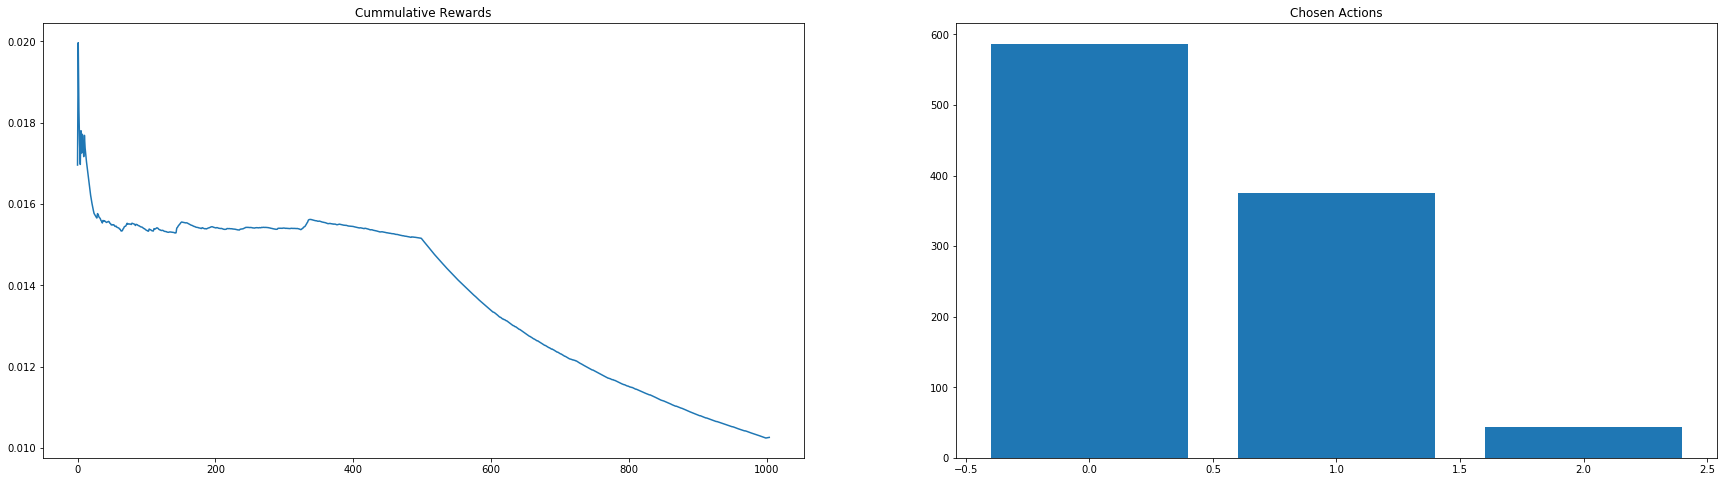

Iteration 1504
Average rewards per algo {'quick_sort': 0.01339368285419785, 'merge_sort': 0.015465537255460566, 'heap_sort': 0.022938013076782227}
Count per chosen algo {'quick_sort': 321, 'merge_sort': 176, 'heap_sort': 3}


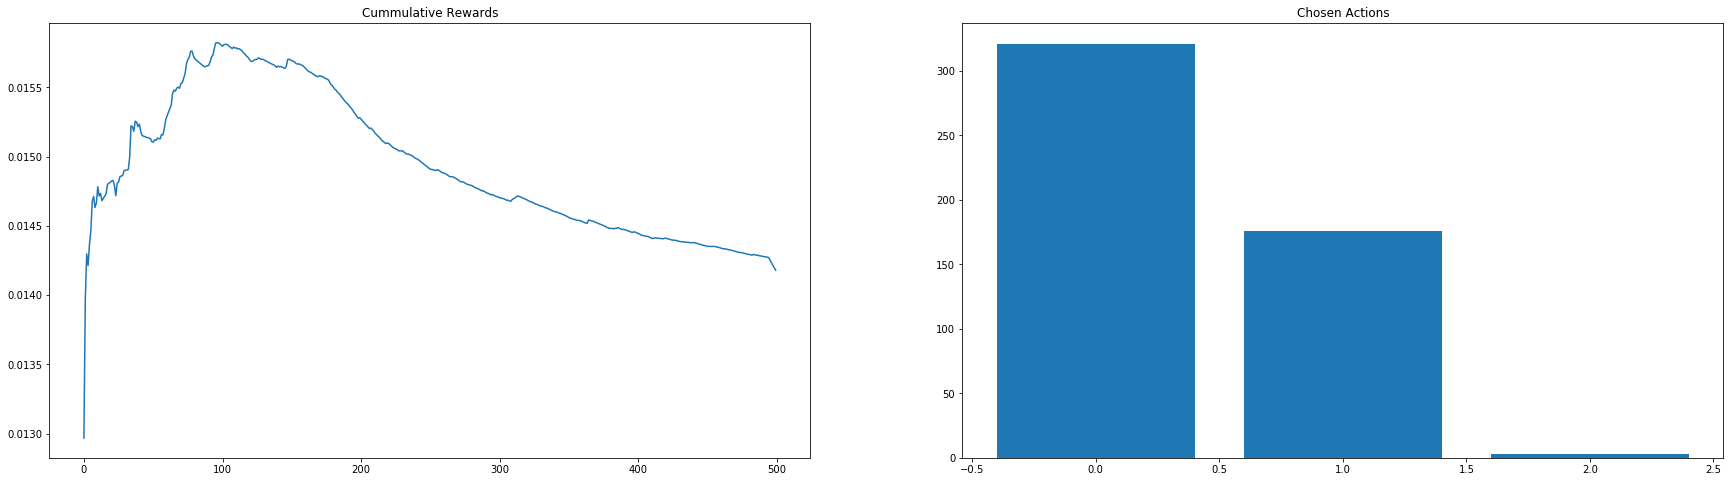

Iteration 1999
Average rewards per algo {'quick_sort': 0.005589307323703921, 'merge_sort': 0.003993034362792969, 'heap_sort': 0.011967778205871582}
Count per chosen algo {'quick_sort': 492, 'merge_sort': 1, 'heap_sort': 2}


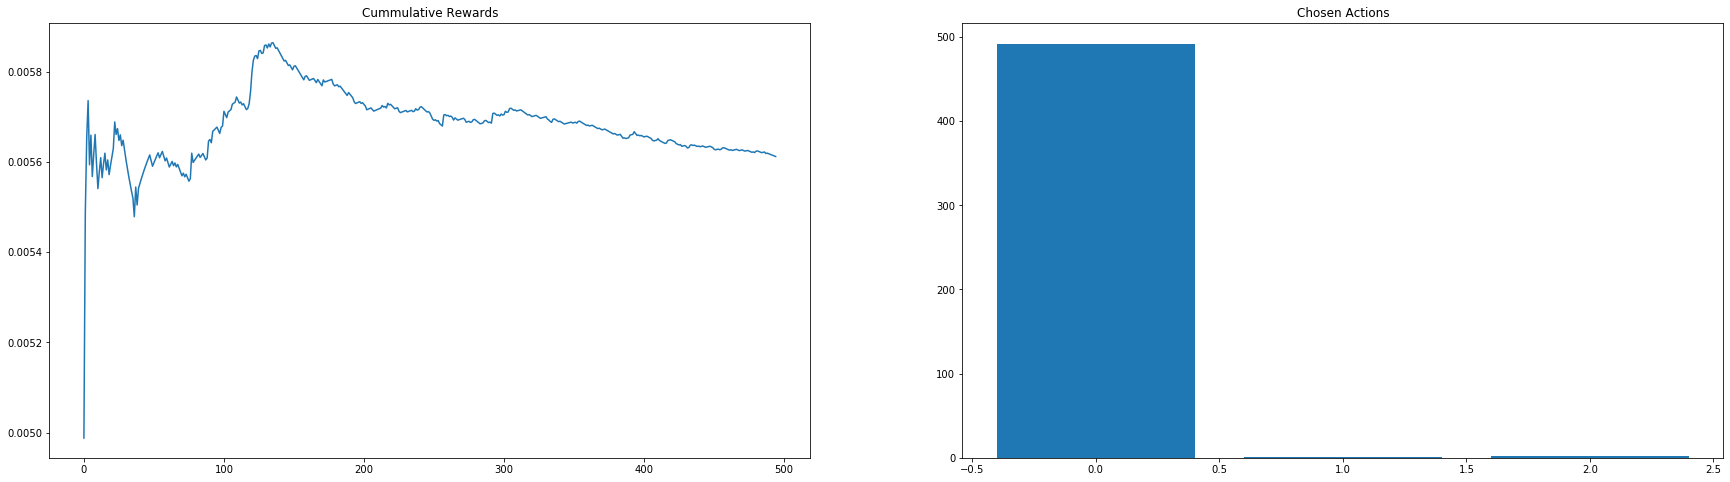

Total reward 20.1808


In [317]:
for elem in list_iteration_results:
    print("Iteration", elem[4])
    print("Average rewards per algo", elem[0])
    print("Count per chosen algo", elem[1])
    plot_history(elem[2],elem[3], elem[1])
print("Total reward", np.round(total_reward,4))

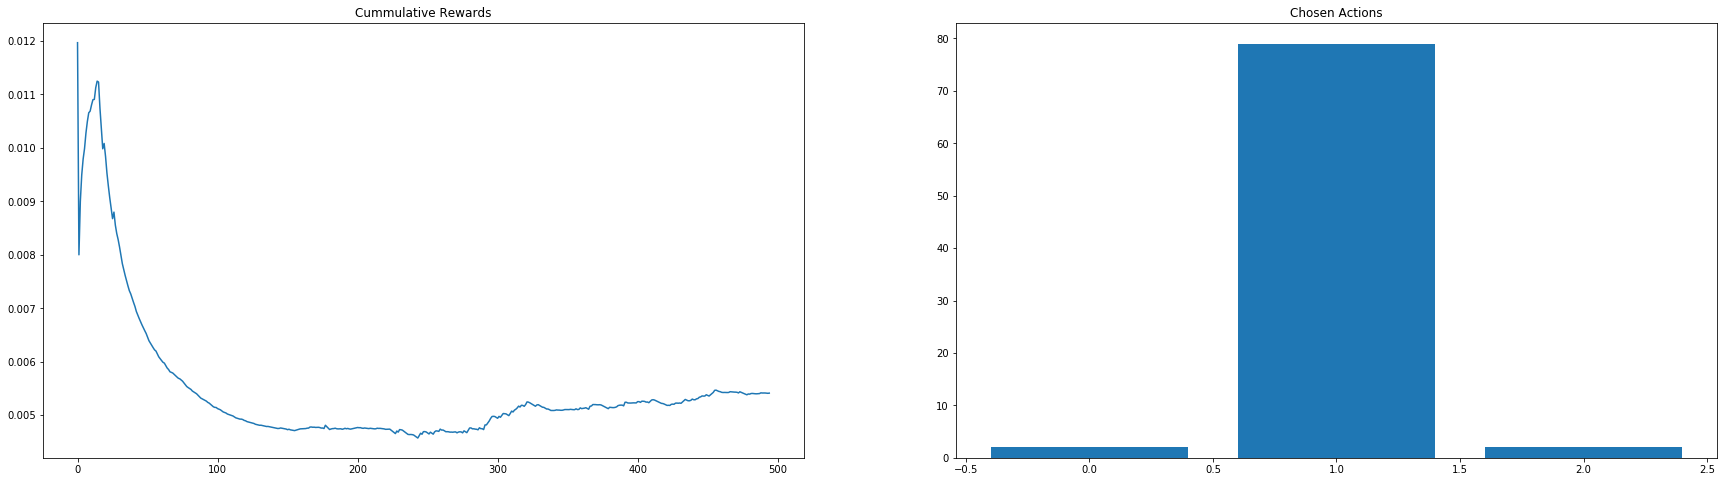

In [307]:
plot_history(rewards,cum_rewards, arm_counts)

## As we can see little to no expoloration is done, even with the variation multiplier.

In [296]:
array_rewards = np.array(rewards)
algo = rpt.Pelt(model="rbf").fit(array_rewards)

In [297]:
result = algo.predict(100)

In [298]:
result

[500, 1000, 1500, 2000]

In [196]:
len(array_rewards)

2000

In [211]:
rewards_mean = np.mean(rewards)

In [213]:
print(rewards_mean)

0.009683969259262085


In [230]:
tset, pval = ttest_1samp(rewards, 0.0096)
if pval < 0.05:
    print("RESTART EXPERIMENT")